In [1]:
!pip3 install torch torchvision anndata umap-learn loompy tqdm h5py ipython scikit-learn pandas jinja2 jupyter 

     |████████████████████████████████| 102kB 2.6MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
  Created wheel for loompy: filename=loompy-3.0.6-cp36-none-any.whl size=47895 sha256=ca6ef1761541e61d593badc254cfa62a89a595b9006e30126da210989aeb92e9
  Stored in directory: /root/.cache/pip/wheels/f9/a4/90/5a98ad83419732b0fba533b81a2a52ba3dbe230a936ca4cdc9
  Created wheel for numpy-groupies: filename=numpy_groupies-0+unknown-cp36-none-any.whl size=28042 sha256=e6ee33c229a247fe17aee3e88d127f68605dd638bb75b2911642a758a4a8b815
  Stored in directory: /root/.cache/pip/wheels/30/ac/83/64d5f9293aeaec63f9539142fc629a41af064cae1b3d8d94aa
Successfully built loompy numpy-groupies


In [2]:
#Can be slow and w/ problems, run if needed
!pip3 install scanpy

     |████████████████████████████████| 7.2MB 2.9MB/s 
     |████████████████████████████████| 2.9MB 35.5MB/s 
     |████████████████████████████████| 51kB 4.1MB/s 
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 1.15.0 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
  Found existing installation: h5py 2.8.0
    Uninstalling h5py-2.8.0:
      Successfully uninstalled h5py-2.8.0


In [3]:
import os
!git clone https://github.com/YosefLab/scVI.git
os.chdir("/content/scVI/")
!python setup.py install

Cloning into 'scVI'...
remote: Enumerating objects: 100, done.
remote: Counting objects: 100% (100/100), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 9417 (delta 49), reused 51 (delta 22), pack-reused 9317
Receiving objects: 100% (9417/9417), 77.08 MiB | 13.28 MiB/s, done.
Resolving deltas: 100% (6711/6711), done.
running install
running bdist_egg
running egg_info
creating scvi.egg-info
writing scvi.egg-info/PKG-INFO
writing dependency_links to scvi.egg-info/dependency_links.txt
writing requirements to scvi.egg-info/requires.txt
writing top-level names to scvi.egg-info/top_level.txt
writing manifest file 'scvi.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'scvi.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/scvi
copying scvi/_settings.py -> build/lib/scvi
copying scvi/__init__.py -> build/lib/scvi
creating

In [0]:
import os
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from scvi.dataset import CortexDataset, RetinaDataset
from scvi.models import VAE
#from scvi.inference import UnsupervisedTrainer

In [0]:
from scvi.dataset import LoomDataset, CsvDataset, Dataset10X, DownloadableAnnDataset
import urllib.request
from scvi.dataset import BrainLargeDataset, CortexDataset, PbmcDataset, RetinaDataset, HematoDataset, CbmcDataset, BrainSmallDataset, SmfishDataset

In [0]:
def allow_notebook_for_test():
    print("Testing the basic tutorial notebook")


test_mode = False
save_path = "data/"
n_epochs_all = None
show_plot = True

if not test_mode:
    save_path = "../../data"

gene_dataset = CortexDataset(save_path=save_path, total_genes=558)

[2019-11-16 06:30:23,193] INFO - scvi.dataset.dataset | Downloading file at /data/expression.bin
[2019-11-16 06:30:24,588] INFO - scvi.dataset.cortex | Loading Cortex data
[2019-11-16 06:30:35,946] INFO - scvi.dataset.cortex | Finished preprocessing Cortex data
[2019-11-16 06:30:35,968] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
[2019-11-16 06:30:35,971] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]


In [0]:
n_epochs = 100 if n_epochs_all is None else n_epochs_all
lr = 1e-3
use_batches = False
use_cuda = True

In [0]:
vae = VAE(gene_dataset.nb_genes, n_batch=gene_dataset.n_batches * use_batches)
trainer = UnsupervisedTrainer(
    vae,
    gene_dataset,
    train_size=0.75,
    use_cuda=use_cuda,
    frequency=5,
)

if 0: #os.path.isfile('%s/vae.pkl' % save_path):
    trainer.model.load_state_dict(torch.load('%s/vae.pkl' % save_path))
    trainer.model.eval()
else:
    trainer.train(n_epochs=n_epochs, lr=lr)
    torch.save(trainer.model.state_dict(), '%s/vae.pkl' % save_path)

(1000, 5700)

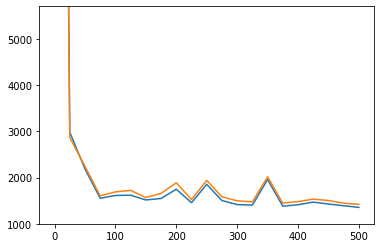

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

elbo_train_set = trainer.history["elbo_train_set"]
elbo_test_set = trainer.history["elbo_test_set"]
x = np.linspace(0, 500, (len(elbo_train_set)))
plt.plot(x, elbo_train_set)
plt.plot(x, elbo_test_set)
plt.ylim(1000, 5700)

In [0]:
#cd ../
%matplotlib inline

In [0]:
n_epochs_all = None
save_path = 'data/'
show_plot = True

In [0]:
#from scvi.dataset import BrainLargeDataset, CortexDataset, CbmcDataset, BrainSmallDataset, SmfishDataset

**Mount Google Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Linn_2015 = CortexDataset(save_path=save_path)

Linn_2015._X.shape
Linn_2015.__dict__

# select laptop or desctop version

In [0]:
do_laptop=0

## load ABA smart-seq VISp GABAergic

In [5]:
# load ABA smart-seq?
import pandas as pd
import numpy as np


#d4='~/Documents/references/transcriptomes to STP/transcriptomes/ABA/mouse_VISp_gene_expression_matrices_2018-06-14/'
if do_laptop:
    d4 = '~/Documents/references/lists_of_proteins_2/Analysis_of_proteins/genetic_types/transcriptomic_interneurons/'
else:
    #d4='~/Documents/references/transcriptomes to STP/transcriptomes/ABA/mouse_VISp_gene_expression_matrices_2018-06-14/'
    d4 = '/content/drive/My Drive/Colab Notebooks/scVI/'

fn='mouse_VISp_2018-06-14_samples-columns.csv'
df_aba_vis_c=pd.read_csv(d4+fn)
print(df_aba_vis_c.columns)
print(df_aba_vis_c.head())

fn = 'mouse_VISp_2018-06-14_genes-rows.csv'
df_aba_g=pd.read_csv(d4+fn)
print(df_aba_g.head())


Index(['sample_name', 'sample_id', 'sample_type', 'organism', 'donor', 'sex',
       'age_days', 'eye_condition', 'genotype', 'driver_lines',
       'reporter_lines', 'brain_hemisphere', 'brain_region', 'brain_subregion',
       'injection_label_direction', 'injection_primary', 'injection_secondary',
       'injection_tract', 'injection_material',
       'injection_exclusion_criterion', 'facs_date', 'facs_container',
       'facs_sort_criteria', 'rna_amplification_set', 'library_prep_set',
       'library_prep_avg_size_bp', 'seq_name', 'seq_tube', 'seq_batch',
       'total_reads', 'percent_exon_reads', 'percent_intron_reads',
       'percent_intergenic_reads', 'percent_rrna_reads',
       'percent_mt_exon_reads', 'percent_reads_unique', 'percent_synth_reads',
       'percent_ecoli_reads', 'percent_aligned_reads_total', 'complexity_cg',
       'genes_detected_cpm_criterion', 'genes_detected_fpkm_criterion',
       'tdt_cpm', 'gfp_cpm', 'class', 'subclass', 'cluster', 'confusion_score',

In [6]:
in_glut_l23 = (df_aba_vis_c.loc[:,'class']=='Glutamatergic')&(df_aba_vis_c.loc[:,'brain_subregion'].isin(['L2/3','L4','L5']))
sum(in_glut_l23) 

3114

In [7]:
print(len(df_aba_vis_c.index))

in_glut_l23 = (df_aba_vis_c.loc[:,'class']=='Glutamatergic') #&(df_aba_vis_c.loc[:,'brain_subregion'].isin(['L2/3','L4','L5']))

in_gaba = df_aba_vis_c.loc[:,'class']=='GABAergic'
print(sum(in_gaba))
df_aba_vis_in_c=df_aba_vis_c.loc[in_gaba,:]
df_aba_vis_l23glu_c=df_aba_vis_c.loc[in_glut_l23,:]

15413
6125


print(len(df_aba_vis_c.index))
in_gaba = df_aba_vis_c.loc[:,'class']=='GABAergic'
print(sum(in_gaba))
df_aba_vis_in_c=df_aba_vis_c.loc[in_gaba,:]

d1= '/Users/stepaniu/Documents/references/lists_of_proteins_2/Analysis_of_proteins/genetic_types/transcriptomic_interneurons/'
df_aba_d = pd.read_hdf(d1 + 'mouse_VISp_2018-06-14_exon-matrix_GABAergic_hdf')
print(len(df_aba_d.index))
df_aba_d.head()

import anndata
df_aba_ad = anndata.AnnData(X=df_aba_d.T, obs=df_aba_vis_c, var=df_aba_g.T, uns=None)

df_aba_ad.write('mouse_VISp_2018-06-14_exon-matrix_GABAergic_hda')
#aba = AnnDataset("TM_droplet_mat.h5ad", 
#                               save_path = save_path) 

#d1= '/Users/stepaniu/Documents/references/lists_of_proteins_2/Analysis_of_proteins/genetic_types/transcriptomic_interneurons/'
d1='~/Documents/references/transcriptomes to STP/transcriptomes/ABA/mouse_VISp_gene_expression_matrices_2018-06-14/'
#df_aba_d = pd.read_hdf(d1 + 'mouse_VISp_2018-06-14_exon-matrix_GABAergic_hdf')
df_aba_d = pd.read_csv(d1 + 'mouse_VISp_2018-06-14_exon-matrix.csv')

print(len(df_aba_d.index))
print(df_aba_d.head())



print(len(df_aba_d.index))
print(len(df_aba_g.columns))
print(len(df_aba_g.index))
print(in_glut_l23.sum())
print(len(in_glut_l23))
print(len(df_aba_vis_l23glu_c.index))
print(len(df_aba_vis_l23glu_c.columns))
#(df_aba_d.loc[:,in_glut_l23].columns==df_aba_vis_l23glu_c.loc[:,'sample_name']).sum()

df_aba_d = df_aba_d.iloc[:,1:]
in_glut_l23.index = df_aba_vis_c.loc[:,'sample_name']
df_aba_d = df_aba_d.loc[:,in_glut_l23]
df_aba_d.columns=df_aba_vis_l23glu_c.index

import anndata
df_aba_ad = anndata.AnnData(X=df_aba_d.T, obs=df_aba_vis_l23glu_c, var=df_aba_g, uns=None)


from scvi.dataset import LoomDataset, CsvDataset, Dataset10X, AnnDataset

df_aba_ad.write('mouse_VISp_2018-06-14_exon-matrix_L23456_Glutamatergic_hda.h5ad')



In [0]:
#save_path

In [0]:
#!pip3 install  anndata  loompy 

In [8]:
import os
#import loompy 
#import anndata
if do_laptop:
    os.chdir('/Users/stepaniu/scVI/tests/notebooks')

print(os.getcwd())
##os.listdir()

##from scvi.dataset import LoomDataset, CsvDataset, Dataset10X
#from scvi.dataset import DownloadableAnnDataset

##df_aba_ad.write('mouse_VISp_2018-06-14_exon-matrix_GABAergic.h5ad')
#aba_vis_in = DownloadableAnnDataset(d4+"data/mouse_VISp_2018-06-14_exon-matrix_GABAergic.h5ad") 

##aba_vis_l23glu = AnnDataset("mouse_VISp_2018-06-14_exon-matrix_L23_Glutamatergic_hda.h5ad", new_n_genes = 45768,
##                               save_path = save_path) 
##aba_vis_l23glu = AnnDataset("mouse_VISp_2018-06-14_exon-matrix_L2345_Glutamatergic_hda.h5ad", new_n_genes = 45768,
##                               save_path = save_path) 

#aba_vis_l23glu = DownloadableAnnDataset(d4+"mouse_VISp_2018-06-14_exon-matrix_L23456_Glutamatergic_hda.h5ad") 


##aba_vis_in.gene_names = df_aba_g.loc[:,'gene_symbol'].values

/content


In [9]:
df_aba_g.loc[:,'gene_symbol'].values

array(['0610005C13Rik', '0610006L08Rik', '0610007P14Rik', ..., 'n-R5s144',
       'n-R5s146', 'n-R5s149'], dtype=object)

In [0]:
#aba_vis_in.gene_names = df_aba_g.loc[:,'gene_symbol'].values
#aba_vis_l23glu.gene_names = df_aba_g.loc[:,'gene_symbol'].values
#aba_vis_in._X.shape

In [0]:
#aba_vis_in.__dict__

In [0]:
import scanpy as sc

In [13]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)

scanpy==1.4.6 anndata==0.7.1 umap==0.3.10 numpy==1.18.1 scipy==1.4.1 pandas==0.25.3 scikit-learn==0.22.2.post1 statsmodels==0.10.2


In [0]:
# anndata structure from numpy arrays
import anndata
adata = anndata.AnnData(Xstp_cl, var=stp_n)
adata.var_names = stp_n 



sc.pl.highest_expr_genes(adata, n_top=20, )

In [10]:
d8 = "/content/drive/My Drive/Colab Notebooks/"
fpath = "/content/drive/My Drive/Colab Notebooks/gene_set_all_1512.xlsx"
gene_set = pd.read_excel(fpath)
gene_set


gene_set = list(set(gene_set.loc[:,0].values.tolist()))
print(len(gene_set))
gene_set

gene_names = df_aba_g.loc[:,'gene_symbol'] #aba_vis_in.gene_names
#gene_names = pd.DataFrame(gene_names)
gene_names2 = gene_names.isin(gene_set)

gene_names = pd.concat([gene_names, gene_names2],axis=1)
gene_names.columns = ['gene_symbol', 'gene_set']
gene_names

1525


gene_symbol  gene_set
0      0610005C13Rik     False
1      0610006L08Rik     False
2      0610007P14Rik     False
3      0610009B22Rik     False
4      0610009E02Rik     False
...              ...       ...
45763       n-R5s142     False
45764       n-R5s143     False
45765       n-R5s144     False
45766       n-R5s146     False
45767       n-R5s149     False

[45768 rows x 2 columns]

In [0]:
import os
import scanpy as sc

In [0]:
##
##
##  make AnnData and find highly variable genes : visual cortex glutamatergic
##
##
##aba_vis_l23glu = DownloadableAnnDataset(d4+"mouse_VISp_2018-06-14_exon-matrix_L23456_Glutamatergic_hda.h5ad")

n_top_genes = 8000  # 8000 - 5188,  20000 - 15656

aba_vis_l23glu = sc.read_h5ad(d4+"mouse_VISp_2018-06-14_exon-matrix_L23456_Glutamatergic_hda.h5ad")


adata = aba_vis_l23glu

var_all=adata.var.copy()

adata_original = adata.copy()

sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)  # check!!!
sc.pp.log1p(adata)

min_mean =  -np.inf
max_mean =  np.inf
min_disp =  -np.inf
max_disp =  np.inf

sc.pp.highly_variable_genes(
    adata,
    min_mean=min_mean,
    max_mean=max_mean,
    min_disp=min_disp,
    max_disp=max_disp,
    n_top_genes=n_top_genes  # 8000 - 5188,  20000 - 15656
)



adata.raw = adata

#
#  
# add genes from gene_set
# add genes from gene_set
avar = adata.var.copy()
avar = avar.set_index('gene_symbol')
avar.loc[gene_names.loc[gene_names.loc[:,'gene_set'],'gene_symbol'],'highly_variable'] = True
#avar.loc[gene_names['gene_symbol'],'highly_variable'] = avar.loc[gene_names['gene_symbol'],'highly_variable'] | gene_names.loc[:,'gene_set']

avar = avar.reset_index()
adata.var = avar 

highly_variable_genes = adata.var["highly_variable"]




adata = adata_original[:, highly_variable_genes] #adata[:, highly_variable_genes]

##sc.pp.regress_out(adata, ["n_counts", "percent_mito"])
#sc.pp.scale(adata, max_value=10)

# Also filter the original adata genes
adata_original = adata_original[:, highly_variable_genes]
print(highly_variable_genes.sum())

# We also store adata_original into adata.raw
# (which was designed for this purpose but actually has limited functionnalities)
adata.raw = adata_original

aba_vis_l23glu = adata.copy()

8918


In [0]:

##
##
##  make AnnData and find highly variable genes : visual cortex interneurons
##
##

aba_vis_in = sc.read_h5ad(d4+"data/mouse_VISp_2018-06-14_exon-matrix_GABAergic.h5ad")
#aba_vis_in.var.index = df_aba_g.loc[:,'gene_symbol'].values
aba_vis_in.var = var_all.copy()

adata = aba_vis_in
adata_original = adata.copy()

sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)

min_mean =  -np.inf
max_mean =  np.inf
min_disp = -np.inf
max_disp = np.inf

sc.pp.highly_variable_genes(
    adata,
    min_mean=min_mean,
    max_mean=max_mean,
    min_disp=min_disp,
    max_disp=max_disp,
    n_top_genes= n_top_genes #20000
)

adata.raw = adata

#
#  
# add genes from gene_set
# add genes from gene_set
avar = adata.var.copy()
avar = avar.set_index('gene_symbol')
avar.loc[gene_names.loc[gene_names.loc[:,'gene_set'],'gene_symbol'],'highly_variable'] = True
#avar.loc[gene_names['gene_symbol'],'highly_variable'] = avar.loc[gene_names['gene_symbol'],'highly_variable'] | gene_names.loc[:,'gene_set']

avar = avar.reset_index()
adata.var = avar 

highly_variable_genes = adata.var["highly_variable"]
adata = adata_original[:, highly_variable_genes] #adata[:, highly_variable_genes]

##sc.pp.regress_out(adata, ["n_counts", "percent_mito"])
#sc.pp.scale(adata, max_value=10)

# Also filter the original adata genes
adata_original = adata_original[:, highly_variable_genes]
print(highly_variable_genes.sum())

# We also store adata_original into adata.raw
# (which was designed for this purpose but actually has limited functionnalities)
adata.raw = adata_original

aba_vis_in = adata.copy()

Transforming to str index.


8900


from scvi.dataset import LoomDataset, CsvDataset, Dataset10X, AnnDataset

#df_aba_ad.write('mouse_VISp_2018-06-14_exon-matrix_GABAergic.h5ad')
aba_vis_in = AnnDataset("mouse_VISp_2018-06-14_exon-matrix_GABAergic.h5ad", new_n_genes = 45768,
                               save_path = save_path) 

#aba_vis_in.gene_names = df_aba_g.loc[:,'gene_symbol'].values

In [0]:
#diff_order = sum(aba_vis_in.gene_names[0:].astype(int) - np.arange(len(aba_vis_in.gene_names)))
#print(diff_order)

#aba_vis_in.gene_names = df_aba_g.loc[:,'gene_symbol'].values

#aba_vis_l23glu.gene_names = df_aba_g.loc[:,'gene_symbol'].values

diff_order = sum(aba_vis_in.gene_names[0:].astype(int) - np.arange(len(aba_vis_in.gene_names)))
print(diff_order)

aba_vis_in.gene_names = df_aba_g.loc[:,'gene_symbol'].values

In [0]:
#import os
#print(os.getcwd())
#os.listdir()

#from scvi.dataset import LoomDataset, CsvDataset, Dataset10X, AnnDataset

#d7 = '/home/stepaniu/Documents/references/transcriptomes to STP/transcriptomes/ABA_2019/'
d7 = '/content/drive/My Drive/Colab Notebooks/ABA_2019/'

##aba_vis_in = AnnDataset("ABA_2019_transcriptome.h5ad", new_n_genes = 45768,
##                               save_path = d7) 
#aba_hipp_ent = DownloadableAnnDataset(d7+"ABA_2019_transcriptome.h5ad") 


obs = pd.read_excel(d7 +'ABA_2019_obs.xlsx') # samples
var = pd.read_excel(d7 + 'ABA_2019_var.xlsx') # gene names
#obs = aba_vis_in._obs # samples
#var = aba_vis_in._var # gene names

#df_aba_g = pd.read_csv(d7 + 'medians.csv')
df_aba_ch = pd.read_csv(d7 + 'sample_annotations.csv')

in_gaba = df_aba_ch.loc[df_aba_ch.loc[:,'sample_name'].isin(obs.loc[:,'samples']),['sample_name', 'class_label']]
in_gaba = in_gaba.reset_index().set_index('sample_name',drop=True)
in_gaba = in_gaba.loc[obs.loc[:,'samples'],:]
in_gaba = in_gaba.reset_index().reset_index().set_index('sample_name',drop=True)
in_neurons = in_gaba.loc[in_gaba.loc[:,'class_label'].isin(['GABAergic','Glutamatergic']),:].reset_index().set_index('level_0',drop=True)

#obs = in_gaba.loc[:,'sample_name'].reset_index()
##var=var



/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (36,54) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
##
##
##  make AnnData and find highly variable genes : hippocampus
##
##

aba_hipp_ent = sc.read_h5ad(d7+"ABA_2019_transcriptome.h5ad")
aba_hipp_ent.var = var_all

adata = aba_hipp_ent.copy()
adata_original = adata.copy()

sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)

min_mean =  -np.inf
max_mean =  np.inf
min_disp = -np.inf
max_disp = np.inf

sc.pp.highly_variable_genes(
    adata,
    min_mean=min_mean,
    max_mean=max_mean,
    min_disp=min_disp,
    max_disp=max_disp,
    n_top_genes=n_top_genes
)

adata.raw = adata

#
#  
# add genes from gene_set
avar = adata.var.copy()
avar = avar.set_index('gene_symbol')
avar.loc[gene_names.loc[gene_names.loc[:,'gene_set'],'gene_symbol'],'highly_variable'] = True
#avar.loc[gene_names['gene_symbol'],'highly_variable'] = avar.loc[gene_names['gene_symbol'],'highly_variable'] | gene_names.loc[:,'gene_set']

avar = avar.reset_index()
adata.var = avar 

highly_variable_genes = adata.var["highly_variable"]
adata = adata_original[:, highly_variable_genes] #adata[:, highly_variable_genes]

##sc.pp.regress_out(adata, ["n_counts", "percent_mito"])
#sc.pp.scale(adata, max_value=10)

# Also filter the original adata genes
adata_original = adata_original[:, highly_variable_genes]
print(highly_variable_genes.sum())

# We also store adata_original into adata.raw
# (which was designed for this purpose but actually has limited functionnalities)
adata.raw = adata_original

aba_hipp_ent = adata

8874


In [0]:
gene_names.loc[:,'gene_set'].sum()

1512

## Load Harris 2018 

In [0]:
if do_laptop:
    dhip='/Users/stepaniu/Documents/references/lists_of_proteins_2/Analysis_of_proteins/genetic_types/Kanneth_Somoguyj_2018/6198656/'
else:
    dhip='~/Documents/references/transcriptomes to STP/scVI_data/6198656/'

dhipd=pd.read_csv(dhip+'expression.tsv',sep='\t')
dhipmd=pd.read_csv(dhip+'cell_metadata.tsv',sep='\t')
dhipr=pd.read_csv(dhip+'analysis_results.tsv',sep='\t')

dhipd = dhipd.set_index('Unnamed: 0')
dhipmd = dhipmd.set_index('Unnamed: 0')
dhipr = dhipr.set_index('Unnamed: 0')

FileNotFoundError: ignored


import os
os.chdir('../data')

dhipd.to_csv('Hipp_2018_data.csv')
dhipmd.to_csv('Hipp_2018_meta.csv')
dhipr.to_csv('Hipp_2018_centroids.csv')

In [0]:
print(len(dhipd.columns))
len(dhipd.index)

NameError: ignored

In [0]:
import os
if do_laptop:
    os.chdir('../')


from scvi.dataset.csv import CsvDataset
dhip= CsvDataset(filename='Hipp_2018_data.csv',
                        save_path=save_path, new_n_genes=15000) #new_n_genes=27998

File data/Hipp_2018_data.csv already downloaded
Preprocessing dataset
Finished preprocessing dataset


/home/stepaniu/anaconda3/lib/python3.7/site-packages/scvi/dataset/dataset.py:277: RuntimeWarning: invalid value encountered in greater
  to_keep = np.array((X.sum(axis=1) > 0)).ravel()


Cells with zero expression in all genes considered were removed, the indices of the removed cells in the expression matrix were:
[3663]
Downsampling from 27998 to 15000 genes
Downsampling from 3663 to 3663 cells


In [0]:
#dhip.__dict__

# Setup before running the notebook

- Create a virtual environment on terminal (Mac): 
    - python3 -m virtualenv env
- Activate the virtual environment: 
    - source env/bin/activate
- Install the following packages in the environment:
    - pip3 install numpy, torch, anndata, seaborn, umap, umap-learn, loompy, tqdm, h5py, ipython, scikit-learn, pandas, jinja2, jupyter

In [0]:
import matplotlib
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
#import seaborn as sns

import numpy as np
import numpy.random as random
import pandas as pd

from umap import UMAP

if do_laptop:
    import umap
    umap.__version__='0.3.7'
    import scanpy as sc
    import louvain
    from umap.umap_ import UMAP
#else:
    #import umap
    #umap.__version__='0.3.7'
    #import scanpy as sc
    #import louvain
    #from umap.umap_ import UMAP
    
    
use_cuda = True
from scvi.dataset.dataset import GeneExpressionDataset
from scvi.inference import UnsupervisedTrainer
from scvi.models import SCANVI, VAE
from scvi.dataset import AnnDatasetFromAnnData



The raw data is provided in the Seurat notebook and can be downloaded [here](https://www.dropbox.com/s/79q6dttg8yl20zg/immune_alignment_expression_matrices.zip?dl=1)

# Tutorial

<font size='3'>This tutorial walks through the harmonization process, specifically making use of scVI and SCANVI, which are two tools that are applicable and useful for principled large-scale analysis of single-cell transcriptomics atlases. Data harmonization refers to the integration of two or more transcriptomics dataset into a single dataset on which any downstream analysis can be applied. The input datasets may come from very different sources and from samples with a different composition of cell types. 
<br><br>
__scVI__ is a deep generative model that has been developed for probabilistic representation of scRNA-seq data and performs well in both harmonization and harmonization-based annotation, going beyond just correcting batch effects. 
__SCANVI__ is a new method that is designed to harmonize datasets, while also explicitly leveraging any available labels to achieve more accurate annotation. SCANVI uses a semi-supervised generative model. 
<br><br>
The inference of both models (scVI, SCANVI) is done using neural networks, stochastic optimization, and variational inference and scales to millions of cells and multiple datasets. Furthermore, both methods provide a complete probabilistic representation of the data, which non-linearly controls not only for sample-to-sample bias, but also for other technical factors of variation such as over-dispersion, variable library size, and zero-inflation.
</font>


<font size='3'>The following tutorial is designed to provide an overview of the data harmonization methods, scVI and SCANVI. This tutorial runs through two examples: 1) Tabula Muris dataset and 2) Human dataset (Seurat)
<br>
Goals:
- Setting up and downloading datasets
- Performing data harmonization with scVI
- Performing marker selection from differentailly expressed genes for each cluster
- Performing differential expression within each cluster
</font>

### Dataset

#### The cell below is used to load in two human PBMC dataset, one stimulated and one control. This example uses the dataset downloaded from here: https://www.dropbox.com/s/79q6dttg8yl20zg/immune_alignment_expression_matrices.zip?dl=1 

Download this data and unzip it to **HarmonizationNotebook/data**

import os
os.chdir('../')

from scvi.dataset.csv import CsvDataset
stimulated = CsvDataset(filename='immune_stimulated_expression_matrix.txt',
                        save_path=save_path,sep='\t', new_n_genes=35635)
control = CsvDataset(filename='immune_control_expression_matrix.txt',
                     save_path=save_path, sep='\t', new_n_genes=35635)



In [0]:
os.getcwd()

'/content/scVI'

# Concatenate Datasets

all_dataset = GeneExpressionDataset.concat_datasets(control, stimulated)

In [0]:
##all_dataset = GeneExpressionDataset.concat_datasets(aba_vis_in,aba_mop_in)  #d1020

##ds = 'g160'
##if ds == 'g160':
##    all_dataset = GeneExpressionDataset.concat_datasets(aba_vis_in,d160)
##    fmdgaba=fmdgaba160
##elif ds =='g1020':
##    all_dataset = GeneExpressionDataset.concat_datasets(aba_vis_in,d1020)
##    fmdgaba=fmdgaba1020


#all_dataset = GeneExpressionDataset.concat_datasets(aba_vis_in,dhip)    


#all_dataset = GeneExpressionDataset()

#all_dataset.populate_from_datasets([aba_vis_in, aba_vis_l23glu])    

#print((all_dataset.batch_indices==0).sum())
#(all_dataset.batch_indices==1).sum()

In [0]:
#all_dataset.gene_names

In [0]:
d8 = '/content/drive/My Drive/Colab Notebooks/'
gene_set = pd.read_excel(d8 +'gene_set_all_gs1512.xlsx')
gene_set

FileNotFoundError: ignored

In [0]:
#d8 = '/content/drive/My Drive/Colab Notebooks/'
#gene_set = pd.read_excel(d8 +'gene_set_all_gs1512.xlsx')
#gene_set


gene_set = list(set(gene_set.loc[:,0].values.tolist()))
print(len(gene_set))
gene_set

AttributeError: ignored

In [0]:
# 1) filter gene set
# 2) add hippo data (with its own batch?)

# igenes = pd.Series(all_dataset.gene_names).isin(gene_set).values

# all_dataset.gene_names = all_dataset.gene_names[igenes]
# all_dataset.X = all_dataset.X[:,igenes]
# all_dataset.X.shape


In [0]:
import scanpy as sc

sc.settings.verbosity = 0  # verbosity: errors (0), warnings (1), info (2), hints (3)

In [0]:

 igenes = pd.Series(aba_vis_in.gene_names).isin(gene_set).values

 aba_vis_in.gene_names = aba_vis_in.gene_names[igenes]
 aba_vis_in.X = aba_vis_in.X[:,igenes]
 aba_vis_in.X.shape

[2020-01-25 15:22:56,453] INFO - scvi.dataset.dataset | Computing the library size for the new data


(6125, 1512)

In [0]:
igenes = pd.Series(aba_vis_l23glu.gene_names).isin(gene_set).values

aba_vis_l23glu.gene_names = aba_vis_l23glu.gene_names[igenes]
aba_vis_l23glu.X = aba_vis_l23glu.X[:,igenes]
aba_vis_l23glu.X.shape

[2020-01-25 15:23:09,876] INFO - scvi.dataset.dataset | Computing the library size for the new data


(7366, 1512)

In [0]:
#aba_hipp_ent.gene_names = aba_hipp_ent.var.loc[:,'genes'].values
#aba_hipp_ent.__dict__

In [0]:

igenes = pd.Series(aba_hipp_ent.gene_names).isin(gene_set).values

aba_hipp_ent.gene_names = aba_hipp_ent.gene_names[igenes]
aba_hipp_ent.X = aba_hipp_ent.X[:,igenes]
aba_hipp_ent.X.shape

[2020-01-25 15:23:52,093] INFO - scvi.dataset.dataset | Computing the library size for the new data


(7983, 1512)

## **START HERE!!!**   Convert to scVI dataset

In [0]:
# START HERE!!! : Convert easily to scvi dataset
adata=[]
aba_vis_in = AnnDatasetFromAnnData(aba_vis_in)
aba_vis_l23glu = AnnDatasetFromAnnData(aba_vis_l23glu)
aba_hipp_ent = AnnDatasetFromAnnData(aba_hipp_ent)


[2020-01-28 07:15:18,280] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
[2020-01-28 07:15:18,281] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
[2020-01-28 07:15:18,351] INFO - scvi.dataset.dataset | Computing the library size for the new data
[2020-01-28 07:15:18,420] INFO - scvi.dataset.dataset | Downsampled from 6125 to 6125 cells
[2020-01-28 07:15:18,563] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
[2020-01-28 07:15:18,565] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
[2020-01-28 07:15:18,648] INFO - scvi.dataset.dataset | Computing the library size for the new data
[2020-01-28 07:15:18,734] INFO - scvi.dataset.dataset | Downsampled from 7366 to 7366 cells
[2020-01-28 07:15:18,887] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
[2020-01-28 07:15:18,888] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
[2020-01-28 07:15:18,975] INFO - scvi.dataset.dataset | Computing the library size for the new data
[20

In [0]:
all_dataset = GeneExpressionDataset()
all_dataset.populate_from_datasets([aba_vis_in, aba_vis_l23glu, aba_hipp_ent])    



print((all_dataset.batch_indices==0).sum())
print((all_dataset.batch_indices==2).sum())
(all_dataset.batch_indices==1).sum()

[2020-01-28 07:15:19,073] INFO - scvi.dataset.dataset | Merging datasets. Input objects are modified in place.
[2020-01-28 07:15:19,074] INFO - scvi.dataset.dataset | Gene names and cell measurement names are assumed to have a non-null intersection between datasets.
[2020-01-28 07:15:19,097] INFO - scvi.dataset.dataset | Keeping 5188 genes
[2020-01-28 07:15:19,212] INFO - scvi.dataset.dataset | Computing the library size for the new data
[2020-01-28 07:15:19,301] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
[2020-01-28 07:15:19,303] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
[2020-01-28 07:15:19,404] INFO - scvi.dataset.dataset | Computing the library size for the new data
[2020-01-28 07:15:19,495] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
[2020-01-28 07:15:19,497] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
[2020-01-28 07:15:19,604] INFO - scvi.dataset.dataset | Computing the library size for the new data
[2020-01-28 07:1

7366

In [0]:
all_dataset.__dict__

{'_X': array([[  0.,   0.,  37., ...,  30.,   0.,   0.],
        [109.,  29.,   0., ...,   5.,   0.,   0.],
        [  9.,  30.,   0., ...,   0.,   0.,   0.],
        ...,
        [  2.,  17.,   5., ...,   3.,  13.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,  27.],
        [  0.,   8.,   0., ...,   0.,   0.,  10.]], dtype=float32),
 '_batch_indices': array([[0],
        [0],
        [0],
        ...,
        [2],
        [2],
        [2]], dtype=uint16),
 '_corrupted_X': None,
 '_labels': array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]], dtype=uint16),
 '_norm_X': None,
 'attribute_mappings': defaultdict(list,
             {'batch_indices': [], 'labels': ['cell_types', 'cell_types']}),
 'cell_attribute_names': {'batch_indices',
  'labels',
  'local_means',
  'local_vars'},
 'cell_categorical_attribute_names': {'batch_indices', 'labels'},
 'cell_measurements_columns': {},
 'cell_types': ['undefined'],
 'dataset_versions': set(),
 'gene_at

# scVI (single-cell Variational Inference)

<font size='3'>___scVI___ is a hierarchical Bayesian model for single-cell RNA sequencing data with conditional distributions parametrized by neural networks. Working as a hybrid between a neural network and a bayesian network, scVI performs data harmonization. VAE refers to variational auto-encoders for single-cell gene expression data. scVI is similar to VAE as it tries to bring a more suitable structure to the latent space. While VAE allows users to make observations in a semi-supervised fashion, scVI is easier to train and specific cell-type labels for the dataset are not required in the pure unsupervised case.
</font>



## Define the scVI model
* First, we define the model and its hyperparameters: 
    * __n_hidden__: number of units in the hidden layer = 128
    * __n_latent__: number of dimensions in the shared latent space = 10 (how many dimensions in z)
    * __n_layers__: number of layers in the neural network
    * __dispersion__: 'gene': each gene has its own dispersion parameter; 'gene-batch': each gene in each batch has its own dispersion parameter
* Then, we define a trainer using the model and the dataset to train it with
    * in the unsupervised setting, __train_size__=1.0 and all cells are used for training


In [0]:
import torch
n_epochs_all = 3000
n_epochs=3000 if n_epochs_all is None else n_epochs_all
lr=2e-3
use_batches=True
use_cuda=True

In [0]:
save_path2='../drive/My Drive/Colab Notebooks/scVI/'#d4 #'notebooks/data'

In [0]:
cwd = os.getcwd() +'/'+save_path2
print('/Users/stepaniu/scVI/tests/notebooks')
cwd

/Users/stepaniu/scVI/tests/notebooks


'/content/scVI/../drive/My Drive/Colab Notebooks/scVI/'

In [0]:
vae = VAE(all_dataset.nb_genes, n_batch=all_dataset.n_batches * use_batches, dispersion='gene-batch', n_latent = 20,
        n_layers=3, n_hidden=256)

#vae = VAE(all_dataset.nb_genes, n_batch=all_dataset.n_batches * use_batches, dispersion='gene-batch', n_latent = 10,
#         n_layers=2, n_hidden=256)

trainer = UnsupervisedTrainer(vae,
                              all_dataset,
                              train_size=0.95,
                              use_cuda=use_cuda,
                              frequency=1)

dn=1000
n2 = int(n_epochs/dn)

file_name = 'vae_5188_3_'#'vae_15656_'

import pickle
#file_name = 'vae_15656_'
#torch.save(trainer, save_path2+file_name+'dataset_'+'.pkl')
#pickle.dump( trainer.history, open( save_path2+file_name+'trainer_history.p', "wb" ) )
pickle.dump( trainer.gene_dataset, open( save_path2+file_name+'trainer_data.p', "wb" ) )

load_trained_model=True
train_model=True
if load_trained_model: #os.path.isfile('%s/vae.pkl' % save_path ):
    #i=n2
    i=2
    trainer.model.load_state_dict(torch.load(save_path2+file_name+str(i)+'.pkl')) #vae3.pkl
    #trainer.model.load_state_dict(torch.load('%s/vae2.pkl' % cwd))
    
    trainer.model.eval()

if train_model :
    #torch.save(trainer, save_path2+file_name+'dataset_'+str(i)+'.pkl')
    for i in range(3,n2+1):
        trainer.train(n_epochs=dn, lr=lr)
        torch.save(trainer.model.state_dict(), save_path2+file_name+str(i)+'.pkl')
    
    pickle.dump( trainer.history, open( save_path2+file_name+'trainer_history.p', "wb" ) )

training: 100%|█████████▉| 998/1000 [51:18<00:06,  3.05s/it]

In [0]:
#import pickle
##file_name = 'vae_15656_'
##torch.save(trainer, save_path2+file_name+'dataset_'+'.pkl')
#pickle.dump( trainer.history, open( save_path2+file_name+'trainer_history.p', "wb" ) )
#pickle.dump( trainer.gene_dataset, open( save_path2+file_name+'trainer_data.p', "wb" ) )

In [0]:
#trainer.gene_dataset.__dict__
#pickle.dump( trainer.gene_dataset, open( save_path2+file_name+'trainer_data.p', "wb" ) )
#trainer.history
#close( save_path2+file_name+'trainer_data.p', "wb" )
#scvi.dataset.DownloadableDataset(urls=None, filenames=save_path2+file_name+'trainer_data', save_path='data/', delayed_populating=False)

In [0]:
trainer_data = pickle.load( open( save_path2+file_name+'trainer_data.p', "rb" ) )

In [0]:
trainer_data.__dict__

{'_X': array([[  0.,   0.,  29., ...,   0.,   0.,  36.],
        [  0.,   0.,  23., ...,   0.,   0.,   1.],
        [  0.,   0.,  13., ...,   0.,   0., 104.],
        ...,
        [  0.,   0.,   6., ...,   0.,   0.,  11.],
        [  0.,   0.,   4., ...,  27.,   0.,   1.],
        [  0.,   0.,   7., ...,  10.,   0.,   3.]], dtype=float32),
 '_batch_indices': array([[0],
        [0],
        [0],
        ...,
        [2],
        [2],
        [2]], dtype=uint16),
 '_corrupted_X': None,
 '_labels': array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]], dtype=uint16),
 '_norm_X': None,
 'attribute_mappings': defaultdict(list,
             {'batch_indices': [], 'labels': ['cell_types', 'cell_types']}),
 'cell_attribute_names': {'batch_indices',
  'labels',
  'local_means',
  'local_vars'},
 'cell_categorical_attribute_names': {'batch_indices', 'labels'},
 'cell_measurements_columns': {},
 'cell_types': ['undefined'],
 'dataset_versions': set(),
 'gene_at

In [0]:
trainer.__dict__

{'_posteriors': OrderedDict([('train_set',
               <scvi.inference.posterior.Posterior at 0x7fc5f730b908>),
              ('test_set',
               <scvi.inference.posterior.Posterior at 0x7fc5f730b828>),
              ('validation_set',
               <scvi.inference.posterior.Posterior at 0x7fc5f730b748>)]),
 'batch_size': 128,
 'benchmark': False,
 'best_epoch': -1,
 'best_state_dict': OrderedDict([('px_r', tensor([[-0.8566, -0.9353,  0.7493],
                       [ 3.6474,  2.7125,  2.4856],
                       [ 0.7515,  0.7885,  0.9717],
                       ...,
                       [-0.4142, -0.2616, -0.0176],
                       [-1.7782,  2.5773,  1.7401],
                       [-0.3416, -0.2598,  0.0453]], device='cuda:0')),
              ('z_encoder.encoder.fc_layers.Layer 0.0.weight',
               tensor([[-5.2413e-02,  7.0677e-05,  1.4143e-01,  ..., -3.5558e-01,
                         1.0365e-01, -2.0711e-01],
                       [-1.6156e-01,

(3200, 3400)

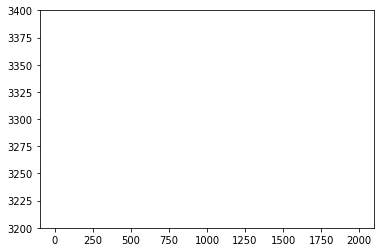

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

elbo_train_set = trainer.history["elbo_train_set"]
elbo_test_set = trainer.history["elbo_test_set"]
x = np.linspace(0, 2000, (len(elbo_train_set)))
plt.plot(x, elbo_train_set)
plt.plot(x, elbo_test_set)
plt.ylim(3200, 3400)

#ll_train_set = trainer.history["ll_train_set"]
#ll_test_set = trainer.history["ll_test_set"]
#x = np.linspace(0,10,(len(ll_train_set)))
#plt.plot(x, ll_train_set)
#plt.plot(x, ll_test_set)
#plt.ylim(0,35000)

In [0]:
full = trainer.create_posterior(trainer.model, all_dataset, indices=np.arange(len(all_dataset)))
latent, batch_indices, labels = full.sequential().get_latent()
batch_indices = batch_indices.ravel()

vae = VAE(all_dataset.nb_genes, n_batch=all_dataset.n_batches, n_labels=all_dataset.n_labels,
          n_hidden=256, n_latent=30, n_layers=3, dispersion='gene-batch')

trainer = UnsupervisedTrainer(vae, all_dataset, train_size=0.9999)
n_epochs = 100 if n_epochs_all is None else n_epochs_all
trainer.train(n_epochs=n_epochs)

## Train the vae model for 100 epochs (this should take apporximately 12 minutes on a GPU)

#### If it is desired to save to model and take on the downstream analysis later, save the model, and comment out trainer.train()
#### Use the saved model to ensure that the down stream analysis cluster id are identical, but the result is robust to reruns of the model, although the exact numerical ids of the clusters might change

import torch
# trainer.train(n_epochs=100)

#ds = 'g160'
#if ds == 'g160':
#    torch.save(trainer.model.state_dict(),save_path+'harmonization.vae.allgenes.aba_vis_starmap_160.model.pkl')
#elif ds =='g1020':
#    torch.save(trainer.model.state_dict(),save_path+'harmonization.vae.allgenes.aba_vis_starmap_1020.model.pkl')
    
torch.save(trainer.model.state_dict(),save_path+'harmonization.vae.allgenes.aba_vis_hipp_2018_3.model.pkl')    



#### And load the trained weights using load_state_dict 


#if ds == 'g160':
#    trainer.model.load_state_dict(torch.load(save_path+'harmonization.vae.allgenes.aba_vis_starmap_160.model.pkl'))
#elif ds =='g1020':
#    trainer.model.load_state_dict(torch.load(save_path+'harmonization.vae.allgenes.aba_vis_starmap_1020.model.pkl'))

    
#trainer.model.load_state_dict(torch.load(save_path+'harmonization.vae.allgenes.aba_vis_hipp_2018_3.model.pkl'))
trainer.model.load_state_dict(torch.load(cwd+'/'+'harmonization.vae.allgenes.aba_vis_hipp_2018_2.model.pkl'))


trainer.model.eval()




# Visualize the latent space

<font size='3'> The latent space representation of the cells provides a way to address the harmonization problem, as all the cells are projected onto a joint latent space, inferred while controlling for their dataset of origin. </font>

### Obtain the latent space from the posterior object
<font size='3'> First, the posterior object is obtained by providing the model that was trained on the dataset. Then, the latent space along with the labels is obtained. </font>

In [0]:
full = trainer.create_posterior(trainer.model, all_dataset, indices=np.arange(len(all_dataset)))
latent, batch_indices, labels = full.sequential().get_latent()
batch_indices = batch_indices.ravel()

pars = full.generate_parameters()

pars[0].shape

In [0]:
c=all_dataset.batch_indices.ravel()[:]
print(sum(c==0))
sum(c==1)

6125


3663

In [0]:
lb_t = df_aba_vis_in_c.loc[:,'subclass'].values
lb_t= lb_t.reshape((len(lb_t),1))
np.unique(lb_t)


from sklearn.neighbors import KNeighborsClassifier

#data_train, _, labels_train = trainer_scanvi.labelled_set.get_latent()
#data_test, _, labels_test = trainer_scanvi.unlabelled_set.get_latent()
data_train = latent[np.nonzero(all_dataset.batch_indices==0)[0]]
labels_train = lb_t

data_test= latent[np.nonzero(all_dataset.batch_indices==1)[0]]
#labels_test = 

nn = KNeighborsClassifier(n_neighbors=10, leaf_size=30, p=2, metric='minkowski')

nn.fit(data_train, labels_train)
labels_test2 = nn.predict(data_test)
score = nn.score(data_test, labels_test2)
score



/home/stepaniu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


1.0

In [0]:
lb_t2 = df_aba_vis_in_c.loc[:,'cluster'].values
lb_t2= lb_t2.reshape((len(lb_t2),1))
print(np.unique(lb_t2))


from sklearn.neighbors import KNeighborsClassifier

#data_train, _, labels_train = trainer_scanvi.labelled_set.get_latent()
#data_test, _, labels_test = trainer_scanvi.unlabelled_set.get_latent()
data_train = latent[np.nonzero(all_dataset.batch_indices==0)[0]]
labels_train2 = lb_t2

data_test= latent[np.nonzero(all_dataset.batch_indices==1)[0]]
#labels_test = 

nn = KNeighborsClassifier(n_neighbors=10, leaf_size=30, p=2, metric='minkowski')

nn.fit(data_train, labels_train2)
labels_test22 = nn.predict(data_test)
score = nn.score(data_test, labels_test22)
score

['Lamp5 Fam19a1 Pax6' 'Lamp5 Fam19a1 Tmem182' 'Lamp5 Krt73' 'Lamp5 Lhx6'
 'Lamp5 Lsp1' 'Lamp5 Ntn1 Npy2r' 'Lamp5 Plch2 Dock5' 'Meis2 Adamts19'
 'Pvalb Akr1c18 Ntf3' 'Pvalb Calb1 Sst' 'Pvalb Gabrg1' 'Pvalb Gpr149 Islr'
 'Pvalb Reln Itm2a' 'Pvalb Reln Tac1' 'Pvalb Sema3e Kank4' 'Pvalb Th Sst'
 'Pvalb Tpbg' 'Pvalb Vipr2' 'Serpinf1 Aqp5 Vip' 'Serpinf1 Clrn1'
 'Sncg Gpr50' 'Sncg Slc17a8' 'Sncg Vip Itih5' 'Sncg Vip Nptx2'
 'Sst Calb2 Necab1' 'Sst Calb2 Pdlim5' 'Sst Chodl' 'Sst Chrna2 Glra3'
 'Sst Chrna2 Ptgdr' 'Sst Crh 4930553C11Rik ' 'Sst Crhr2 Efemp1' 'Sst Esm1'
 'Sst Hpse Cbln4' 'Sst Hpse Sema3c' 'Sst Mme Fam114a1' 'Sst Myh8 Etv1 '
 'Sst Myh8 Fibin' 'Sst Nr2f2 Necab1' 'Sst Nts' 'Sst Rxfp1 Eya1'
 'Sst Rxfp1 Prdm8' 'Sst Tac1 Htr1d' 'Sst Tac1 Tacr3' 'Sst Tac2 Myh4'
 'Sst Tac2 Tacstd2' 'Vip Arhgap36 Hmcn1' 'Vip Chat Htr1f'
 'Vip Col15a1 Pde1a' 'Vip Crispld2 Htr2c' 'Vip Crispld2 Kcne4'
 'Vip Gpc3 Slc18a3' 'Vip Igfbp4 Mab21l1' 'Vip Igfbp6 Car10'
 'Vip Igfbp6 Pltp' 'Vip Lect1 Oxtr' 'Vip Lmo1 Fam

/home/stepaniu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


1.0

In [0]:
labels_test2.shape

(3663,)

Hippocampal INs statistics - and its scVI+KNN prediction

In [0]:
# -
#dhipmd
# 3663 - remove?

dhipr.head()

Kevontae                Krishav  \
Unnamed: 0                                                    
Class          Calb2.Cntnap5a.Igfbp6  Calb2.Cntnap5a.Igfbp6   
nbtSNE_x                   20.744398              21.459952   
nbtSNE_y                   20.361347              25.776105   
Latent_factor              -1.356288              -1.711430   

                           Zinachidi                 Eliott  \
Unnamed: 0                                                    
Class          Calb2.Cntnap5a.Igfbp6  Calb2.Cntnap5a.Igfbp6   
nbtSNE_x                   20.507866              20.365809   
nbtSNE_y                   19.667422              19.796868   
Latent_factor              -1.918136              -2.154826   

                          Fitzgerald                Kamaria  \
Unnamed: 0                                                    
Class          Calb2.Cntnap5a.Igfbp6  Calb2.Cntnap5a.Igfbp6   
nbtSNE_x                   20.097137              18.611489   
nbtSNE_y                   19.598224              26.868376   
Latent_factor              -2.010893              -1.795040   

                               Hatch                   Nana  \
Unnamed: 0                                                    
Class          Calb2.Cntnap5a.Igfbp6  Calb2.Cntnap5a.Igfbp6   
nbtSNE_x                   16.106174              16.000921   
nbtSNE_y                   16.698277              16.766214   
Latent_factor              -0.459644              -1.360451   

                               Bindi                 Avalyn      ...       \
Unnamed: 0                                                       ...        
Class          Calb2.Cntnap5a.Igfbp6  Calb2.Cntnap5a.Igfbp6      ...        
nbtSNE_x                   11.699497              20.675427      ...        
nbtSNE_y                   18.286864              30.458295      ...        
Latent_factor              -0.406604              -1.240314      ...        

                  Eshaal      Dionne     Marlina     Melynie    Makensey  \
Unnamed: 0                                                                 
Class           Sst.Nos1    Sst.Nos1    Sst.Nos1    Sst.Nos1    Sst.Nos1   
nbtSNE_x       98.566681  101.462532  101.740949  101.461519  100.570898   
nbtSNE_y       18.272585   21.312409   18.831275   19.558158   18.735576   
Latent_factor  -1.433754   -0.705567   -1.312601   -0.524010   -1.215220   

                  Marzia       Tulip      Ladale    Taequan Unnamed: 3664  
Unnamed: 0                                                                 
Class           Sst.Nos1    Sst.Nos1    Sst.Nos1   Sst.Nos1           NaN  
nbtSNE_x       99.871806  101.761656  102.117591  97.461105           NaN  
nbtSNE_y       17.711352   17.328614   17.868422  19.120728           NaN  
Latent_factor  -1.037353   -0.723372   -1.503236  -1.245645           NaN  

[4 rows x 3664 columns]

In [0]:
dhip.gene_names
dhip._X.shape

(3663, 15000)

In [0]:
dhipmd.head()

Kevontae                Krishav  \
Unnamed: 0                                                 
Age                           p27                    p60   
Loom_Row              2169.000000            2505.000000   
CellID      10X36_2_GAGAGACATTGG-  10X38_1_GTATACACTACG-   
Cell_Conc              400.000000             400.000000   
ChipID                      10X36                  10X38   

                        Zinachidi                 Eliott  \
Unnamed: 0                                                 
Age                           p60                    p60   
Loom_Row              3045.000000            3242.000000   
CellID      10X38_1_TGGTCTCCTTAT-  10X38_1_TTTGACGCGATT-   
Cell_Conc              400.000000             400.000000   
ChipID                      10X38                  10X38   

                       Fitzgerald                Kamaria  \
Unnamed: 0                                                 
Age                           p60                    p60   
Loom_Row              3256.000000            3309.000000   
CellID      10X38_1_ACGGGAAACCGT-  10X38_1_CTAGTGCTCTTA-   
Cell_Conc              400.000000             400.000000   
ChipID                      10X38                  10X38   

                            Hatch                   Nana  \
Unnamed: 0                                                 
Age                           p60                    p60   
Loom_Row              5579.000000            5613.000000   
CellID      10X38_2_ACTGTGGTCTTT-  10X38_2_CACATGCGTTAG-   
Cell_Conc              400.000000             400.000000   
ChipID                      10X38                  10X38   

                            Bindi                 Avalyn      ...       \
Unnamed: 0                                                    ...        
Age                           p60                    p60      ...        
Loom_Row              5871.000000            6444.000000      ...        
CellID      10X38_2_GGCACTGCTTAG-  10X38_2_AGAACTCGCATA-      ...        
Cell_Conc              400.000000             400.000000      ...        
ChipID                      10X38                  10X38      ...        

                           Eshaal                 Dionne  \
Unnamed: 0                                                 
Age                           p60                    p60   
Loom_Row              5138.000000            5601.000000   
CellID      10X38_2_GCAGGACTGTGA-  10X38_2_ATCCGATACGAC-   
Cell_Conc              400.000000             400.000000   
ChipID                      10X38                  10X38   

                          Marlina                Melynie  \
Unnamed: 0                                                 
Age                           p60                    p60   
Loom_Row              5814.000000            5888.000000   
CellID      10X38_2_CAGCACTGGTGT-  10X38_2_TATCGATTGCTT-   
Cell_Conc              400.000000             400.000000   
ChipID                      10X38                  10X38   

                         Makensey                 Marzia  \
Unnamed: 0                                                 
Age                           p60                    p60   
Loom_Row              6042.000000            6062.000000   
CellID      10X38_2_TTCGGAACGTAC-  10X38_2_ACAATGAGGTCT-   
Cell_Conc              400.000000             400.000000   
ChipID                      10X38                  10X38   

                            Tulip                 Ladale  \
Unnamed: 0                                                 
Age                           p60                    p60   
Loom_Row              6210.000000            6923.000000   
CellID      10X38_2_AGCGCTACACCA-  10X38_2_CATGTGGCTCCT-   
Cell_Conc              400.000000             400.000000   
ChipID                      10X38                  10X38   

                          Taequan Unnamed: 3664  
Unnamed: 0                                       
Age                           p60     

In [0]:
cols= dhipd.columns
#dhipd2 = dhipd.loc[dhipd.index.isin(dhip.gene_names),cols[1]]
dhipd2 = dhipd.loc[dhip.gene_names,:]

In [0]:
dhip.gene_names.shape

(15000,)

In [0]:
len(dhip.gene_names) - len(np.unique(dhip.gene_names))
len(dhipd.index) - len(np.unique(dhipd.index))
set(dhipd.index).difference(set(np.unique(dhipd.index)))

set()

In [0]:
s1 = np.unique(dhipd.index)
s2 = dhipd.index
s3=[]
for i in s1:
    tp=s2==i
    tp=np.nonzero(tp)[0][0]
    
    s3 = s3 + [tp]
    
len(s3)    


27933

In [0]:
dhipd2 = dhipd.iloc[s3,:]


In [0]:
len(dhipd2.index) - len(np.unique(dhipd2.index))

0

In [0]:
dhipd3 = dhipd2.loc[dhip.gene_names,:]

In [0]:
dhipd3.head(20)

Kevontae  Krishav  Zinachidi  Eliott  Fitzgerald  Kamaria  Hatch  \
Unnamed: 0                                                                     
Malat1            85       70         97      86          91       54    102   
Meg3              24       43         61      35          27       51     79   
Sst                0        0          0       0           0        0      0   
Cck                0        1          0       0           0        4      0   
Npy                0        1          0       0           0        0      0   
mt-Nd1            10        6         24      15           8        3     16   
Tmsb4x             5       11         14       5           3        5      3   
Cnr1               0        1          3       0           0        1      1   
Tmsb10            12       24          8      16           9       15     12   
mt-Cytb            1        4         12       6           5        3     15   
Sepw1              2        8          4       7           5        2      3   
Rpl41             12       15         20      12           9       18     15   
mt-Nd4             0        4          6       3           2        8      8   
Snhg11             6       23         13      11          12       12     17   
Atp1b1             1        0          1       2           0        2      0   
Kctd12             0        0          0       0           0        0      0   
Pcp4               0        0          0       0           0        0      0   
Cxcl14             4        6          2       0           1        0      0   
Vip                6        1         11       3           3        1      0   
Rpl3               3       10          9      11           9       10      9   

            Nana  Bindi  Avalyn      ...        Eshaal  Dionne  Marlina  \
Unnamed: 0                           ...                                  
Malat1       103     86     112      ...           298     128      262   
Meg3          30     62      46      ...           109     179      140   
Sst            0      0       0      ...           140      34      162   
Cck            0      1       0      ...             0       0        0   
Npy            0      0       0      ...           398      99      837   
mt-Nd1        17      4      12      ...            79      68      102   
Tmsb4x         4      4       9      ...            60      54      103   
Cnr1           2      0       2      ...             1       1        1   
Tmsb10        13      6      15      ...            44      83      151   
mt-Cytb       16      4      12      ...            47      36       38   
Sepw1          7      0       2      ...            33      55       95   
Rpl41         12      5       8      ...            45      52       73   
mt-Nd4         3      3       3      ...            37      24       39   
Snhg11        21      9       7      ...            29      24       41   
Atp1b1         1      0       3      ...             9       8        5   
Kctd12         0      0       0      ...             0       0        0   
Pcp4           0      0       0      ...            98      42      198   
Cxcl14         0      1       7      ...             0       0        0   
Vip            0      1       0      ...             0       0        0   
Rpl3           9      2      14      ...            55      48       66   

            Melynie  Makensey  Marzia  Tulip  Ladale  Taequan  Unnamed: 3664  
Unnamed: 0                                                                    
Malat1          264       240     195    189     157      170            NaN  
Meg3            169       124     104    110      97      114            NaN  
Sst             237       159     141     69     113      151            NaN  
Cck               0         0       0      1       0        0            NaN  
Npy             441       362     503    207     650      335            NaN  
mt-Nd1          225        99      96    123   

In [0]:
dhip._X.transpose()[:,1].shape

(15000,)

In [0]:
dhipd3.iloc[:,1].values.shape

(15000,)

In [0]:
sum(sum(dhipd3.iloc[:3000,0:3662].values - dhip._X.transpose()[:3000,0:3662]))


0.0

In [0]:
sum(sum(dhipd3.iloc[:3000,0:3662].values))

18462420

In [0]:
df_sb = pd.DataFrame(labels_test2,columns=['subclass'])
df_sb.index = dhipr.columns[0:3663]
print(df_sb.head())

           subclass
Kevontae        Vip
Krishav         Sst
Zinachidi       Vip
Eliott          Sst
Fitzgerald      Sst


In [0]:
df_sb2 = pd.DataFrame(labels_test22,columns=['cluster'])
df_sb2.index = dhipr.columns[0:3663]
print(df_sb2.head())

                       cluster
Kevontae              Sst Esm1
Krishav               Sst Esm1
Zinachidi   Vip Arhgap36 Hmcn1
Eliott                Sst Esm1
Fitzgerald            Sst Esm1


In [0]:
dhipr1 = dhipr.T
dhipr1 = pd.concat([dhipr1, df_sb, df_sb2],axis=1,sort=False)
dhipr1.head()

Class   nbtSNE_x   nbtSNE_y Latent_factor  \
Kevontae    Calb2.Cntnap5a.Igfbp6  20.744398  20.361347     -1.356288   
Krishav     Calb2.Cntnap5a.Igfbp6  21.459952  25.776105     -1.711430   
Zinachidi   Calb2.Cntnap5a.Igfbp6  20.507866  19.667422     -1.918136   
Eliott      Calb2.Cntnap5a.Igfbp6  20.365809  19.796868     -2.154826   
Fitzgerald  Calb2.Cntnap5a.Igfbp6  20.097137  19.598224     -2.010893   

           subclass             cluster  
Kevontae        Vip            Sst Esm1  
Krishav         Sst            Sst Esm1  
Zinachidi       Vip  Vip Arhgap36 Hmcn1  
Eliott          Sst            Sst Esm1  
Fitzgerald      Sst            Sst Esm1

In [0]:
# Hipp 2018 IN classification :
if do_laptop:
    dcla = '/Users/stepaniu/Documents/references/lists_of_proteins_2/Analysis_of_proteins/genetic_types/Kanneth_Somoguyj_2018/6198656/'
else:
    dcla = '~/Documents/references/transcriptomes to STP/scVI_data/6198656/'
cla = pd.read_excel(dcla + 'map_49types_on_23types_2.xlsx') 
cla = cla.set_index('geneTypesNew_Short')
cla

geneTypesOld_Short     location KohusNames  \
geneTypesNew_Short                                                             
Cacna2d1.Ndnf                                CGE NGF           LM        NaN   
Cacna2d1.Lhx6.Reln                           MGE NGF           LM        NaN   
Cck.Cxcl14.Slc17a8                        CCK basket  R-LM border     CCK+BC   
Cck.Cxcl14.Calb1.Tnfaip8l3  CCK perf-path associated  R-LM border        NaN   
Cck.Cxcl14.Vip                                   NaN  R-LM border        NaN   
Cck.Cxcl14.Calb1.Igfbp5      CCK Schaffer-associated  R-LM border        NaN   
Vip.Crh                                          IS2  R-LM border        NaN   
Ntng1.Rgs10                        Radiatum-retrohip  R-LM border        NaN   
Calb2.Cntnap5a                                   IS1     Radiatum        NaN   
Cck.Lmo1                                  CCK basket     Radiatum     CCK+BC   
Cck.Calca                                 CCK basket     Radiatum     CCK+BC   
Cck.Sema5a                                CCK basket     Radiatum     CCK+BC   
Pvalb.Tac1                                 PV basket   Pyramidale      PV+BC   
Calb2.Vip                                        IS3   Pyramidale        NaN   
Pvalb.Tac1                           PV bistratified   Pyramidale        NaN   
Cacna2d1.Lhx6.Vwa5a                              Ivy   Pyramidale        NaN   
Pvalb.C1ql1                              Axon-axonic       Oriens        AAC   
Sst.Erbb4                             O-bistratified       Oriens        NaN   
Sst.Pnoc                                        O-LM       Oriens        NaN   
Sst.Nos1                                  projection       Oriens        NaN   
Sst.Npy                                     hip-sept       Oriens        NaN   
Ntng1.Chrm2                               Trilaminar       Oriens        NaN   

                                                 Io_n1                 Io_n2  \
geneTypesNew_Short                                                             
Cacna2d1.Ndnf                     Cacna2d1.Ndnf.Cxcl14     Cacna2d1.Ndnf.Npy   
Cacna2d1.Lhx6.Reln                  Cacna2d1.Lhx6.Reln                   NaN   
Cck.Cxcl14.Slc17a8                  Cck.Cxcl14.Slc17a8                   NaN   
Cck.Cxcl14.Calb1.Tnfaip8l3  Cck.Cxcl14.Calb1.Tnfaip8l3                   NaN   
Cck.Cxcl14.Vip                          Cck.Cxcl14.Vip                   NaN   
Cck.Cxcl14.Calb1.Igfbp5        Cck.Cxcl14.Calb1.Igfbp5                   NaN   
Vip.Crh                                  Vip.Crh.C1ql1          Vip.Crh.Pcp4   
Ntng1.Rgs10                                Ntng1.Rgs10                   NaN   
Calb2.Cntnap5a                   Calb2.Cntnap5a.Igfbp6  Calb2.Cntnap5a.Rspo3   
Cck.Lmo1                                  Cck.Lmo1.Npy      Cck.Lmo1.Vip.Crh   
Cck.Calca                                    Cck.Calca                   NaN   
Cck.Sema5a                                  Cck.Sema5a                   NaN   
Pvalb.Tac1                          Pvalb.Tac1.Akr1c18      Pvalb.Tac1.Nr4a2   
Calb2.Vip                               Calb2.Vip.Gpd1      Calb2.Vip.Igfbp4   
Pvalb.Tac1                          Pvalb.Tac1.Akr1c18      Pvalb.Tac1.Nr4a2   
Cacna2d1.Lhx6.Vwa5a                Cacna2d1.Lhx6.Vwa5a                   NaN   
Pvalb.C1ql1                          Pvalb.C1ql1.Cpne5       Pvalb.C1ql1.Npy   
Sst.Erbb4                                Sst.Erbb4.Crh       Sst.Erbb4.Rgs10   
Sst.Pnoc                         Sst.Pnoc.Calb1.Igfbp5  Sst.Pnoc.Calb1.Pvalb   
Sst.Nos1                                      Sst.Nos1                   NaN   
Sst.Npy                                   Sst.Npy.Cort        Sst.Npy.Mgat4c   
Ntng1.Chrm2                                Ntng1.Chrm2                   NaN   

                                           Io_n3              Io_n4  
geneTypesNew_Short                                                   
Cacna2d1.Ndnf                Cacna2d1.Ndnf.Rgs10    

In [0]:
subcla = list(set(dhipr1['subclass']))
subcla 


[nan, 'Serpinf1', 'Sst', 'Pvalb', 'Sncg', 'Lamp5', 'Meis2', 'Vip']

In [0]:
clu = list(set(dhipr1['cluster']))
clu

[nan,
 'Vip Rspo4 Rxfp1 Chat',
 'Sst Chodl',
 'Vip Igfbp6 Car10',
 'Sst Hpse Sema3c',
 'Sst Tac2 Myh4',
 'Pvalb Th Sst',
 'Vip Lmo1 Fam159b',
 'Sncg Slc17a8',
 'Meis2 Adamts19',
 'Lamp5 Lhx6',
 'Vip Lect1 Oxtr',
 'Sst Rxfp1 Eya1',
 'Vip Col15a1 Pde1a',
 'Sst Tac1 Htr1d',
 'Lamp5 Plch2 Dock5',
 'Serpinf1 Clrn1',
 'Pvalb Tpbg',
 'Sncg Gpr50',
 'Serpinf1 Aqp5 Vip',
 'Sncg Vip Nptx2',
 'Sst Esm1',
 'Sst Chrna2 Glra3',
 'Pvalb Akr1c18 Ntf3',
 'Sst Chrna2 Ptgdr',
 'Pvalb Sema3e Kank4',
 'Pvalb Vipr2',
 'Vip Chat Htr1f',
 'Sst Tac1 Tacr3',
 'Lamp5 Krt73',
 'Sncg Vip Itih5',
 'Vip Crispld2 Kcne4',
 'Vip Igfbp6 Pltp',
 'Sst Crhr2 Efemp1',
 'Sst Mme Fam114a1',
 'Lamp5 Fam19a1 Pax6',
 'Sst Nts',
 'Vip Lmo1 Myl1',
 'Vip Crispld2 Htr2c',
 'Pvalb Calb1 Sst',
 'Sst Nr2f2 Necab1',
 'Vip Igfbp4 Mab21l1',
 'Sst Rxfp1 Prdm8',
 'Sst Calb2 Necab1',
 'Vip Gpc3 Slc18a3',
 'Pvalb Gpr149 Islr',
 'Pvalb Gabrg1',
 'Lamp5 Ntn1 Npy2r',
 'Sst Calb2 Pdlim5',
 'Sst Myh8 Etv1 ',
 'Sst Tac2 Tacstd2',
 'Vip Ptprt Pkp2',

In [0]:
subcla[0:]

[nan, 'Serpinf1', 'Sst', 'Pvalb', 'Sncg', 'Lamp5', 'Meis2', 'Vip']

Serpinf1

Cck      92.857143
Ntng1     7.142857
Name: Class, dtype: float64


                           Class geneTypesOld_Short
geneTypesNew_Short                                 
Cck.Calca              35.714286         CCK basket
Cck.Sema5a             21.428571         CCK basket
Cck.Cxcl14.Slc17a8     14.285714         CCK basket
Cck.Lmo1.Npy           14.285714         CCK basket
Cck.Cxcl14.Calb1.Tac2   7.142857                NaN
Ntng1.Rgs10             7.142857  Radiatum-retrohip
Serpinf1


Sst

Calb2     1.530055
Cck       0.109290
Ntng1     4.371585
Pvalb     0.437158
Sst      93.551913
Name: Class, dtype: float64


                           Class geneTypesOld_Short
geneTypesNew_Short                                 
Sst.Pnoc.Calb1.Igfbp5  28.633880               O-LM
Sst.Npy.Serpine2       18.251366           hip-sept
Sst.Pnoc.Calb1.Pvalb   16.612022               O-LM
Sst.Npy.Zbtb20          7.978142           hip-sept
Sst.Npy.Mgat4c          6.666667           hip-sept
S

/home/stepaniu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/home/stepaniu/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1027: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
/home/stepaniu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.



Ntng1    100.0
Name: Class, dtype: float64


                    Class geneTypesOld_Short
geneTypesNew_Short                          
Ntng1.Chrm2         100.0         Trilaminar
Meis2


Vip

Cacna2d1     1.892148
Calb2       40.302744
Cck         41.059603
Ntng1        8.230842
Pvalb        0.189215
Sst          1.419111
Vip          6.906339
Name: Class, dtype: float64


                                Class        geneTypesOld_Short
geneTypesNew_Short                                             
Calb2.Vip.Gpd1              11.069063                       IS3
Calb2.Vip.Igfbp4             9.460738                       IS3
Cck.Cxcl14.Calb1.Tnfaip8l3   8.609272  CCK perf-path associated
Cck.Cxcl14.Vip               6.622517                       NaN
Cck.Lmo1.Vip.Crh             5.771050                CCK basket
Calb2.Vip.Nos1               5.581835                       IS3
Vip.Crh.Pcp4                 5.203406                       IS2
Calb2.Cntnap5a.Vip           4.730369          

/home/stepaniu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/home/stepaniu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/home/stepaniu/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1027: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#de

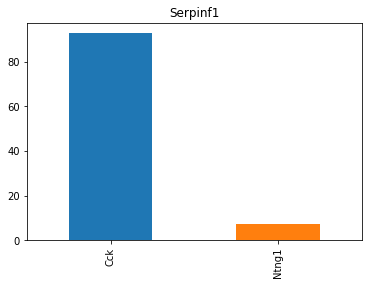

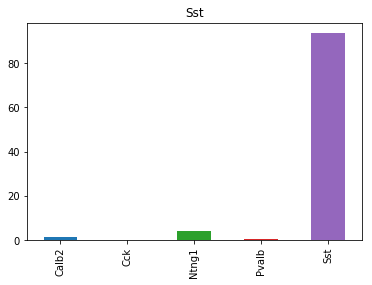

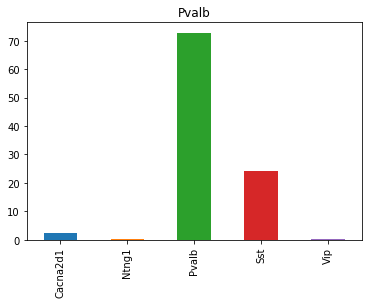

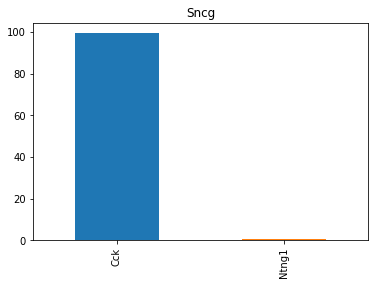

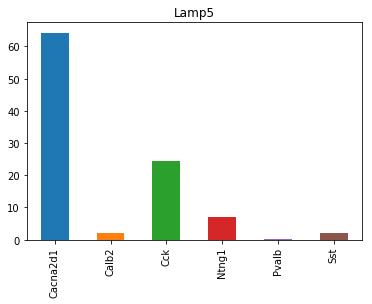

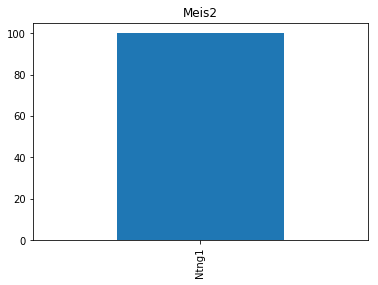

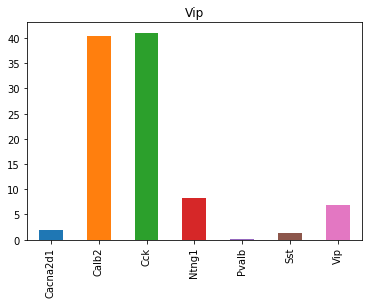

In [0]:
import re 
%matplotlib inline

vc6 = pd.DataFrame([],columns=['index','cluster','Class'])
for i0,i in enumerate(subcla[1:]):
    print(i+'\n')
    clai = dhipr1.loc[dhipr1.loc[:,'subclass']==i,'Class']
    vc = clai.value_counts()
    
    f = plt.figure()
    ax = f.add_axes()
    plt.title(i)
    #sb = plt.subplot(2, 1, 1)
    
    ivc = vc.index.str.split(pat='.',n=1,expand=True)

    vc.index = ivc

    #vc.plot(kind='bar')
    ##vc.reset_index(level=1)['Class']
    vc2 = vc.groupby(level=0).sum()
    
    ii5 = pd.DataFrame(np.repeat(re.split('\W+',i)[0],len(vc2.index)), columns=['Class'])
    vc7 = pd.DataFrame(vc2.reset_index())
    vc7.columns = ['index','cluster']
    vc5 = pd.concat([vc7,ii5],axis=1).reset_index()
    vc6 = pd.concat([vc6,vc5],axis=0)
    
    vc2 = vc2/vc2.sum()*100
    vc2.plot(kind='bar',ax=ax)
    
    
    print(vc2)
    
    vc3 = dhipr1.loc[dhipr1.loc[:,'subclass']==i,'Class'].value_counts()
    vc3=vc3/vc3.sum()*100
    vc4 = pd.concat([vc3,cla.loc[vc3.index,'geneTypesOld_Short']],axis=1)
    for clai in cla.index: 
        ss = cla.loc[clai,'geneTypesOld_Short']
        if type(ss)==pd.core.series.Series:
            ss = ss.iloc[0]
        idx = vc3.index.str.match(clai)
        if sum(idx)>0:
            vc4.loc[idx,'geneTypesOld_Short']=ss
    
    print('\n')
    print(vc4)
    
    print(i+'\n\n')

In [0]:
vc6=vc6.loc[:,['Class', 'cluster', 'index']]

In [0]:
vc7 =vc6.set_index('Class').loc[:,'cluster']
vc7 =vc7.groupby(level=0).sum()
print('% of interneurons of different ABA subclasses identified in hippocampus dataset')
vc7/vc7.sum()*100

% of interneurons of different ABA subclasses identified in hippocampus dataset


Class
Lamp5       23.696424
Meis2        0.054600
Pvalb       17.690418
Serpinf1     0.382200
Sncg         4.340704
Sst         24.979525
Vip         28.856129
Name: cluster, dtype: float64

In [0]:
vc7 =vc6.set_index('index').loc[:,'cluster']
vc7 =vc7.groupby(level=0).sum()
print('% of interneurons of different Hipp subclasses identified in hippocampus dataset')
vc7/vc7.sum()*100

% of interneurons of different Hipp subclasses identified in hippocampus dataset


index
Cacna2d1    16.216216
Calb2       12.503413
Cck         22.331422
Ntng1        5.296205
Pvalb       13.076713
Sst         28.555829
Vip          2.020202
Name: cluster, dtype: float64

Vip Rspo4 Rxfp1 Chat

Calb2    33.333333
Pvalb    33.333333
Sst      33.333333
Name: Class, dtype: float64


                      Class geneTypesOld_Short
Sst.Cryab         33.333333          Sst.Cryab
Pvalb.C1ql1.Npy   33.333333        Axon-axonic
Calb2.Vip.Igfbp4  33.333333                IS3
Vip Rspo4 Rxfp1 Chat


Sst Chodl

Sst    100.0
Name: Class, dtype: float64


                    Class geneTypesOld_Short
geneTypesNew_Short                          
Sst.Nos1            100.0         projection
Sst Chodl


Vip Igfbp6 Car10

Cck    100.0
Name: Class, dtype: float64


                            Class        geneTypesOld_Short
geneTypesNew_Short                                         
Cck.Cxcl14.Calb1.Tnfaip8l3  100.0  CCK perf-path associated
Vip Igfbp6 Car10


Sst Hpse Sema3c

Ntng1     9.722222
Sst      90.277778
Name: Class, dtype: float64


                          Class geneTypesOld_Short
geneTypesNew_Short                                
Sst.Npy.Serpine2      69.444444 

/home/stepaniu/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1027: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
/home/stepaniu/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1027: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
/home/stepaniu/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1027: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .rei

Cck    100.0
Name: Class, dtype: float64


                       Class     geneTypesOld_Short
Cck.Lmo1.Vip.Tac2       50.0             CCK basket
Cck.Cxcl14.Calb1.Tac2   50.0  Cck.Cxcl14.Calb1.Tac2
Sncg Slc17a8


Meis2 Adamts19

Ntng1    100.0
Name: Class, dtype: float64


                    Class geneTypesOld_Short
geneTypesNew_Short                          
Ntng1.Chrm2         100.0         Trilaminar
Meis2 Adamts19


Lamp5 Lhx6

Cacna2d1     3.821656
Cck         94.904459
Ntng1        0.636943
Pvalb        0.636943
Name: Class, dtype: float64


                          Class geneTypesOld_Short
geneTypesNew_Short                                
Cck.Cxcl14.Slc17a8    30.573248         CCK basket
Cck.Lmo1.Npy          21.019108         CCK basket
Cck.Sema5a            18.471338         CCK basket
Cck.Calca             12.738854         CCK basket
Cck.Lmo1.Vip.Fam19a2   9.554140         CCK basket
Cacna2d1.Lhx6.Reln     2.547771            MGE NGF
Cck.Lmo1.Vip.Tac2      1.273885    

/home/stepaniu/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1027: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
/home/stepaniu/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1027: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
/home/stepaniu/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1027: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .rei


                          Class geneTypesOld_Short
Sst.Npy.Cort          34.146341           hip-sept
Sst.Npy.Zbtb20        31.707317           hip-sept
Sst.Npy.Serpine2      18.292683           hip-sept
Sst.Pnoc.Pvalb         6.097561               O-LM
Pvalb.Tac1.Sst         3.658537          PV basket
Sst.Erbb4.Rgs10        3.658537     O-bistratified
Sst.Cryab              1.219512          Sst.Cryab
Sst.Pnoc.Calb1.Pvalb   1.219512               O-LM
Sst Tac1 Htr1d


Lamp5 Plch2 Dock5

Cacna2d1    94.387755
Calb2        1.020408
Ntng1        1.530612
Pvalb        0.510204
Sst          2.551020
Name: Class, dtype: float64


                          Class geneTypesOld_Short
geneTypesNew_Short                                
Cacna2d1.Ndnf.Rgs10   45.918367            CGE NGF
Cacna2d1.Ndnf.Npy     25.000000            CGE NGF
Cacna2d1.Lhx6.Reln    12.244898            MGE NGF
Cacna2d1.Ndnf.Cxcl14   9.693878            CGE NGF
Sst.Cryab              2.551020                NaN
Ntng1.R

/home/stepaniu/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1027: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
/home/stepaniu/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1027: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
/home/stepaniu/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`

Calb2    35.294118
Cck       1.960784
Sst      62.745098
Name: Class, dtype: float64


                           Class geneTypesOld_Short
Sst.Pnoc.Calb1.Igfbp5  19.607843               O-LM
Sst.Pnoc.Calb1.Pvalb   11.764706               O-LM
Calb2.Cntnap5a.Igfbp6  11.764706                IS1
Sst.Npy.Mgat4c          9.803922           hip-sept
Sst.Npy.Serpine2        7.843137           hip-sept
Sst.Npy.Zbtb20          5.882353           hip-sept
Calb2.Cntnap5a.Rspo3    5.882353                IS1
Calb2.Vip.Gpd1          5.882353                IS3
Calb2.Cryab             3.921569        Calb2.Cryab
Sst.Npy.Cort            3.921569           hip-sept
Sst.Pnoc.Pvalb          3.921569               O-LM
Calb2.Cntnap5a.Vip      3.921569                IS1
Calb2.Vip.Igfbp4        1.960784                IS3
Cck.Lypd1               1.960784          Cck.Lypd1
Calb2.Vip.Nos1          1.960784                IS3
Sst Esm1


Sst Chrna2 Glra3

Sst    100.0
Name: Class, dtype: float64


         

/home/stepaniu/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1027: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
/home/stepaniu/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/stepaniu/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1027: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an 

Sst    100.0
Name: Class, dtype: float64


              Class geneTypesOld_Short
Sst.Npy.Cort  100.0           hip-sept
Sst Tac1 Tacr3


Lamp5 Krt73

Cck    100.0
Name: Class, dtype: float64


                             Class geneTypesOld_Short
geneTypesNew_Short                                   
Cck.Cxcl14.Slc17a8       66.666667         CCK basket
Cck.Cxcl14.Calb1.Kctd12  33.333333                NaN
Lamp5 Krt73


Sncg Vip Itih5

Cck    100.0
Name: Class, dtype: float64


                                Class        geneTypesOld_Short
geneTypesNew_Short                                             
Cck.Cxcl14.Slc17a8          57.142857                CCK basket
Cck.Lmo1.Npy                14.285714                CCK basket
Cck.Cxcl14.Calb1.Tnfaip8l3   9.523810  CCK perf-path associated
Cck.Cxcl14.Vip               9.523810                       NaN
Cck.Lmo1.Vip.Tac2            4.761905                CCK basket
Cck.Cxcl14.Calb1.Kctd12      4.761905                       NaN
Sncg 

/home/stepaniu/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1027: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
/home/stepaniu/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/stepaniu/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1027: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an 


                        Class geneTypesOld_Short
geneTypesNew_Short                              
Sst.Npy.Serpine2    54.545455           hip-sept
Sst.Pnoc.Pvalb      18.181818               O-LM
Sst.Erbb4.Rgs10      9.090909     O-bistratified
Sst.Npy.Mgat4c       9.090909           hip-sept
Ntng1.Chrm2          9.090909         Trilaminar
Sst Mme Fam114a1


Lamp5 Fam19a1 Pax6

Cck    100.0
Name: Class, dtype: float64


                             Class geneTypesOld_Short
geneTypesNew_Short                                   
Cck.Cxcl14.Slc17a8       90.909091         CCK basket
Cck.Cxcl14.Calb1.Kctd12   9.090909                NaN
Lamp5 Fam19a1 Pax6


Sst Nts

Calb2    25.0
Pvalb    25.0
Sst      50.0
Name: Class, dtype: float64


                    Class geneTypesOld_Short
Sst.Erbb4.Th         50.0     O-bistratified
Pvalb.Tac1.Nr4a2     25.0          PV basket
Calb2.Cntnap5a.Vip   25.0                IS1
Sst Nts


Vip Lmo1 Myl1

Calb2    70.769231
Cck      11.538462
Ntng1     0.7

/home/stepaniu/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/stepaniu/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/stepaniu/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1027: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.


Pvalb     8.333333
Sst      91.666667
Name: Class, dtype: float64


                           Class geneTypesOld_Short
Sst.Pnoc.Calb1.Pvalb   33.333333               O-LM
Sst.Pnoc.Pvalb         25.000000               O-LM
Sst.Erbb4.Crh          16.666667     O-bistratified
Sst.Pnoc.Calb1.Igfbp5  16.666667               O-LM
Pvalb.Tac1.Sst          8.333333          PV basket
Sst Rxfp1 Prdm8


Sst Calb2 Necab1

Sst    100.0
Name: Class, dtype: float64


                      Class geneTypesOld_Short
Sst.Npy.Zbtb20    57.142857           hip-sept
Sst.Npy.Mgat4c    14.285714           hip-sept
Sst.Npy.Serpine2  14.285714           hip-sept
Sst.Npy.Cort      14.285714           hip-sept
Sst Calb2 Necab1


Vip Gpc3 Slc18a3

Calb2     8.333333
Cck      25.000000
Ntng1    50.000000
Sst       8.333333
Vip       8.333333
Name: Class, dtype: float64


                                Class        geneTypesOld_Short
geneTypesNew_Short                                             
Ntng1.Chrm2     

/home/stepaniu/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/stepaniu/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1027: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
/home/stepaniu/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retaine

Sst    100.0
Name: Class, dtype: float64


                           Class geneTypesOld_Short
geneTypesNew_Short                                 
Sst.Npy.Serpine2       40.476190           hip-sept
Sst.Npy.Zbtb20         30.952381           hip-sept
Sst.Npy.Cort           11.904762           hip-sept
Sst.Nos1                7.142857         projection
Sst.Erbb4.Rgs10         4.761905     O-bistratified
Sst.Npy.Mgat4c          2.380952           hip-sept
Sst.Pnoc.Calb1.Igfbp5   2.380952               O-LM
Sst Calb2 Pdlim5


Sst Myh8 Etv1 

Sst    100.0
Name: Class, dtype: float64


                       Class geneTypesOld_Short
Sst.Pnoc.Calb1.Igfbp5   50.0               O-LM
Sst.Npy.Mgat4c          20.0           hip-sept
Sst.Npy.Cort            20.0           hip-sept
Sst.Npy.Serpine2        10.0           hip-sept
Sst Myh8 Etv1 


Sst Tac2 Tacstd2

Sst    100.0
Name: Class, dtype: float64


                      Class geneTypesOld_Short
Sst.Pnoc.Calb1.Pvalb  100.0               O-LM

/home/stepaniu/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1027: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
/home/stepaniu/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/stepaniu/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1027: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an 

Cacna2d1    11.111111
Ntng1        1.851852
Pvalb       72.222222
Sst         14.814815
Name: Class, dtype: float64


                        Class geneTypesOld_Short
geneTypesNew_Short                              
Pvalb.C1ql1.Cpne5   23.456790        Axon-axonic
Pvalb.C1ql1.Pvalb   19.135802        Axon-axonic
Pvalb.Tac1.Sst      11.728395          PV basket
Cacna2d1.Lhx6.Reln  11.111111            MGE NGF
Sst.Pnoc.Pvalb       8.024691               O-LM
Pvalb.C1ql1.Npy      6.790123        Axon-axonic
Pvalb.Tac1.Syt2      6.790123          PV basket
Pvalb.Tac1.Akr1c18   4.320988          PV basket
Sst.Erbb4.Rgs10      3.703704     O-bistratified
Sst.Npy.Serpine2     1.851852           hip-sept
Ntng1.Chrm2          1.234568         Trilaminar
Sst.Cryab            0.617284                NaN
Sst.Npy.Zbtb20       0.617284           hip-sept
Ntng1.Rgs10          0.617284  Radiatum-retrohip
Pvalb Reln Tac1


Sst Myh8 Fibin

Sst    100.0
Name: Class, dtype: float64


                     

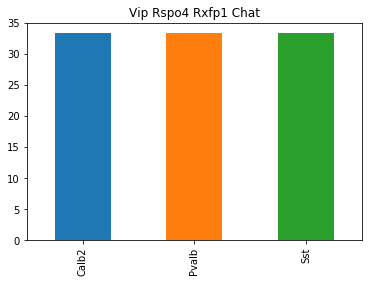

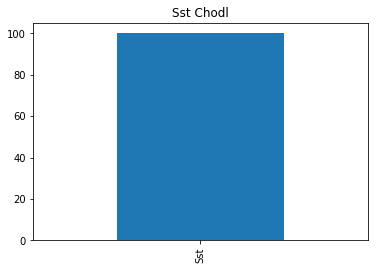

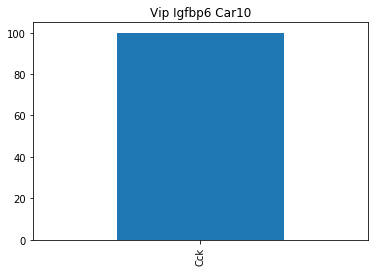

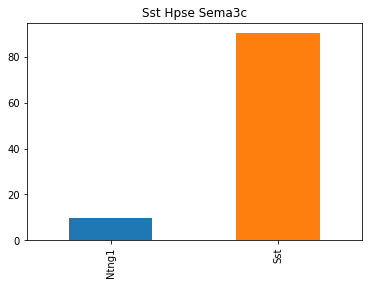

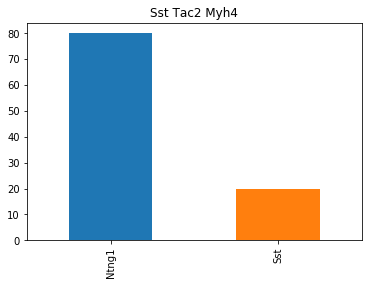

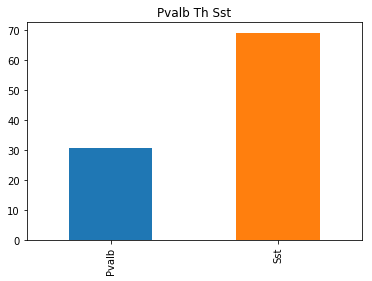

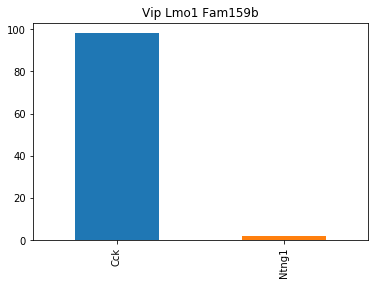

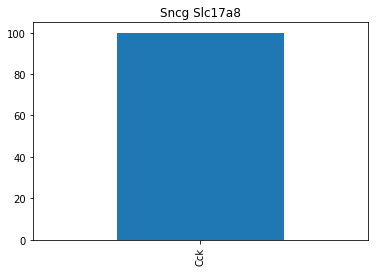

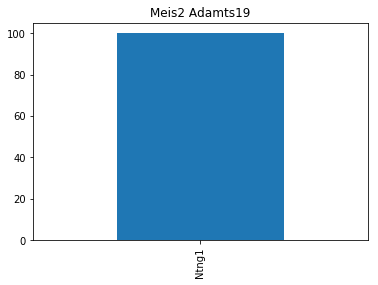

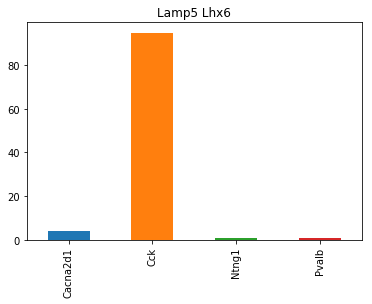

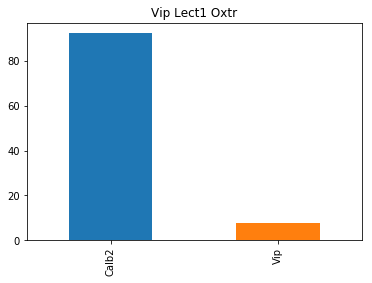

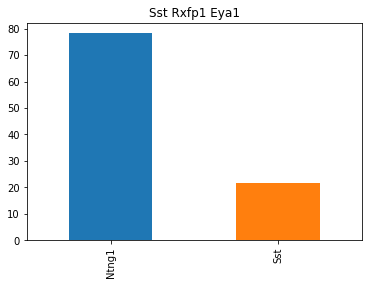

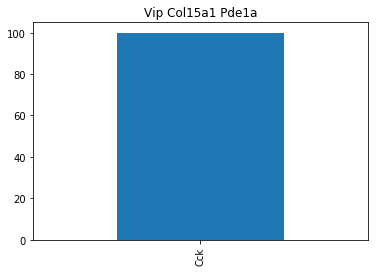

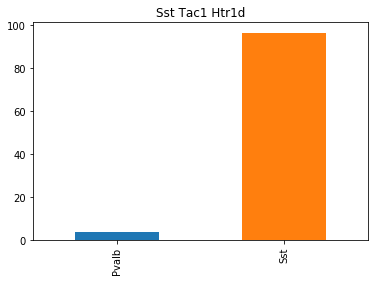

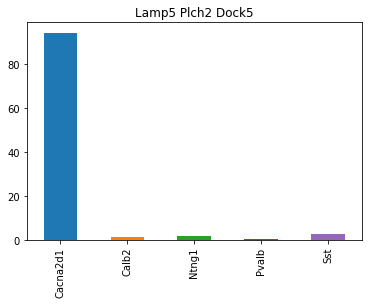

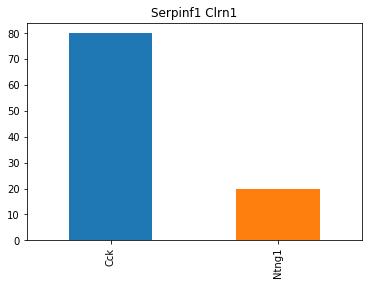

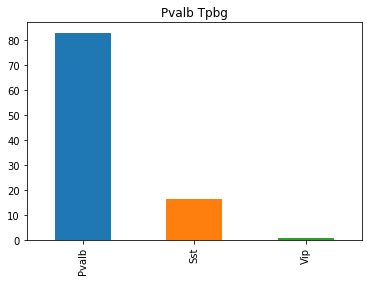

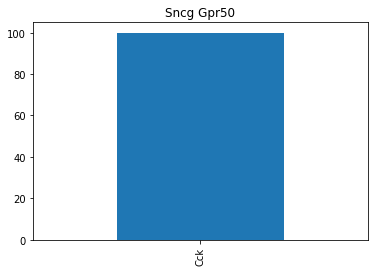

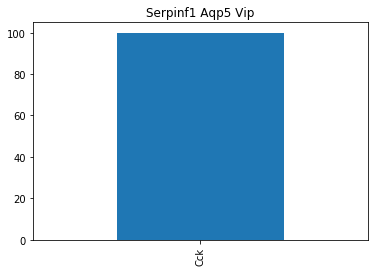

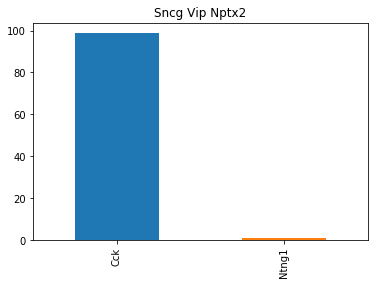

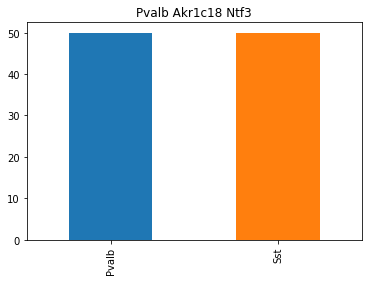

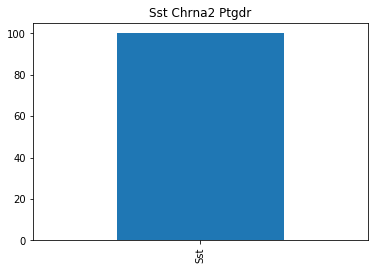

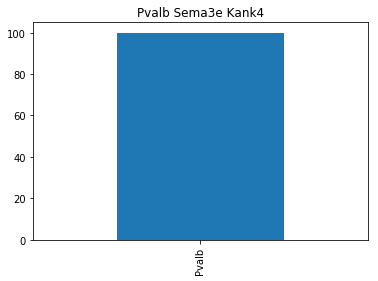

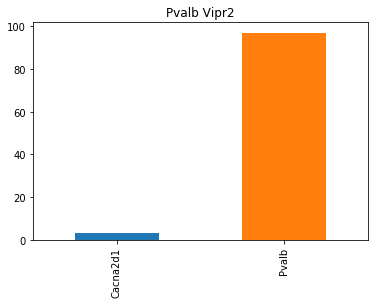

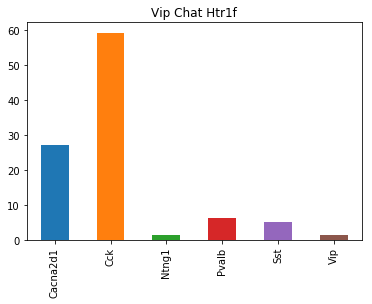

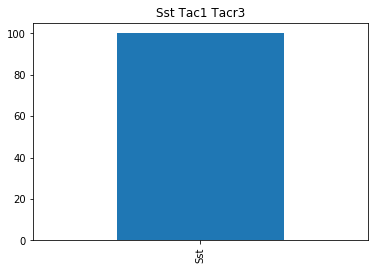

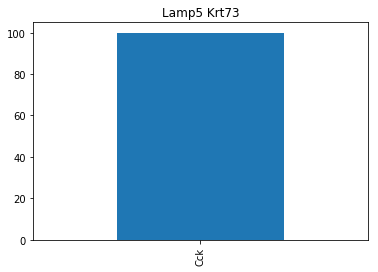

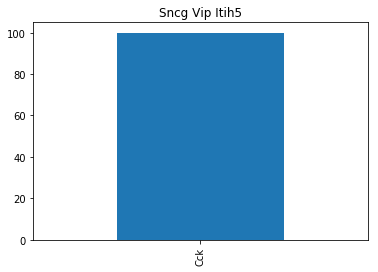

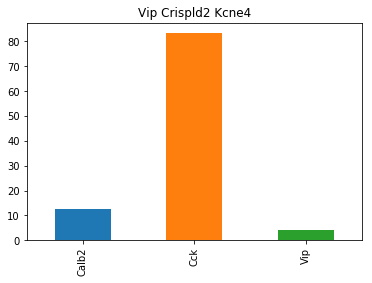

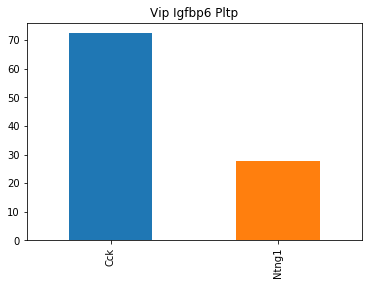

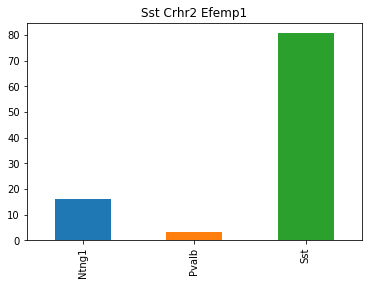

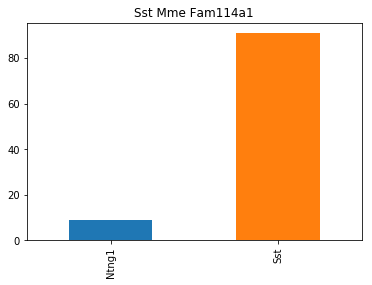

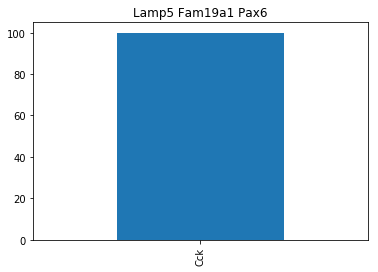

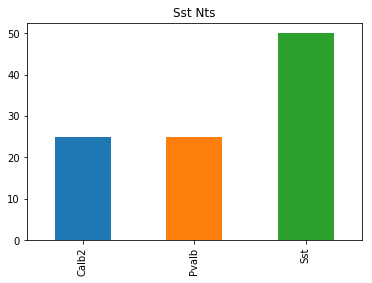

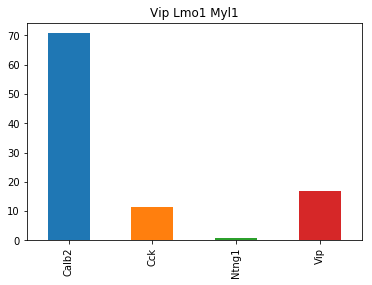

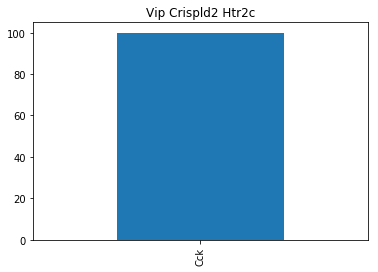

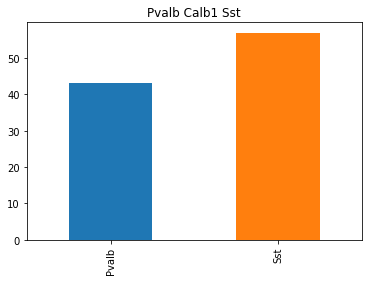

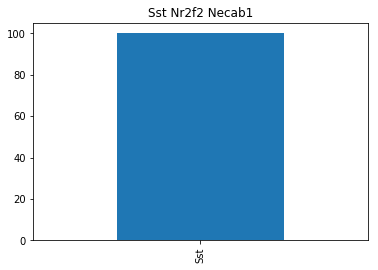

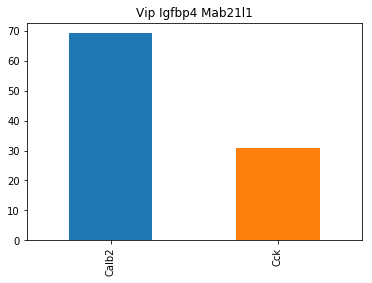

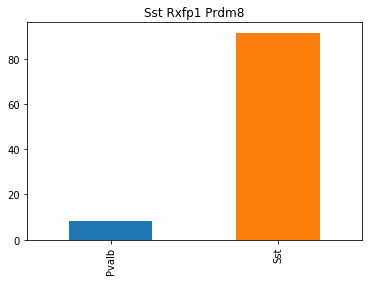

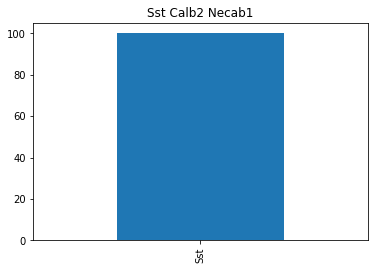

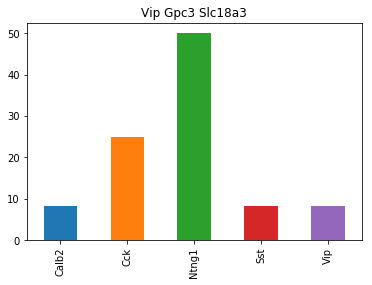

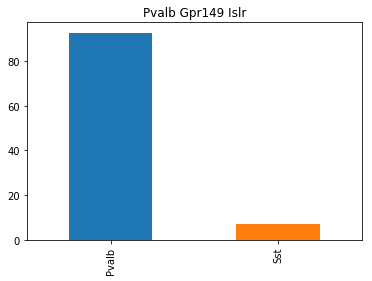

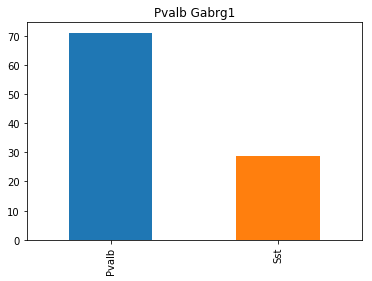

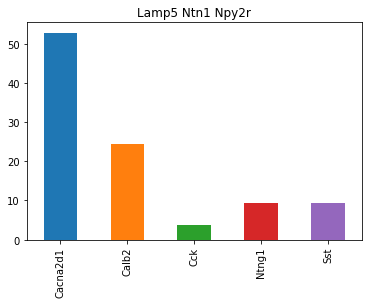

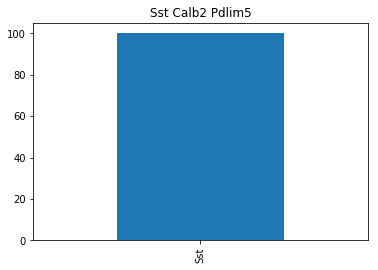

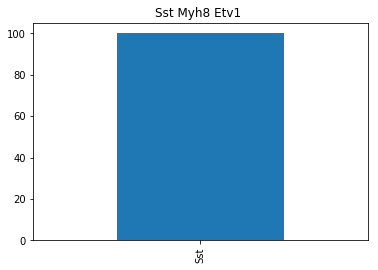

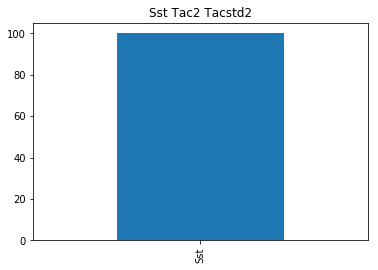

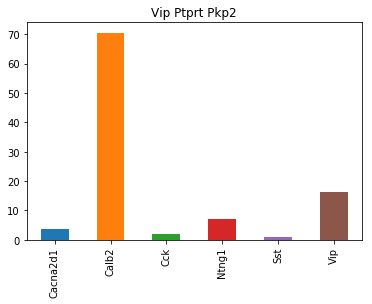

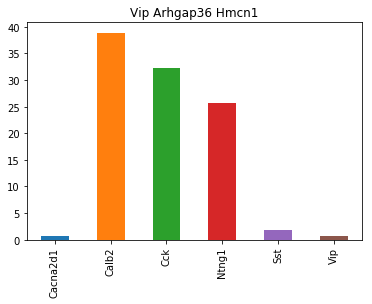

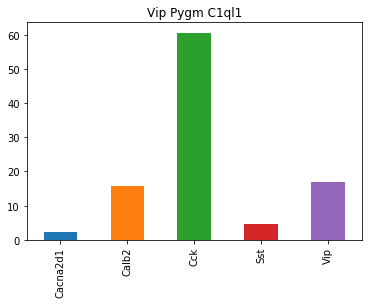

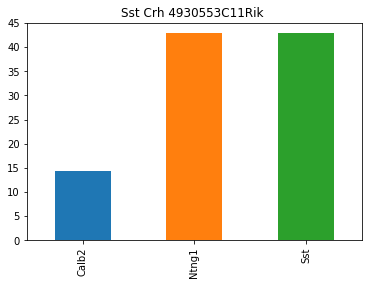

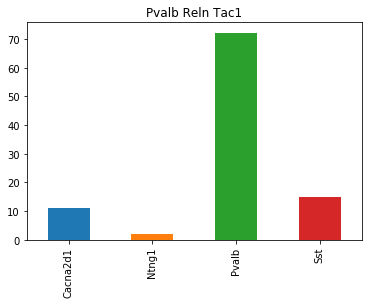

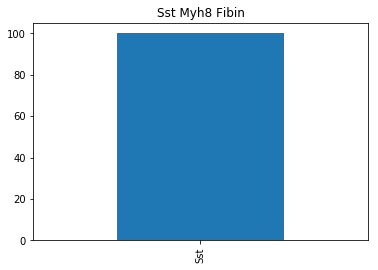

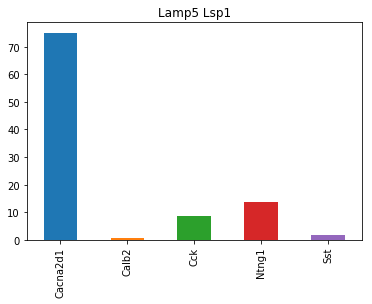

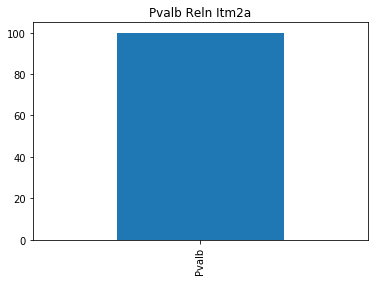

In [0]:
%matplotlib inline
for i0,i in enumerate(clu[1:]):
    print(i+'\n')
    clai = dhipr1.loc[dhipr1.loc[:,'cluster']==i,'Class']
    vc = clai.value_counts()
    
    f = plt.figure()
    ax = f.add_axes()
    plt.title(i)
    #sb = plt.subplot(2, 1, 1)
    
    ivc = vc.index.str.split(pat='.',n=1,expand=True)

    vc.index = ivc

    #vc.plot(kind='bar')
    ##vc.reset_index(level=1)['Class']
    vc2 = vc.groupby(level=0).sum()
    vc2 = vc2/vc2.sum()*100
    vc2.plot(kind='bar',ax=ax)
    
    
    print(vc2)
    
    vc3 = dhipr1.loc[dhipr1.loc[:,'cluster']==i,'Class'].value_counts()
    vc3=vc3/vc3.sum()*100
    
    try: 
        vc3old = cla.loc[vc3.index,'geneTypesOld_Short']
    except:    
        vc3old = pd.DataFrame(np.array(vc3.index),columns=['geneTypesOld_Short']) # cla.loc[vc3.index,'geneTypesOld_Short']
        vc3old.index = vc3.index
        
    #vc4 = pd.concat([vc3,cla.loc[vc3.index,'geneTypesOld_Short']],axis=1)
    vc4 = pd.concat([vc3,vc3old],axis=1)
    for clai in cla.index: 
        ss = cla.loc[clai,'geneTypesOld_Short']
        if type(ss)==pd.core.series.Series:
            ss = ss.iloc[0]
        idx = vc3.index.str.match(clai)
        if sum(idx)>0:
            vc4.loc[idx,'geneTypesOld_Short']=ss
    
    print('\n')
    print(vc4)
    
    print(i+'\n\n')

In [0]:
np.nonzero(lb_t2==np.nan)[0]
sum(lb_t2==np.nan)
print(lb_t2.shape)
data_train = latent[np.nonzero(all_dataset.batch_indices==1)[0]]
print(data_train.shape)
lb_t2[3663]

(6125, 1)
(3663, 20)


array(['Pvalb Tpbg'], dtype=object)

In [0]:
#lb_t2 = df_aba_vis_in_c.loc[:,'cluster'].values
#lb_t2= lb_t2.reshape((len(lb_t2),1))

lb_t2 = dhipr1.loc[:,'Class'].values
#print(set(lb_t2.tolist()))
lb_t2=lb_t2[:3663]
lb_t2= lb_t2.reshape((len(lb_t2),1))

print(np.unique(lb_t2))


from sklearn.neighbors import KNeighborsClassifier

#data_train, _, labels_train = trainer_scanvi.labelled_set.get_latent()
#data_test, _, labels_test = trainer_scanvi.unlabelled_set.get_latent()
data_train = latent[np.nonzero(all_dataset.batch_indices==1)[0]]
labels_train2 = lb_t2

data_test= latent[np.nonzero(all_dataset.batch_indices==0)[0]]
#labels_test = 

nn = KNeighborsClassifier(n_neighbors=10, leaf_size=30, p=2, metric='minkowski')

nn.fit(data_train, labels_train2)
labels_test23 = nn.predict(data_test)
score = nn.score(data_test, labels_test23)
score

['Cacna2d1.Lhx6.Reln' 'Cacna2d1.Lhx6.Vwa5a' 'Cacna2d1.Ndnf.Cxcl14'
 'Cacna2d1.Ndnf.Npy' 'Cacna2d1.Ndnf.Rgs10' 'Calb2.Cntnap5a.Igfbp6'
 'Calb2.Cntnap5a.Rspo3' 'Calb2.Cntnap5a.Vip' 'Calb2.Cryab'
 'Calb2.Vip.Gpd1' 'Calb2.Vip.Igfbp4' 'Calb2.Vip.Nos1' 'Cck.Calca'
 'Cck.Cxcl14.Calb1.Igfbp5' 'Cck.Cxcl14.Calb1.Kctd12'
 'Cck.Cxcl14.Calb1.Tac2' 'Cck.Cxcl14.Calb1.Tnfaip8l3' 'Cck.Cxcl14.Slc17a8'
 'Cck.Cxcl14.Vip' 'Cck.Lmo1.Npy' 'Cck.Lmo1.Vip.Crh' 'Cck.Lmo1.Vip.Fam19a2'
 'Cck.Lmo1.Vip.Tac2' 'Cck.Lypd1' 'Cck.Sema5a' 'Ntng1.Chrm2' 'Ntng1.Rgs10'
 'Ntng1.Synpr' 'Pvalb.C1ql1.Cpne5' 'Pvalb.C1ql1.Npy' 'Pvalb.C1ql1.Pvalb'
 'Pvalb.Tac1.Akr1c18' 'Pvalb.Tac1.Nr4a2' 'Pvalb.Tac1.Sst'
 'Pvalb.Tac1.Syt2' 'Sst.Cryab' 'Sst.Erbb4.Crh' 'Sst.Erbb4.Rgs10'
 'Sst.Erbb4.Th' 'Sst.Nos1' 'Sst.Npy.Cort' 'Sst.Npy.Mgat4c'
 'Sst.Npy.Serpine2' 'Sst.Npy.Zbtb20' 'Sst.Pnoc.Calb1.Igfbp5'
 'Sst.Pnoc.Calb1.Pvalb' 'Sst.Pnoc.Pvalb' 'Vip.Crh.C1ql1' 'Vip.Crh.Pcp4']


/home/stepaniu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


1.0

In [0]:
df_aba_vis_in_c2=df_aba_vis_in_c.set_index('cluster')

In [0]:
df_sb = pd.DataFrame(labels_test23,columns=['subclass'])
df_sb.index = df_aba_vis_in_c2.index[0:]
print(df_sb.head())

                               subclass
cluster                                
Vip Arhgap36 Hmcn1       Cck.Cxcl14.Vip
Lamp5 Lsp1                  Ntng1.Rgs10
Lamp5 Lsp1          Cacna2d1.Lhx6.Vwa5a
Vip Crispld2 Htr2c     Calb2.Vip.Igfbp4
Lamp5 Plch2 Dock5    Cacna2d1.Lhx6.Reln


In [0]:
df_sb2 = pd.DataFrame(labels_test23,columns=['cluster'])
df_sb2.index = df_aba_vis_in_c2.index[0:]
print(df_sb2.head())

                                cluster
cluster                                
Vip Arhgap36 Hmcn1       Cck.Cxcl14.Vip
Lamp5 Lsp1                  Ntng1.Rgs10
Lamp5 Lsp1          Cacna2d1.Lhx6.Vwa5a
Vip Crispld2 Htr2c     Calb2.Vip.Igfbp4
Lamp5 Plch2 Dock5    Cacna2d1.Lhx6.Reln


In [0]:
dhipr1 = dhipr.T
dhipr1 = pd.concat([df_aba_vis_in_c2.loc[:,['sample_name', 'sample_id', 'driver_lines', 'brain_subregion',
       'seq_batch', 'class', 'subclass']], df_sb, df_sb2],axis=1,sort=False)
dhipr1.head()

sample_name  sample_id      driver_lines  \
cluster                                                                
Vip Arhgap36 Hmcn1  F1S4_160108_001_A01  527128530  Slc32a1-IRES-Cre   
Lamp5 Lsp1          F1S4_160108_001_B01  527128536  Slc32a1-IRES-Cre   
Lamp5 Lsp1          F1S4_160108_001_C01  527128542  Slc32a1-IRES-Cre   
Vip Crispld2 Htr2c  F1S4_160108_001_D01  527128548  Slc32a1-IRES-Cre   
Lamp5 Plch2 Dock5   F1S4_160108_001_E01  527128554  Slc32a1-IRES-Cre   

                   brain_subregion    seq_batch      class subclass  \
cluster                                                               
Vip Arhgap36 Hmcn1            L2/3  R8S4-160225  GABAergic      Vip   
Lamp5 Lsp1                    L2/3  R8S4-160225  GABAergic    Lamp5   
Lamp5 Lsp1                    L2/3  R8S4-160225  GABAergic    Lamp5   
Vip Crispld2 Htr2c            L2/3  R8S4-160225  GABAergic      Vip   
Lamp5 Plch2 Dock5             L2/3  R8S4-160225  GABAergic    Lamp5   

                               subclass              cluster  
cluster                                                       
Vip Arhgap36 Hmcn1       Cck.Cxcl14.Vip       Cck.Cxcl14.Vip  
Lamp5 Lsp1                  Ntng1.Rgs10          Ntng1.Rgs10  
Lamp5 Lsp1          Cacna2d1.Lhx6.Vwa5a  Cacna2d1.Lhx6.Vwa5a  
Vip Crispld2 Htr2c     Calb2.Vip.Igfbp4     Calb2.Vip.Igfbp4  
Lamp5 Plch2 Dock5    Cacna2d1.Lhx6.Reln   Cacna2d1.Lhx6.Reln

In [0]:
#df['My new column'] = 'default value'
dhipr['Hipp old cluster'] = 'nan'

In [0]:
cla

geneTypesOld_Short     location KohusNames  \
geneTypesNew_Short                                                             
Cacna2d1.Ndnf                                CGE NGF           LM        NaN   
Cacna2d1.Lhx6.Reln                           MGE NGF           LM        NaN   
Cck.Cxcl14.Slc17a8                        CCK basket  R-LM border     CCK+BC   
Cck.Cxcl14.Calb1.Tnfaip8l3  CCK perf-path associated  R-LM border        NaN   
Cck.Cxcl14.Vip                                   NaN  R-LM border        NaN   
Cck.Cxcl14.Calb1.Igfbp5      CCK Schaffer-associated  R-LM border        NaN   
Vip.Crh                                          IS2  R-LM border        NaN   
Ntng1.Rgs10                        Radiatum-retrohip  R-LM border        NaN   
Calb2.Cntnap5a                                   IS1     Radiatum        NaN   
Cck.Lmo1                                  CCK basket     Radiatum     CCK+BC   
Cck.Calca                                 CCK basket     Radiatum     CCK+BC   
Cck.Sema5a                                CCK basket     Radiatum     CCK+BC   
Pvalb.Tac1                                 PV basket   Pyramidale      PV+BC   
Calb2.Vip                                        IS3   Pyramidale        NaN   
Pvalb.Tac1                           PV bistratified   Pyramidale        NaN   
Cacna2d1.Lhx6.Vwa5a                              Ivy   Pyramidale        NaN   
Pvalb.C1ql1                              Axon-axonic       Oriens        AAC   
Sst.Erbb4                             O-bistratified       Oriens        NaN   
Sst.Pnoc                                        O-LM       Oriens        NaN   
Sst.Nos1                                  projection       Oriens        NaN   
Sst.Npy                                     hip-sept       Oriens        NaN   
Ntng1.Chrm2                               Trilaminar       Oriens        NaN   

                                                 Io_n1                 Io_n2  \
geneTypesNew_Short                                                             
Cacna2d1.Ndnf                     Cacna2d1.Ndnf.Cxcl14     Cacna2d1.Ndnf.Npy   
Cacna2d1.Lhx6.Reln                  Cacna2d1.Lhx6.Reln                   NaN   
Cck.Cxcl14.Slc17a8                  Cck.Cxcl14.Slc17a8                   NaN   
Cck.Cxcl14.Calb1.Tnfaip8l3  Cck.Cxcl14.Calb1.Tnfaip8l3                   NaN   
Cck.Cxcl14.Vip                          Cck.Cxcl14.Vip                   NaN   
Cck.Cxcl14.Calb1.Igfbp5        Cck.Cxcl14.Calb1.Igfbp5                   NaN   
Vip.Crh                                  Vip.Crh.C1ql1          Vip.Crh.Pcp4   
Ntng1.Rgs10                                Ntng1.Rgs10                   NaN   
Calb2.Cntnap5a                   Calb2.Cntnap5a.Igfbp6  Calb2.Cntnap5a.Rspo3   
Cck.Lmo1                                  Cck.Lmo1.Npy      Cck.Lmo1.Vip.Crh   
Cck.Calca                                    Cck.Calca                   NaN   
Cck.Sema5a                                  Cck.Sema5a                   NaN   
Pvalb.Tac1                          Pvalb.Tac1.Akr1c18      Pvalb.Tac1.Nr4a2   
Calb2.Vip                               Calb2.Vip.Gpd1      Calb2.Vip.Igfbp4   
Pvalb.Tac1                          Pvalb.Tac1.Akr1c18      Pvalb.Tac1.Nr4a2   
Cacna2d1.Lhx6.Vwa5a                Cacna2d1.Lhx6.Vwa5a                   NaN   
Pvalb.C1ql1                          Pvalb.C1ql1.Cpne5       Pvalb.C1ql1.Npy   
Sst.Erbb4                                Sst.Erbb4.Crh       Sst.Erbb4.Rgs10   
Sst.Pnoc                         Sst.Pnoc.Calb1.Igfbp5  Sst.Pnoc.Calb1.Pvalb   
Sst.Nos1                                      Sst.Nos1                   NaN   
Sst.Npy                                   Sst.Npy.Cort        Sst.Npy.Mgat4c   
Ntng1.Chrm2                                Ntng1.Chrm2                   NaN   

                                           Io_n3              Io_n4  
geneTypesNew_Short                                                   
Cacna2d1.Ndnf                Cacna2d1.Ndnf.Rgs10    

In [0]:
for clai in cla.index: 
    ss = cla.loc[clai,'geneTypesOld_Short']
    if type(ss)==pd.core.series.Series:
        ss = ss.iloc[0]
    #idx = vc3.index.str.match(clai)
    idx = vc4.loc[:,'geneTypesOld_Short'].str.match(clai)
    if sum(idx)>0:
        vc4.loc[idx,'geneTypesOld_Short']=ss
        hipo2aba.loc[ss,vc3.index]=hipo2aba.loc[ss,vc3.index] + vc3.loc[:]

        dhipr2.loc[clai,'Hipp old cluster'] = i    

In [0]:
#clu2 = list(set(dhipr1['cluster']))

for i0,i in enumerate(cla.index):
    idx = dhipr1.loc[:,'cluster'].str.match(i)
    ss = cla.loc[i,'geneTypesOld_Short']
    if type(ss)==pd.core.series.Series:
        ss = ss.iloc[0]
    dhipr1.loc[idx,'Hipp old cluster']=ss
#   dhipr1.loc[idx,['cluster',Hipp old cluster']]

### calculate some types statistics

Calb2.Cntnap5a.Vip

Vip    100.0
Name: cluster, dtype: float64


                        cluster geneTypesOld_Short
Vip Ptprt Pkp2        40.909091                IS1
Vip Rspo4 Rxfp1 Chat  13.636364                IS1
Vip Arhgap36 Hmcn1    12.121212                IS1
Vip Gpc3 Slc18a3      11.363636                IS1
Vip Igfbp4 Mab21l1    11.363636                IS1
Vip Pygm C1ql1         4.545455                IS1
Vip Rspo1 Itga4        3.787879                IS1
Vip Lect1 Oxtr         1.515152                IS1
Vip Chat Htr1f         0.757576                IS1
Calb2.Cntnap5a.Vip


Cck.Cxcl14.Calb1.Kctd12

Lamp5    34.482759
Sncg     58.620690
Vip       6.896552
Name: cluster, dtype: float64


                         cluster       geneTypesOld_Short
Sncg Gpr50             27.586207  Cck.Cxcl14.Calb1.Kctd12
Lamp5 Fam19a1 Pax6     27.586207  Cck.Cxcl14.Calb1.Kctd12
Sncg Vip Nptx2         20.689655  Cck.Cxcl14.Calb1.Kctd12
Sncg Vip Itih5         10.344828  Cck.Cxcl14.Calb1.Kctd12


/home/stepaniu/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/stepaniu/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/stepaniu/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until expli


Calb2.Vip.Gpd1


Ntng1.Rgs10

Lamp5    77.586207
Sncg      1.724138
Sst      15.517241
Vip       5.172414
Name: cluster, dtype: float64


                          cluster geneTypesOld_Short
Lamp5 Lsp1              46.551724  Radiatum-retrohip
Lamp5 Plch2 Dock5       12.068966  Radiatum-retrohip
Lamp5 Ntn1 Npy2r        10.344828  Radiatum-retrohip
Lamp5 Krt73              8.620690  Radiatum-retrohip
Sst Tac2 Tacstd2         6.896552  Radiatum-retrohip
Sst Rxfp1 Eya1           5.172414  Radiatum-retrohip
Vip Arhgap36 Hmcn1       3.448276  Radiatum-retrohip
Sst Tac2 Myh4            1.724138  Radiatum-retrohip
Sncg Vip Nptx2           1.724138  Radiatum-retrohip
Sst Crh 4930553C11Rik    1.724138  Radiatum-retrohip
Vip Pygm C1ql1           1.724138  Radiatum-retrohip
Ntng1.Rgs10


Pvalb.Tac1.Syt2

Lamp5     1.204819
Pvalb    98.795181
Name: cluster, dtype: float64


                      cluster geneTypesOld_Short
Pvalb Gpr149 Islr   67.469880          PV basket
Pvalb Reln Tac1     13.253

/home/stepaniu/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/stepaniu/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/stepaniu/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until expli

Lamp5       50.557621
Pvalb       19.702602
Serpinf1     0.371747
Vip         29.368030
Name: cluster, dtype: float64


                        cluster geneTypesOld_Short
Lamp5 Lsp1            35.687732            MGE NGF
Vip Chat Htr1f        23.791822            MGE NGF
Pvalb Reln Tac1       16.728625            MGE NGF
Lamp5 Plch2 Dock5     12.267658            MGE NGF
Lamp5 Lhx6             2.230483            MGE NGF
Vip Rspo4 Rxfp1 Chat   2.230483            MGE NGF
Vip Pygm C1ql1         1.858736            MGE NGF
Pvalb Reln Itm2a       1.486989            MGE NGF
Pvalb Tpbg             1.115242            MGE NGF
Vip Rspo1 Itga4        0.743494            MGE NGF
Vip Ptprt Pkp2         0.743494            MGE NGF
Serpinf1 Aqp5 Vip      0.371747            MGE NGF
Lamp5 Ntn1 Npy2r       0.371747            MGE NGF
Pvalb Gpr149 Islr      0.371747            MGE NGF
Cacna2d1.Lhx6.Reln


Sst.Npy.Serpine2

Meis2     0.468384
Pvalb     2.341920
Sst      97.189696
Name: cluster, dtyp

/home/stepaniu/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/stepaniu/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/stepaniu/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until expli

Pvalb    86.363636
Sst      13.636364
Name: cluster, dtype: float64


                          cluster geneTypesOld_Short
Pvalb Reln Tac1         33.333333          PV basket
Pvalb Tpbg              21.969697          PV basket
Pvalb Calb1 Sst         15.909091          PV basket
Pvalb Gpr149 Islr        9.090909          PV basket
Sst Tac1 Htr1d           5.681818          PV basket
Sst Tac1 Tacr3           2.651515          PV basket
Pvalb Th Sst             2.651515          PV basket
Pvalb Sema3e Kank4       2.272727          PV basket
Sst Crh 4930553C11Rik    1.893939          PV basket
Pvalb Akr1c18 Ntf3       1.136364          PV basket
Sst Mme Fam114a1         1.136364          PV basket
Sst Nr2f2 Necab1         0.757576          PV basket
Sst Esm1                 0.378788          PV basket
Sst Nts                  0.378788          PV basket
Sst Crhr2 Efemp1         0.378788          PV basket
Sst Calb2 Necab1         0.378788          PV basket
Pvalb.Tac1.Sst


Sst.Nos1

Me

/home/stepaniu/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/stepaniu/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/stepaniu/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until expli


Ntng1.Chrm2


Cck.Lmo1.Vip.Tac2

Serpinf1     3.333333
Vip         96.666667
Name: cluster, dtype: float64


                      cluster geneTypesOld_Short
Vip Crispld2 Htr2c  55.000000         CCK basket
Vip Crispld2 Kcne4  23.333333         CCK basket
Vip Chat Htr1f      15.000000         CCK basket
Serpinf1 Aqp5 Vip    3.333333         CCK basket
Vip Col15a1 Pde1a    1.666667         CCK basket
Vip Lmo1 Fam159b     1.666667         CCK basket
Cck.Lmo1.Vip.Tac2


Cacna2d1.Ndnf.Npy

Lamp5    100.0
Name: cluster, dtype: float64


                     cluster geneTypesOld_Short
Lamp5 Lsp1         63.070539            CGE NGF
Lamp5 Plch2 Dock5  29.045643            CGE NGF
Lamp5 Krt73         4.979253            CGE NGF
Lamp5 Ntn1 Npy2r    2.904564            CGE NGF
Cacna2d1.Ndnf.Npy


Ntng1.Synpr

Lamp5     1.657459
Meis2     0.552486
Vip      97.790055
Name: cluster, dtype: float64


                        cluster geneTypesOld_Short
Vip Arhgap36 Hmcn1    46.961326        Ntng1.Syn

/home/stepaniu/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/stepaniu/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/stepaniu/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until expli

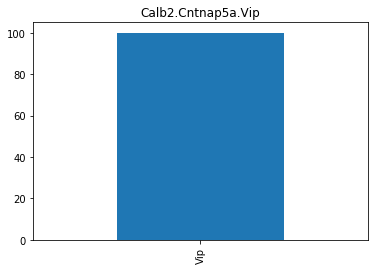

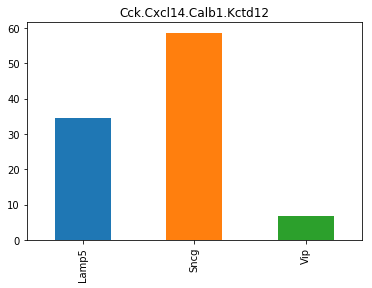

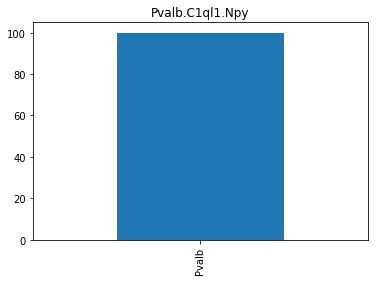

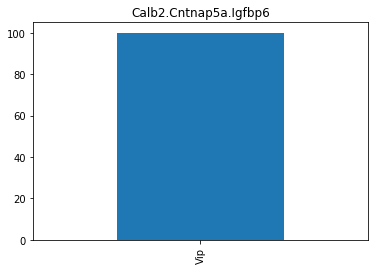

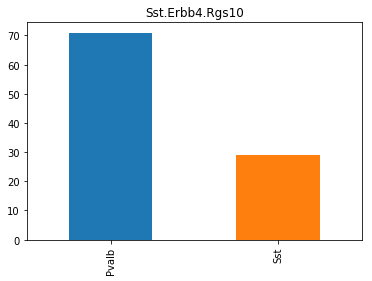

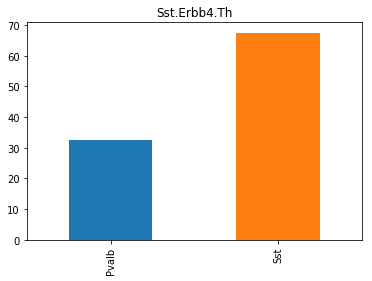

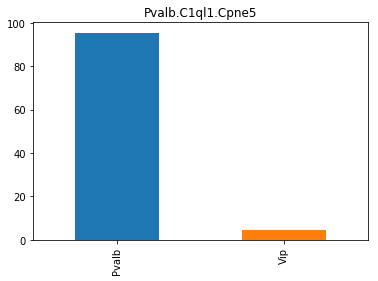

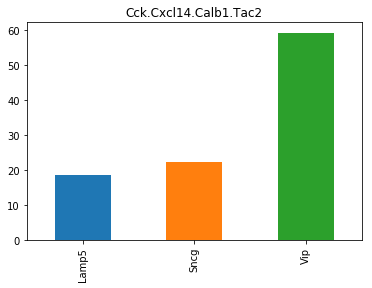

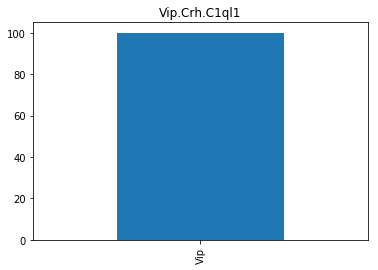

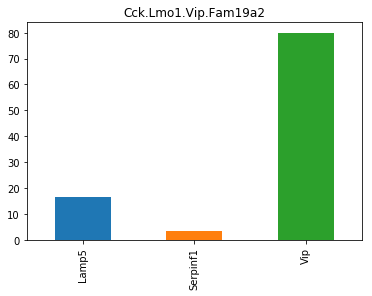

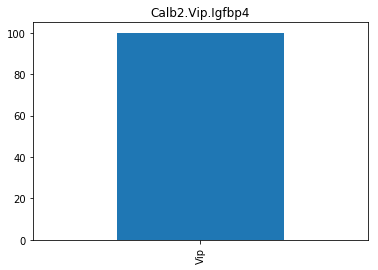

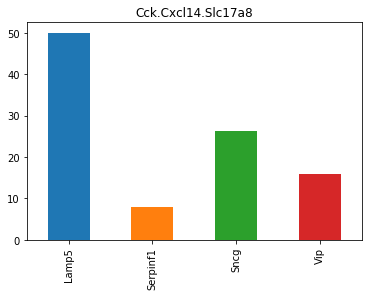

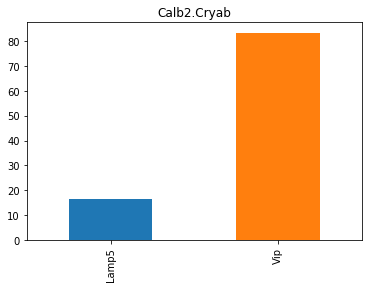

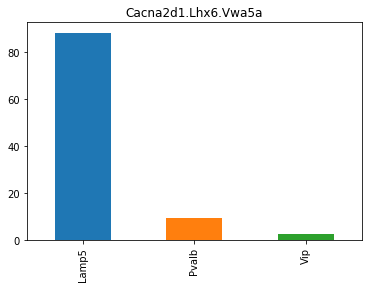

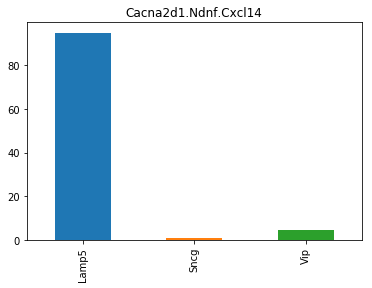

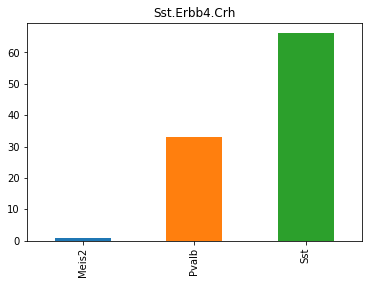

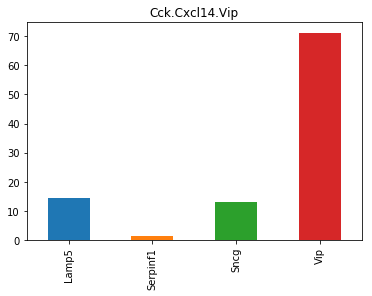

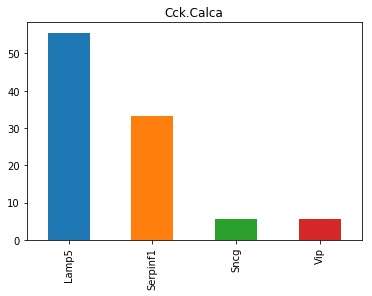

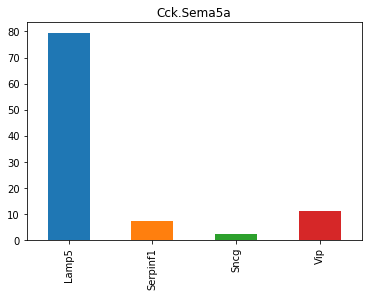

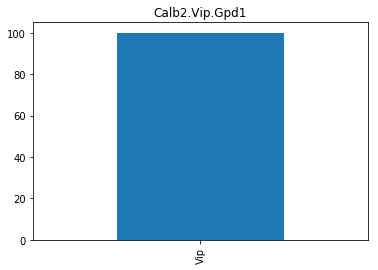

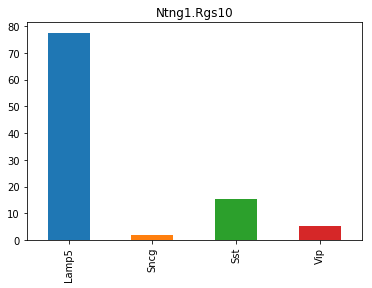

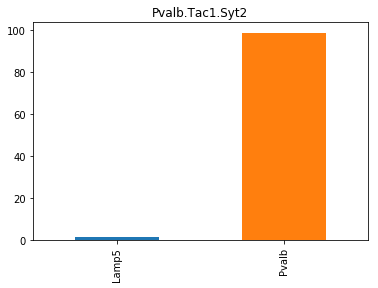

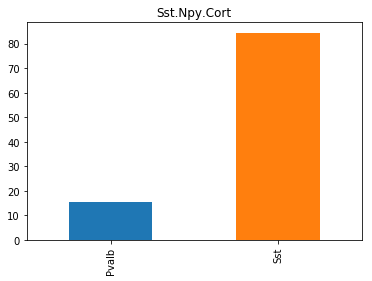

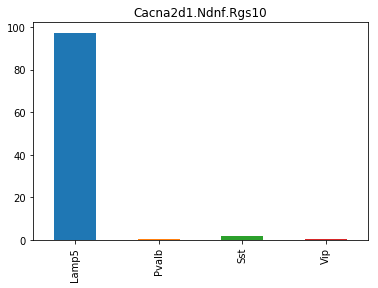

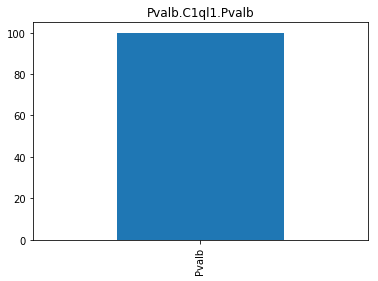

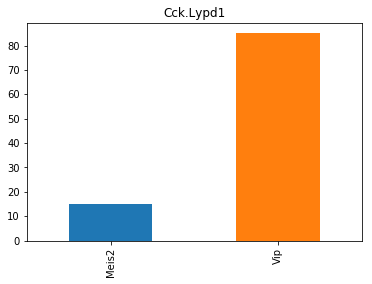

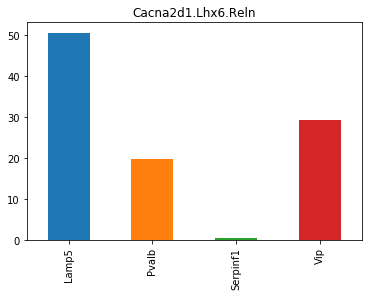

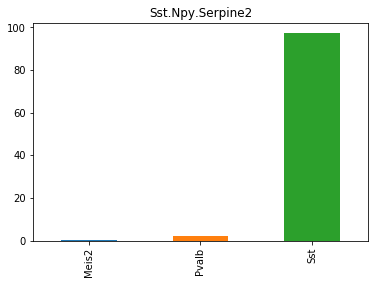

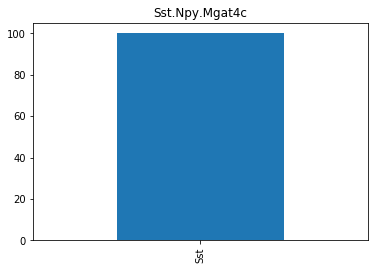

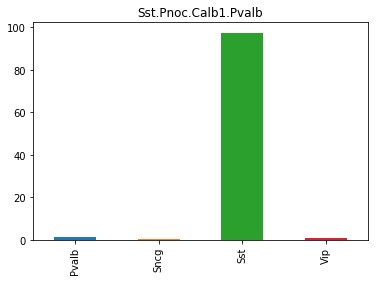

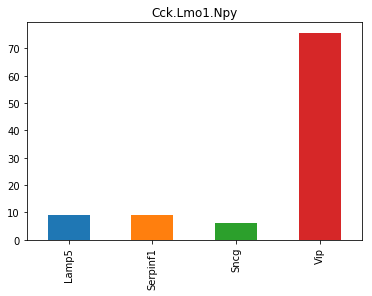

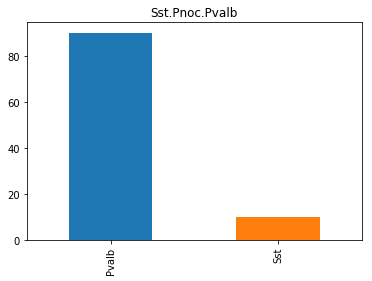

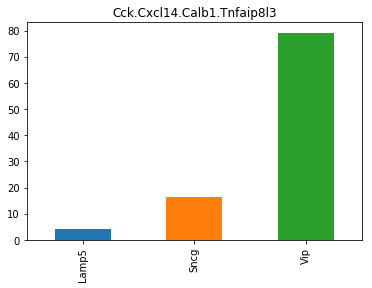

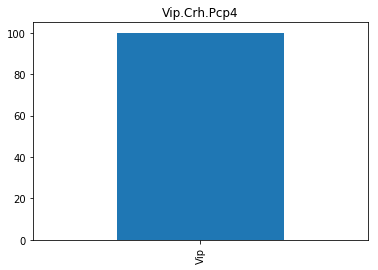

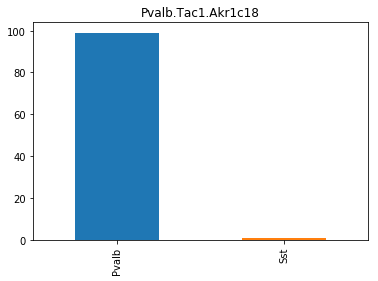

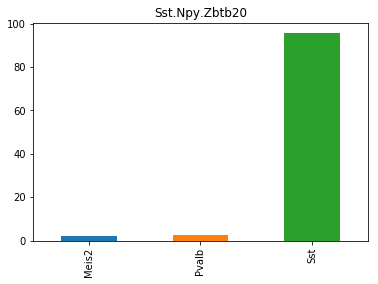

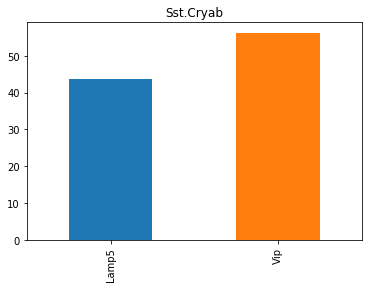

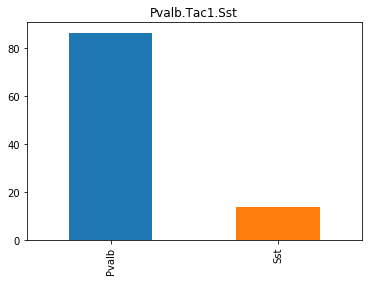

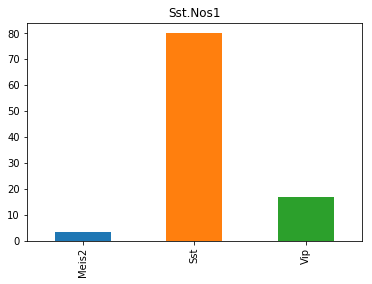

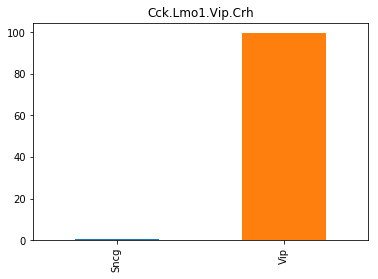

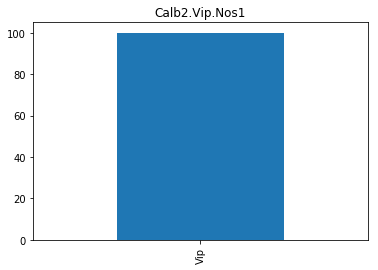

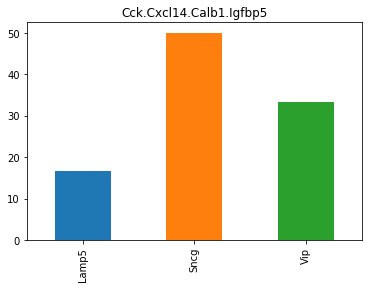

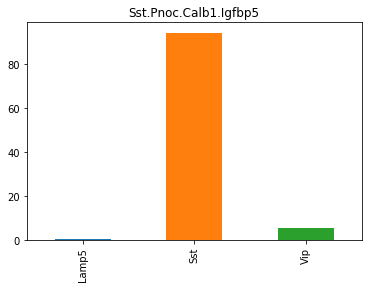

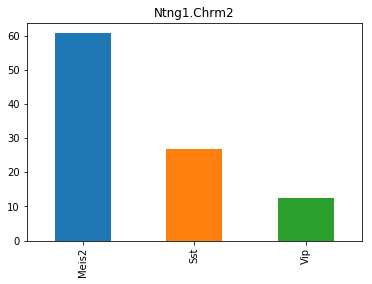

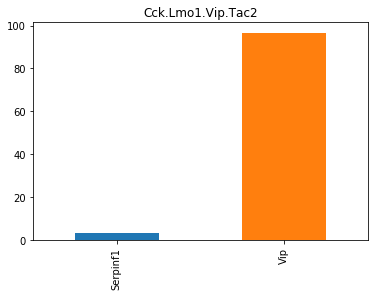

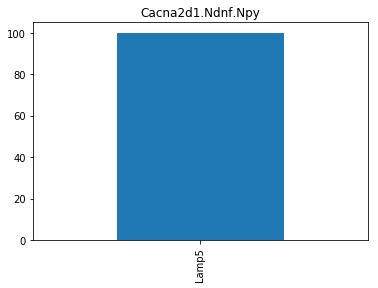

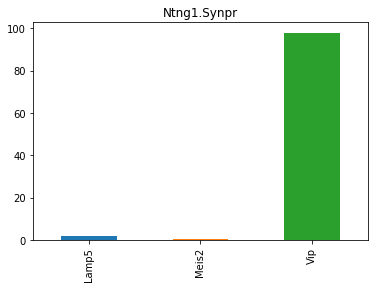

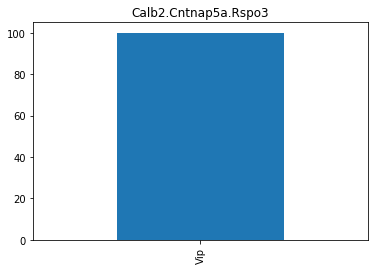

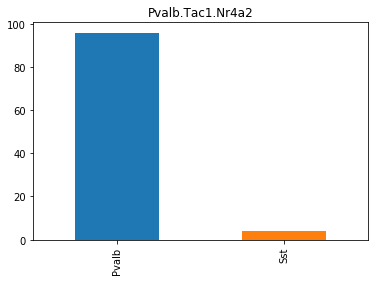

In [0]:
clu2 = list(set(dhipr1['cluster']))
#clu2
cluaba=list(set(dhipr1.index))

hip2aba=np.zeros((len(clu2[0:]), len(cluaba)))
hip2aba=pd.DataFrame(hip2aba,index=clu2[0:], columns=cluaba)

hipo = set(cla.loc[:,'geneTypesOld_Short'])

hipo2aba=np.zeros((len(hipo), len(cluaba)))
hipo2aba=pd.DataFrame(np.zeros((len(hipo), len(cluaba))),index=hipo, columns=cluaba)


%matplotlib inline
for i0,i in enumerate(clu2[0:]):
    print(i+'\n')
    #clai = dhipr1.loc[dhipr1.loc[:,'cluster']==i,'Class']
    clai = dhipr1.index[dhipr1.loc[:,'cluster']==i]
    
    
    #dhipr2.loc[clai,'Hipp_cluster'] = i
    
    
    vc = clai.value_counts()
    
    f = plt.figure()
    ax = f.add_axes()
    plt.title(i)
    #sb = plt.subplot(2, 1, 1)
    
    ivc = vc.index.str.split(pat=' ',n=1,expand=True)

    vc.index = ivc

    #vc.plot(kind='bar')
    ##vc.reset_index(level=1)['Class']
    vc2 = vc.groupby(level=0).sum()
    vc2 = vc2/vc2.sum()*100
    vc2.plot(kind='bar',ax=ax)
    
    
    print(vc2)
    
    vc3 = dhipr1.index[dhipr1.loc[:,'cluster']==i].value_counts()
    
    hip2aba.loc[i,vc3.index]=hip2aba.loc[i,vc3.index] + vc3.loc[:]
    
    
    vc3=vc3/vc3.sum()*100
    
    
    vc3old = pd.DataFrame(np.repeat(np.array([i]),len(vc3.index)),columns=['geneTypesOld_Short']) # cla.loc[vc3.index,'geneTypesOld_Short']
    vc3old.index = vc3.index

    #try: 
    #    vc3old = cla.loc[i,'geneTypesOld_Short']
    #except:    
    #    vc3old = pd.DataFrame(np.repeat(np.array([i]),len(vc3.index)),columns=['geneTypesOld_Short']) # cla.loc[vc3.index,'geneTypesOld_Short']
    #    vc3old.index = vc3.index

    #vc4 = pd.concat([vc3,cla.loc[vc3.index,'geneTypesOld_Short']],axis=1)
    vc4 = pd.concat([vc3,vc3old],axis=1)
    for clai in cla.index: 
        ss = cla.loc[clai,'geneTypesOld_Short']
        if type(ss)==pd.core.series.Series:
            ss = ss.iloc[0]
        #idx = vc3.index.str.match(clai)
        idx = vc4.loc[:,'geneTypesOld_Short'].str.match(clai)
        if sum(idx)>0:
            vc4.loc[idx,'geneTypesOld_Short']=ss
            hipo2aba.loc[ss,vc3.index]=hipo2aba.loc[ss,vc3.index] + vc3.loc[:]
            
            
            
            
    
    print('\n')
    print(vc4)
    
    print(i+'\n\n')
    
    


In [0]:
hip2aba0 = hip2aba.copy(deep=True)
hipo2aba0 = hipo2aba.copy(deep=True)

In [0]:

hipo2aba = hipo2aba0.copy(deep=True)
#for i in hip2aba.index:
#    hip2aba.loc[i,:] = hip2aba.loc[i,:]/sum(hip2aba.loc[i,:])
    
for i in hip2aba.columns:
    hip2aba.loc[:,i] = hip2aba.loc[:,i]/sum(hip2aba.loc[:,i])    
hip2aba=hip2aba.sort_index(axis=0)
hip2aba=hip2aba.sort_index(axis=1)



hipo2aba0 = hipo2aba.copy(deep=True)
for i in hipo2aba.columns:
    hipo2aba.loc[:,i] = hipo2aba.loc[:,i]/sum(hipo2aba.loc[:,i])
    
##hip2aba=hip2aba.sort_index(axis=0)
hipo2aba=hipo2aba.sort_index(axis=1)  

#for i in hipo2aba.index:
#    hipo2aba.loc[i,:] = hipo2aba.loc[i,:]/sum(hipo2aba.loc[i,:])
    
#hip2aba=hip2aba.sort_index(axis=0)
hipo2aba=hipo2aba.sort_index(axis=1) 

In [0]:
os.getcwd()

'/home/stepaniu/Documents/references/transcriptomes to STP/scVI_data'

In [0]:
if do_laptop:
    abanames=pd.read_csv('/Users/stepaniu/Downloads/group_plot_data (14).csv')
else:
    abanames=pd.read_csv('group_plot_data (14).csv')
abanames = abanames.loc[:,'cluster_label']
abanames2 = abanames.loc[abanames.loc[:].isin(hip2aba.columns)]
print(len(abanames))
len(abanames2)
hip2aba = hip2aba.loc[:,abanames2]

60


49
60


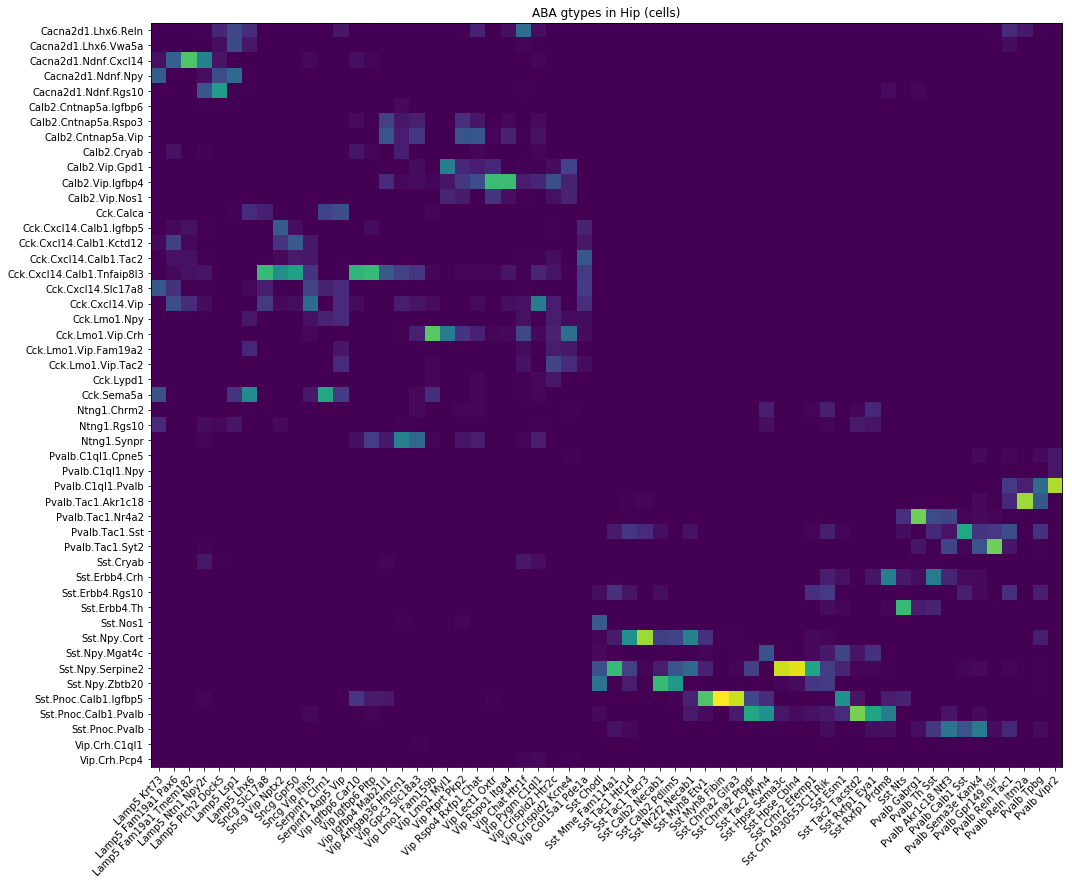

In [0]:
print(len(hip2aba.index))
print(len(hip2aba.columns))
%matplotlib inline

fig, ax = plt.subplots(figsize=(15, 15))
im = ax.imshow(hip2aba)

# We want to show all ticks...
ax.set_xticks(np.arange(len(hip2aba.columns)))
ax.set_yticks(np.arange(len(hip2aba.index)))
# ... and label them with the respective list entries
ax.set_xticklabels(hip2aba.columns)
ax.set_yticklabels(hip2aba.index)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
#for i in range(len(hip2aba.index)):
#    for j in range(len(hip2aba.columns)):
#       text = ax.text(j, i, hip2aba[i, j],
#                       ha="center", va="center", color="w")

ax.set_title("ABA gtypes in Hip (cells)")
fig.tight_layout()
plt.show()


In [0]:
hipo2aba = hipo2aba0.copy(deep=True)


hipo2aba0 = hipo2aba.copy(deep=True)
for i in hipo2aba.columns:
    hipo2aba.loc[:,i] = hipo2aba.loc[:,i]/sum(hipo2aba.loc[:,i])
    
##hip2aba=hip2aba.sort_index(axis=0)
hipo2aba=hipo2aba.sort_index(axis=1)  


abanames=pd.read_csv('/Users/stepaniu/Downloads/group_plot_data (14).csv')
abanames = abanames.loc[:,'cluster_label']
abanames2 = abanames.loc[abanames.loc[:].isin(hipo2aba.columns)]
print(len(abanames))
len(abanames2)

In [0]:
hipo2aba = hipo2aba.loc[[np.nan,'CGE NGF','MGE NGF', 'Ivy', 'Radiatum-retrohip', 'CCK perf-path associated',
                        'CCK Schaffer-associated', 'CCK basket','IS1','IS2','IS3', 'Axon-axonic','PV basket',
                        'O-bistratified','PV bistratified','hip-sept','Trilaminar', 'O-LM','projection'],:]

hipo2aba = hipo2aba.loc[:,abanames2]

hipo2aba0 = hipo2aba0.loc[[np.nan,'CGE NGF','MGE NGF', 'Ivy', 'Radiatum-retrohip', 'CCK perf-path associated',
                        'CCK Schaffer-associated', 'CCK basket','IS1','IS2','IS3', 'Axon-axonic','PV basket',
                        'O-bistratified','PV bistratified','hip-sept','Trilaminar', 'O-LM','projection'],:]

hipo2aba0 = hipo2aba0.loc[:,abanames2]

hipo2aba = hipo2aba.loc[:,['Lamp5 Fam19a1 Pax6', 'Lamp5 Fam19a1 Tmem182', 'Lamp5 Krt73',
       'Lamp5 Ntn1 Npy2r', 'Lamp5 Plch2 Dock5', 'Lamp5 Lsp1','Lamp5 Lhx6', 'Sncg Gpr50',
       'Sncg Slc17a8', 'Sncg Vip Itih5', 'Sncg Vip Nptx2', 'Serpinf1 Aqp5 Vip', 'Serpinf1 Clrn1', 'Vip Arhgap36 Hmcn1',
       'Vip Chat Htr1f', 'Vip Col15a1 Pde1a', 'Vip Crispld2 Htr2c',
       'Vip Crispld2 Kcne4', 'Vip Gpc3 Slc18a3', 'Vip Igfbp4 Mab21l1',
       'Vip Igfbp6 Car10', 'Vip Igfbp6 Pltp', 'Vip Lect1 Oxtr',
       'Vip Lmo1 Fam159b', 'Vip Lmo1 Myl1', 'Vip Ptprt Pkp2', 'Vip Pygm C1ql1',
       'Vip Rspo1 Itga4', 'Vip Rspo4 Rxfp1 Chat', 'Pvalb Gabrg1', 'Pvalb Gpr149 Islr', 'Pvalb Reln Itm2a',
       'Pvalb Reln Tac1', 'Pvalb Sema3e Kank4', 'Pvalb Th Sst', 'Pvalb Tpbg',
       'Pvalb Vipr2',  'Sst Calb2 Necab1',
       'Sst Calb2 Pdlim5',  'Sst Chrna2 Glra3', 'Sst Chrna2 Ptgdr',
       'Sst Crh 4930553C11Rik ', 'Sst Crhr2 Efemp1', 'Sst Esm1',
       'Sst Hpse Cbln4', 'Sst Hpse Sema3c', 'Sst Mme Fam114a1',
       'Sst Myh8 Etv1 ', 'Sst Myh8 Fibin', 'Sst Nr2f2 Necab1', 'Sst Nts',
       'Sst Rxfp1 Eya1', 'Sst Rxfp1 Prdm8', 'Sst Tac1 Htr1d', 'Sst Tac1 Tacr3',
       'Sst Tac2 Myh4', 'Sst Tac2 Tacstd2','Sst Chodl']]

19
60


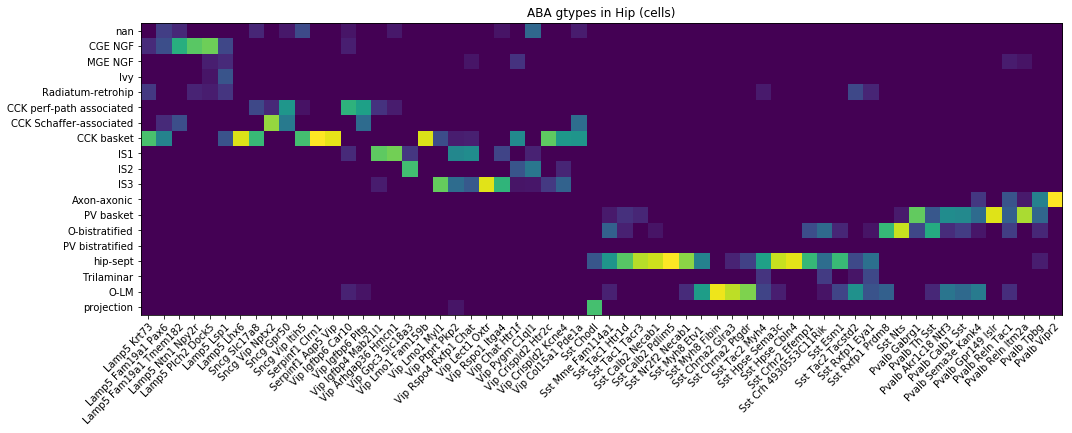

In [0]:
print(len(hipo2aba.index))
print(len(hipo2aba.columns))
%matplotlib inline

fig, ax = plt.subplots(figsize=(15, 15))
im = ax.imshow(hipo2aba*(hipo2aba>0.05))

# We want to show all ticks...
ax.set_xticks(np.arange(len(hipo2aba.columns)))
ax.set_yticks(np.arange(len(hipo2aba.index)))
# ... and label them with the respective list entries
ax.set_xticklabels(hipo2aba.columns)
ax.set_yticklabels(hipo2aba.index)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
#for i in range(len(hip2aba.index)):
#    for j in range(len(hip2aba.columns)):
#       text = ax.text(j, i, hip2aba[i, j],
#                       ha="center", va="center", color="w")

ax.set_title("ABA gtypes in Hip (cells)")
fig.tight_layout()
plt.show()


In [0]:
hipo2aba0.loc[:,'Lamp5 Lhx6']

NaN                          0.000000
CGE NGF                      0.000000
MGE NGF                      2.230483
Ivy                          2.325581
Radiatum-retrohip            0.000000
CCK perf-path associated     0.000000
CCK Schaffer-associated      0.000000
CCK basket                  79.045323
IS1                          0.000000
IS2                          0.000000
IS3                          0.000000
Axon-axonic                  0.000000
PV basket                    0.000000
O-bistratified               0.000000
PV bistratified              0.000000
hip-sept                     0.000000
Trilaminar                   0.000000
O-LM                         0.000000
projection                   0.000000
Name: Lamp5 Lhx6, dtype: float64

In [0]:
#hipo2aba0.loc['Radiatum-retrohip',:]

In [0]:
hipo2aba0.loc[:,'Lamp5 Lsp1']

NaN                          0.000000
CGE NGF                     63.947732
MGE NGF                     35.687732
Ivy                         77.519380
Radiatum-retrohip           46.551724
CCK perf-path associated     0.000000
CCK Schaffer-associated      0.000000
CCK basket                  76.552931
IS1                          0.000000
IS2                          0.000000
IS3                          0.000000
Axon-axonic                  0.000000
PV basket                    0.000000
O-bistratified               0.000000
PV bistratified              0.000000
hip-sept                     0.000000
Trilaminar                   0.000000
O-LM                         0.000000
projection                   0.000000
Name: Lamp5 Lsp1, dtype: float64

In [0]:
hipo2aba.loc[:,'Lamp5 Lsp1']*100

NaN                          0.000000
CGE NGF                     21.297489
MGE NGF                     11.885630
Ivy                         25.817461
Radiatum-retrohip           15.503831
CCK perf-path associated     0.000000
CCK Schaffer-associated      0.000000
CCK basket                  25.495590
IS1                          0.000000
IS2                          0.000000
IS3                          0.000000
Axon-axonic                  0.000000
PV basket                    0.000000
O-bistratified               0.000000
PV bistratified              0.000000
hip-sept                     0.000000
Trilaminar                   0.000000
O-LM                         0.000000
projection                   0.000000
Name: Lamp5 Lsp1, dtype: float64

19
60


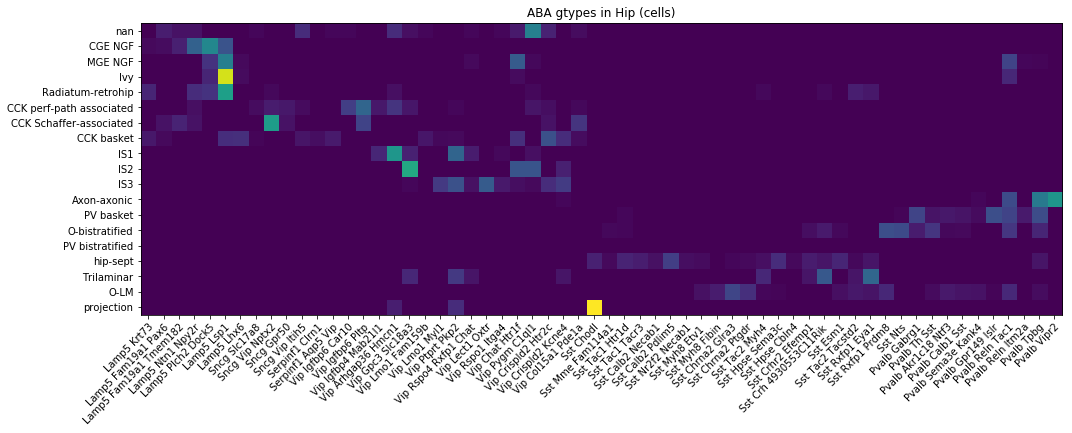

In [0]:
#hipo2aba=np.zeros((len(hipo), len(cluaba)))
#hipo2aba=pd.DataFrame(np.zeros((len(hipo), len(cluaba))),index=hipo, columns=cluaba)

#for i in hip2aba.columns:
#    hip2aba.loc[:,i] = hip2aba.loc[:,i]/sum(hip2aba.loc[:,i])    
#hip2aba=hip2aba.sort_index(axis=0)
#hip2aba=hip2aba.sort_index(axis=1)

hipo2aba = hipo2aba0.copy(deep=True)
hipo2aba = hipo2aba.loc[[np.nan,'CGE NGF','MGE NGF', 'Ivy', 'Radiatum-retrohip', 'CCK perf-path associated',
                        'CCK Schaffer-associated', 'CCK basket','IS1','IS2','IS3', 'Axon-axonic','PV basket',
                        'O-bistratified','PV bistratified','hip-sept','Trilaminar', 'O-LM','projection'],:]

hipo2aba = hipo2aba.loc[:,abanames2]

sort_columns=0
if sort_columns:
    for i in hipo2aba.columns:
        hipo2aba.loc[:,i] = hipo2aba.loc[:,i]/(sum(hipo2aba.loc[:,i]))
else:
    for i in hipo2aba.index:
        hipo2aba.loc[i,:] = hipo2aba.loc[i,:]/(sum(hipo2aba.loc[i,:])+0.00001)    
    
##hip2aba=hip2aba.sort_index(axis=0)
#hipo2aba=hipo2aba.sort_index(axis=1)  

#for i in hipo2aba.index:
#    hipo2aba.loc[i,:] = hipo2aba.loc[i,:]/sum(hipo2aba.loc[i,:])
    
#hip2aba=hip2aba.sort_index(axis=0)
#hipo2aba=hipo2aba.sort_index(axis=1) 


print(len(hipo2aba.index))
print(len(hipo2aba.columns))
%matplotlib inline

fig, ax = plt.subplots(figsize=(15, 15))
im = ax.imshow(hipo2aba*(hipo2aba>0.01))

# We want to show all ticks...
ax.set_xticks(np.arange(len(hipo2aba.columns)))
ax.set_yticks(np.arange(len(hipo2aba.index)))
# ... and label them with the respective list entries
ax.set_xticklabels(hipo2aba.columns)
ax.set_yticklabels(hipo2aba.index)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
#for i in range(len(hip2aba.index)):
#    for j in range(len(hip2aba.columns)):
#       text = ax.text(j, i, hip2aba[i, j],
#                       ha="center", va="center", color="w")

ax.set_title("ABA gtypes in Hip (cells)")
fig.tight_layout()
plt.show()


In [0]:
ct = hipo2aba0.loc['CCK basket',:].sort_index(axis=0)
ct=ct/sum(ct)*100
ct

Lamp5 Fam19a1 Pax6         2.255639
Lamp5 Fam19a1 Tmem182      0.000000
Lamp5 Krt73                5.260198
Lamp5 Lhx6                11.292189
Lamp5 Lsp1                10.936133
Lamp5 Ntn1 Npy2r           0.375940
Lamp5 Plch2 Dock5          0.000000
Pvalb Akr1c18 Ntf3         0.000000
Pvalb Calb1 Sst            0.000000
Pvalb Gabrg1               0.000000
Pvalb Gpr149 Islr          0.000000
Pvalb Reln Itm2a           0.000000
Pvalb Reln Tac1            0.000000
Pvalb Sema3e Kank4         0.000000
Pvalb Th Sst               0.000000
Pvalb Tpbg                 0.000000
Pvalb Vipr2                0.000000
Serpinf1 Aqp5 Vip          6.082123
Serpinf1 Clrn1             3.071058
Sncg Gpr50                 0.000000
Sncg Slc17a8               1.169591
Sncg Vip Itih5             4.651652
Sncg Vip Nptx2             0.000000
Sst Calb2 Necab1           0.000000
Sst Calb2 Pdlim5           0.000000
Sst Chodl                  0.000000
Sst Chrna2 Glra3           0.000000
Sst Chrna2 Ptgdr           0

In [0]:
os.getcwd()

'/home/stepaniu/Documents/references/transcriptomes to STP/scVI_data'

In [0]:
if do_laptop:
    dcol = '/Users/stepaniu/Documents/morphological_types_in_ABA/'
    dfc = pd.read_json(dcol+'cluster_layer_expression_GABAergic.json')
else:
    dcol ==''
    dfc = pd.read_json('cluster_layer_expression_GABAergic.json')
print(len(dfc.index))

dfc.columns

NameError: name 'dcol' is not defined

In [0]:
print(len(df_aba_vis_in_c.index))
df_aba_vis_in_c.columns
df_aba_vis_in_c_s = df_aba_vis_in_c.set_index('sample_name')
dfc_s = dfc.set_index('sample_name')

df_aba_vis_in_c_s2 = pd.concat([df_aba_vis_in_c_s,dfc_s],axis=1)
df_aba_vis_in_c_s2

6125


NameError: name 'dfc' is not defined

In [0]:
print(len(df_aba_vis_in_c_s2.index))
nn = 6125

ivisp=df_aba_vis_in_c_s2.loc[:,'cluster']==df_aba_vis_in_c_s2.loc[:,'cluster_label']
df_aba_vis_in_c_s_vis=df_aba_vis_in_c_s2.loc[ivisp,:]


NameError: name 'df_aba_vis_in_c_s2' is not defined

In [0]:
#all_dataset.batch_indices==0

print(sum(df_aba_vis_in_c_s_vis.index[0:nn] == df_aba_vis_in_c_s.index[0:nn]))

#in_s_vis = df_aba_vis_in_c_s_vis.index[0:nn] == df_aba_vis_in_c_s.index[0:nn]


NameError: name 'df_aba_vis_in_c_s_vis' is not defined

In [0]:
cols = df_aba_vis_in_c_s_vis.loc[:,'cluster_color']

df_aba_vis_in_c_s_vis = df_aba_vis_in_c_s_vis.reset_index()


NameError: name 'df_aba_vis_in_c_s_vis' is not defined

In [0]:
df_aba_vis_in_c_s_vis.head()

NameError: name 'df_aba_vis_in_c_s_vis' is not defined

In [0]:
print(latent.shape)
print(all_dataset._X.shape)
print((all_dataset.batch_indices==0).shape)

latent2 = latent[(all_dataset.batch_indices==0).reshape((all_dataset.batch_indices.shape[0],)),:]

latent2.shape

(9788, 20)
(9788, 14125)
(9788, 1)


(6125, 20)

In [0]:
cla

geneTypesOld_Short     location KohusNames  \
geneTypesNew_Short                                                             
Cacna2d1.Ndnf                                CGE NGF           LM        NaN   
Cacna2d1.Lhx6.Reln                           MGE NGF           LM        NaN   
Cck.Cxcl14.Slc17a8                        CCK basket  R-LM border     CCK+BC   
Cck.Cxcl14.Calb1.Tnfaip8l3  CCK perf-path associated  R-LM border        NaN   
Cck.Cxcl14.Vip                                   NaN  R-LM border        NaN   
Cck.Cxcl14.Calb1.Igfbp5      CCK Schaffer-associated  R-LM border        NaN   
Vip.Crh                                          IS2  R-LM border        NaN   
Ntng1.Rgs10                        Radiatum-retrohip  R-LM border        NaN   
Calb2.Cntnap5a                                   IS1     Radiatum        NaN   
Cck.Lmo1                                  CCK basket     Radiatum     CCK+BC   
Cck.Calca                                 CCK basket     Radiatum     CCK+BC   
Cck.Sema5a                                CCK basket     Radiatum     CCK+BC   
Pvalb.Tac1                                 PV basket   Pyramidale      PV+BC   
Calb2.Vip                                        IS3   Pyramidale        NaN   
Pvalb.Tac1                           PV bistratified   Pyramidale        NaN   
Cacna2d1.Lhx6.Vwa5a                              Ivy   Pyramidale        NaN   
Pvalb.C1ql1                              Axon-axonic       Oriens        AAC   
Sst.Erbb4                             O-bistratified       Oriens        NaN   
Sst.Pnoc                                        O-LM       Oriens        NaN   
Sst.Nos1                                  projection       Oriens        NaN   
Sst.Npy                                     hip-sept       Oriens        NaN   
Ntng1.Chrm2                               Trilaminar       Oriens        NaN   

                                                 Io_n1                 Io_n2  \
geneTypesNew_Short                                                             
Cacna2d1.Ndnf                     Cacna2d1.Ndnf.Cxcl14     Cacna2d1.Ndnf.Npy   
Cacna2d1.Lhx6.Reln                  Cacna2d1.Lhx6.Reln                   NaN   
Cck.Cxcl14.Slc17a8                  Cck.Cxcl14.Slc17a8                   NaN   
Cck.Cxcl14.Calb1.Tnfaip8l3  Cck.Cxcl14.Calb1.Tnfaip8l3                   NaN   
Cck.Cxcl14.Vip                          Cck.Cxcl14.Vip                   NaN   
Cck.Cxcl14.Calb1.Igfbp5        Cck.Cxcl14.Calb1.Igfbp5                   NaN   
Vip.Crh                                  Vip.Crh.C1ql1          Vip.Crh.Pcp4   
Ntng1.Rgs10                                Ntng1.Rgs10                   NaN   
Calb2.Cntnap5a                   Calb2.Cntnap5a.Igfbp6  Calb2.Cntnap5a.Rspo3   
Cck.Lmo1                                  Cck.Lmo1.Npy      Cck.Lmo1.Vip.Crh   
Cck.Calca                                    Cck.Calca                   NaN   
Cck.Sema5a                                  Cck.Sema5a                   NaN   
Pvalb.Tac1                          Pvalb.Tac1.Akr1c18      Pvalb.Tac1.Nr4a2   
Calb2.Vip                               Calb2.Vip.Gpd1      Calb2.Vip.Igfbp4   
Pvalb.Tac1                          Pvalb.Tac1.Akr1c18      Pvalb.Tac1.Nr4a2   
Cacna2d1.Lhx6.Vwa5a                Cacna2d1.Lhx6.Vwa5a                   NaN   
Pvalb.C1ql1                          Pvalb.C1ql1.Cpne5       Pvalb.C1ql1.Npy   
Sst.Erbb4                                Sst.Erbb4.Crh       Sst.Erbb4.Rgs10   
Sst.Pnoc                         Sst.Pnoc.Calb1.Igfbp5  Sst.Pnoc.Calb1.Pvalb   
Sst.Nos1                                      Sst.Nos1                   NaN   
Sst.Npy                                   Sst.Npy.Cort        Sst.Npy.Mgat4c   
Ntng1.Chrm2                                Ntng1.Chrm2                   NaN   

                                           Io_n3              Io_n4  
geneTypesNew_Short                                                   
Cacna2d1.Ndnf                Cacna2d1.Ndnf.Rgs10    

In [0]:
dhipr1.head()
dhipr1.loc[dhipr1.loc[:,'Hipp old cluster'].isna(),'Hipp old cluster']='nondef'
oclu=list(set(dhipr1.loc[dhipr1.loc[:,'Hipp old cluster'].isna()==False,'Hipp old cluster'].values))
oclu

['O-bistratified',
 'CGE NGF',
 'CCK Schaffer-associated',
 'Trilaminar',
 'MGE NGF',
 'IS2',
 'CCK perf-path associated',
 'Radiatum-retrohip',
 'O-LM',
 'CCK basket',
 'PV basket',
 'Axon-axonic',
 'nondef',
 'hip-sept',
 'Ivy',
 'IS1',
 'IS3',
 'projection']

In [0]:
latent_u_vis = UMAP(spread=2).fit_transform(latent2)

In [0]:
#latent_u_vis = UMAP(spread=2).fit_transform(latent2)

colors = ["#991f1f", "#ff9999", "#ff4400", "#ff8800", "#664014", "#665c52",
          "#cca300", "#f1ff33", "#b4cca3", "#0e6600", "#33ff4e", "#00ccbe",
          "#0088ff", "#7aa6cc", "#293966", "#0000ff", "#9352cc", "#cca3c9", "#cc2996"]

fig = plt.figure(figsize=(15, 15), facecolor='w', edgecolor='k')
for i, k in enumerate(list(set(df_aba_vis_in_c_s_vis.loc[:,'cluster_label'] ))):
    i_clu = df_aba_vis_in_c_s_vis.index[df_aba_vis_in_c_s_vis.loc[:,'cluster_label'].isin([k])]
    c =df_aba_vis_in_c_s_vis.loc[i_clu,'cluster_color'].iloc[0]
    
    plt.scatter(latent_u_vis[i_clu, 0], latent_u_vis[i_clu, 1], label=k,
                edgecolors='none', c=c, s=15)
    plt.legend(loc=9, borderaxespad=0, fontsize='small', markerscale=3)

plt.axis('off')
fig.set_tight_layout(True)


NameError: name 'df_aba_vis_in_c_s_vis' is not defined

<Figure size 1080x1080 with 0 Axes>

In [0]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

#viridis = cm.get_cmap('viridis', 12)
cmap = cm.get_cmap('prism', 12)
print(cmap)
print(cmap(range(18)))



In [0]:
order = ['nondef','CGE NGF','MGE NGF', 'Ivy', 'Radiatum-retrohip', 'CCK perf-path associated',
                        'CCK Schaffer-associated', 'CCK basket','IS1','IS2','IS3', 'Axon-axonic','PV basket',
                        'O-bistratified','PV bistratified','hip-sept','Trilaminar', 'O-LM','projection']
print(oclu)

In [0]:
import matplotlib.colors as mpc
color = mpc.to_hex(colors[0,:], keep_alpha=False)

In [0]:
dhipr1.head()
dhipr1.loc[dhipr1.loc[:,'Hipp old cluster'].isna(),'Hipp old cluster']='nondef'
oclu=list(set(dhipr1.loc[dhipr1.loc[:,'Hipp old cluster'].isna()==False,'Hipp old cluster'].values))
oclu = order

colors = ["#991f1f", "#ff9999", "#ff4400", "#ff8800", "#664014", "#665c52",
          "#cca300", "#f1ff33", "#b4cca3", "#0e6600", "#33ff4e", "#00ccbe",
          "#0088ff", "#7aa6cc", "#293966", "#0000ff", "#9352cc", "#cca3c9", "#cc2996"]

import matplotlib.colors as mpc

#colors = cmap(range(19))
#colors[0,:] = [0.7,0.7,0.7,1]
##colors = mpc.to_hex(colors, keep_alpha=False)

fig = plt.figure(figsize=(15, 15), facecolor='w', edgecolor='k') #figsize=(15, 8.5)
for i, k in enumerate(oclu):
    i_clu = df_aba_vis_in_c_s_vis.index[dhipr1.loc[:,'Hipp old cluster'].isin([k])]
    
    #c =colors[i,:] #df_aba_vis_in_c_s_vis.loc[i_clu,'cluster_color'].iloc[0]
    #c = mpc.to_hex(c, keep_alpha=False)
    
    c =colors[i] 
    
    plt.scatter(latent_u_vis[i_clu, 0], latent_u_vis[i_clu, 1], label=k,
                edgecolors='none', c=c, s=15)
    plt.legend(loc=9 ,borderaxespad=0, fontsize='small', markerscale=3)

plt.axis('off')
fig.set_tight_layout(True)


In [0]:
latent_u = UMAP(spread=2).fit_transform(latent)

In [0]:
%matplotlib inline
cm = LinearSegmentedColormap.from_list(
        'my_cm', ['deepskyblue', 'hotpink'], N=2)
fig, ax = plt.subplots(figsize=(15, 15))
order = np.arange(latent.shape[0])
random.shuffle(order)
ax.scatter(latent_u[order, 0], latent_u[order, 1], 
           c=all_dataset.batch_indices.ravel()[order], 
           cmap=cm, edgecolors='none', s=15)    
plt.axis("off")
fig.set_tight_layout(True)


In [0]:
latent_u_vis = latent_u[0:len(subclass_vis)]

colors = ["#991f1f", "#ff9999", "#ff4400", "#ff8800", "#664014", "#665c52",
          "#cca300", "#f1ff33", "#b4cca3", "#0e6600", "#33ff4e", "#00ccbe",
          "#0088ff", "#7aa6cc", "#293966", "#0000ff", "#9352cc", "#cca3c9", "#cc2996"]

fig = plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
for i, k in enumerate(list(set(subclass_vis ))):
    plt.scatter(latent_u_vis[subclass_vis == k, 0], latent_u_vis[subclass_vis == k, 1], label=k,
                edgecolors='none', c=colors[i+5], s=5)
    plt.legend(borderaxespad=0, fontsize='large', markerscale=6)

plt.axis('off')
fig.set_tight_layout(True)


In [0]:
#clai.value_counts().plot(kind='bar')

# build predictive model of genes -> STP


1) Use ABA VISp and INs STP data to fit RF for STP. 

2) test predictions - crossvalidation, test on hippocampal data, test on exc. neurons data?

3) feature selection - compare datasets? - compare with Paul analysis

4) stp factors genes - find better factors using interactions networks?

## 1) fit RF ABA ge -> STP IN's 

a. load ABA VISp GABAergic + (but also L2/3 PC?)

b. load STP data - filter to simple synapse types - plot some diagrams?

c. select gene sets - take Paul 2017 best pre-synaptic + CAMs

d. make pre- and post- synaptic gene expression data for all STP synapses types - take L2/3 PC + GABAergic - main subtypes in L2/3

e. fit RF from sklit-learn

f. test predictions :  cross validation - part of genes, part of STP labels, genes from different cortical areas, genes from hippocampus (Harris 2018)

g. compare gene sets


# a. load ABA VISp GABAergic + (but also L2/3 PC?)

In [0]:
print(len(aba_vis_in.gene_names))
print(len(aba_vis_l23glu.gene_names))

len(list(set(aba_vis_l23glu.gene_names).difference(set(aba_vis_in.gene_names))))

print(len(df_aba_vis_l23glu_c.index))

45768
45768
7366


In [0]:
#aba_vis_in
#aba_vis_l23glu
#df_aba_vis_in_c

print(len(df_aba_vis_l23glu_c.index))
print(len(df_aba_vis_in_c.index))

from scvi.dataset.dataset import GeneExpressionDataset

vis_dat = GeneExpressionDataset.concat_datasets(aba_vis_in,aba_vis_l23glu)    
    

print((vis_dat.batch_indices==0).sum())
(vis_dat.batch_indices==1).sum()

7366
6125
Keeping 45768 genes
6125


7366

In [0]:
os.getcwd()

'/home/stepaniu/Documents/references/transcriptomes to STP/scVI_data'

# b. load STP data - filter to simple synapse types - plot some diagrams?

In [0]:
if do_laptop:
    d5 = '~/Documents/references/lists_of_proteins_2/Analysis_of_proteins/genetic_types/transcriptomic_interneurons/additional cortical STP data/'
else:
    d5 = '/home/stepaniu/Documents/references/transcriptomes to STP/scVI_data/additional cortical STP data/'
#fn5='STP_cortex_interneurons_Cre_labeled.xlsx'
#fn5='STP_cortex_interneurons_Cre_labeled_UDF2.xlsx'
fn5='STP_cortex_interneurons_Cre_labeled_UDF3.xlsx'
df_stp=pd.read_excel(d5+fn5)
df_stp.loc[df_stp.loc[:,'stp_comment'].isna() ,'stp_comment']=''



df_stp

name   area        synapse_type  \
0                 Miao_2016_fig1_PV->PC    L4        Cre-Pvalb; PC   
1                 Miao_2016_fig1_PV->PC    L4        Cre-Pvalb; PC   
2                 Miao_2016_fig1_PV->PC    L4        Cre-Pvalb; PC   
3                 Miao_2016_fig1_PV->PC    L4        Cre-Pvalb; PC   
4                 Miao_2016_fig1_PV->PC    L4        Cre-Pvalb; PC   
..                                  ...    ...                 ...   
58   Yuste_2016_taus_PV->Sst L23 recalc  L2/3   Cre-Pvalb; Cre-Sst   
59   Yuste_2016_taus_PV->VIP L23 recalc  L2/3   Cre-Pvalb; Cre-Vip   
60  Yuste_2016_taus_VIP->Sst L23 recalc  L2/3     Cre-Vip; Cre-Sst   
61  Yuste_2016_taus_VIP->VIP L23 recalc  L2/3     Cre-Vip; Cre-Vip   
62  Yuste_2016_taus_Sst->VIP L23 recalc  L2/3     Cre-Sst; Cre-Vip   

   synapse_type_2  stp_freq  stp_mean_1  stp_mean_2  stp_mean_3  stp_mean_4  \
0          PV->PC        20    0.995604    0.852456    0.778342    0.687971   
1          PV->PC        20    0.995604    0.787497    0.701186    0.610843   
2          PV->PC        20    0.999665    0.771239    0.660592    0.614876   
3          PV->PC        20    1.003754    0.775300    0.680910    0.651451   
4          PV->PC        40    0.996469    0.857340    0.754800    0.717220   
..            ...       ...         ...         ...         ...         ...   
58        PV->Sst        50    1.000000    1.065855    0.954862    0.907587   
59        PV->VIP        50    1.000000    1.628924    2.138030    1.956532   
60       VIP->Sst        50    1.000000    1.043239    1.637616    1.985619   
61       VIP->VIP        50    1.000000    1.035173    1.170574    1.095456   
62       Sst->VIP        50    1.000000    1.418899    2.101602    2.656919   

    stp_mean_5  ...        Var270        Var271        Var272      Var273  \
0     0.626040  ...  2.430537e+01  1.427630e-01  6.237485e+02    0.236595   
1     0.638236  ...  7.345493e-01  1.793461e-01  3.072204e+02    0.465836   
2     0.589506  ...  7.111965e+01  6.073723e-01  9.150591e+01    1.127193   
3     0.597642  ...  3.481253e+00  1.813716e-01  3.177808e+02  127.951077   
4     0.606545  ...  0.000000e+00  0.000000e+00  0.000000e+00    0.000000   
..         ...  ...           ...           ...           ...         ...   
58    0.810981  ...  2.250016e+05  1.569011e-01  3.563353e+02    0.271094   
59    1.711764  ...  7.642089e+01  9.338149e-02  1.810504e+02    1.493165   
60    2.546889  ...  1.190225e+13  3.348237e-14  8.973168e+12    0.331000   
61    1.288079  ...  4.618512e+03  2.425352e-01  3.292287e+01    0.253385   
62    3.377122  ...  1.350689e+15  2.182276e-02  2.926270e+14    0.667529   

    Var274        Var275        Var276        Var277      Var278  Var279  
0        1  2.918017e+00  1.229605e-01  1.077042e+03   52.790970       1  
1        1  3.731479e+00  2.302676e-01  1.838453e+02   73.873427       1  
2        1  9.910364e+00  4.020523e-01  1.137967e+02   12.834365       1  
3        1  2.992014e+00  1.487005e-01  6.590079e+02  190.618115       1  
4        0  0.000000e+00  0.000000e+00  0.000000e+00    0.000000       0  
..     ...           ...           ...           ...         ...     ...  
58       1  6.515523e+00  9.858917e-02  2.295049e+02    3.723028       1  
59       1  1.428752e+10  1.151282e-01  1.574836e+02    1.207566       1  
60       1  1.317970e+13  6.192586e-15  1.277875e+13    0.330297       1  
61       1  3.981069e+10  4.036415e-01  1.506941e+01    0.230923       1  
62       1  2.767467e+13  1.365498e-02  3.669122e+13    0.604661       1  

[63 rows x 279 columns]

# c. select gene sets - take Paul 2017 best pre-synaptic + CAMs
# Paul 2017

In [0]:
d6=''
if do_laptop:
    d6 = '/Users/stepaniu/Documents/references/lists_of_proteins_2/Analysis_of_proteins/genetic_types/'

fn6 = 'Paul_2017.xlsx'
df_Paul_gs=pd.read_excel(d6 + fn6,header=2)
#print(df_Paul_gs.head())

#select presynaptic :
pre = ['Calcium channel regulatory subunits', 'Netrin-Unc5-Slit-Robo',
       'Nrxn+Nlgn+Nphx+Dystroglycan+Cbln', 'neuronal_IgCAMs', 'Contactins',
       'Metabotropic neurotransmitter receptors']

#pre = ['Syntaxin', 'RIM-proteins/Active zone', 'Dock-GEF','SNAP-complex' ]

#pre = ['RIM-proteins/Active zone']

Elfn = ['Elfn1', 'Elfn2']

pregs = []
for i in pre:
    in_i = (df_Paul_gs.loc[:,'Gene Set']==i)
    n_in_i = df_Paul_gs.loc[in_i,'Number of genes'].astype(int).values[0]
    pri = df_Paul_gs.loc[in_i,df_Paul_gs.columns[4:4+n_in_i]]
    pregs = pregs + pri.values.tolist()[0]
    
pregs = pregs +  Elfn   

post = ['Netrin-Unc5-Slit-Robo',
        'Nrxn+Nlgn+Nphx+Dystroglycan+Cbln', 'neuronal_IgCAMs', 'Contactins']
#post=['Runt domain factors']

postgs = []
for i in post:
    in_i = (df_Paul_gs.loc[:,'Gene Set']==i)
    n_in_i = df_Paul_gs.loc[in_i,'Number of genes'].astype(int).values[0]
    posti = df_Paul_gs.loc[in_i,df_Paul_gs.columns[4:4+n_in_i]]
    postgs = postgs + posti.values.tolist()[0]
    
postgs = postgs +  Elfn    

print('postsynaptic')
print(postgs)
print(len(postgs))

print('presynaptic')
print(pregs)
print(len(pregs))

postsynaptic
['Slit1', 'Slit2', 'Slit3', 'Robo1', 'Robo2', 'Robo3', 'Robo4', 'Ntn1', 'Ntn3', 'Ntn4', 'Ntn5', 'Ntng1', 'Ntng2', 'Unc5a', 'Unc5b', 'Unc5c', 'Unc5cl', 'Unc5d', 'Dcc', 'Neo1', 'Rgma', 'Rgmb', 'Nrxn1', 'Nrxn2', 'Nrxn3', 'Nlgn1', 'Nlgn2', 'Nlgn3', 'Nxph1', 'Nxph2', 'Nxph3', 'Nxph4', 'Dag1', 'Sgcb', 'Sgcd', 'Sgce', 'Sgcg', 'Cbln1', 'Cbln2', 'Cbln3', 'Cbln4', 'L1cam', 'Chl1', 'Nrcam', 'Icam1', 'Icam2', 'Icam4', 'Icam5', 'Jam2', 'Jam3', 'Kit', 'Kitl', 'Sdk1', 'Sdk2', 'Dscam', 'Dscaml1', 'Nfasc', 'Cttn', 'Cttnbp2', 'Cttnbp2nl', 'Kirrel', 'Kirrel3', 'Nrp1', 'Cntn1', 'Cntn2', 'Cntn3', 'Cntn4', 'Cntn6', 'Cntnap1', 'Cntnap2', 'Cntnap4', 'Elfn1', 'Elfn2']
73
presynaptic
['Cacna2d2', 'Cacnb3', 'Cacna2d3', 'Cacnb4', 'Cacna2d4', 'Cacnb2', 'Cacna2d1', 'Slit1', 'Slit2', 'Slit3', 'Robo1', 'Robo2', 'Robo3', 'Robo4', 'Ntn1', 'Ntn3', 'Ntn4', 'Ntn5', 'Ntng1', 'Ntng2', 'Unc5a', 'Unc5b', 'Unc5c', 'Unc5cl', 'Unc5d', 'Dcc', 'Neo1', 'Rgma', 'Rgmb', 'Nrxn1', 'Nrxn2', 'Nrxn3', 'Nlgn1', 'Nlgn2', 'Nlgn3

# d. make pre- and post- synaptic gene expression data for all STP synapses types - take L2/3 PC + GABAergic - main subtypes in L2/3

In [0]:
d7=''
if do_laptop:
    d7 = '/Users/stepaniu/Documents/references/lists_of_proteins_2/Analysis_of_proteins/genetic_types/'
fn7 = 'Interneurons_molecular_to_morphological types.xlsx'
df_genes_2_mols=pd.read_excel(d7 + fn7,sheet_name = 'Short')
#df_genes_2_mols = df_genes_2_mols.T.set_index(0).T
df_genes_2_mols

molecular class molecular subclass morphological class  \
0                Sst        Sst+ Calb2+                  MC   
1                NaN        Sst+ Calb2-                  MC   
2                NaN                NaN                 NMC   
3                NaN              Nos1+                 NaN   
4              Pvalb                NaN                 AAC   
5                NaN                NaN                  BC   
6                NaN                NaN                 NaN   
7                NaN                NaN                 NaN   
8       5HT3a+  Vip+        CCK- Calb2+             BP, BTC   
9                NaN               CCK+                 SBC   
10               NaN                NaN                 NaN   
11       5HT3a+ Vip-               CCK+             BC, BTC   
12  5HT3a+ Vip- Cck-               CCK-                NGFC   

                ABA class        ABA cluster       ABA cluster.1  \
0                     Sst   Sst Calb2 Pdlim5    Sst Calb2 Necab1   
1                     NaN   Sst Chrna2 Ptgdr   Sst Chrna2 Glra3    
2                     NaN     Sst Hpse Cbln4    Sst Hpse Sema3c    
3                     NaN          Sst Chodl                 NaN   
4                   Pvalb        Pvalb Vipr2                 NaN   
5                   Pvalb         Pvalb Tpbg    Pvalb Reln Itm2a   
6                     NaN                NaN                 NaN   
7                     NaN                NaN                 NaN   
8                     Vip      Vip Lmo1 Myl1     Vip Rspo1 Itga4   
9   Vip,  Sncg,  Serpinf1   Vip Col15a Pde1a  Vip Crispld2 Htr2c   
10                    NaN                NaN                 NaN   
11                  Lamp5                  ?                 NaN   
12                  Lamp5       Lamp5 Lsp1 ?   Lamp5 Plch2 Dock5   

       ABA cluster.2         ABA cluster.3  
0                NaN                   NaN  
1                NaN                   NaN  
2   Sst Nr2f2 Necab1         Sst Myh8 Etv1  
3                NaN                   NaN  
4                NaN                   NaN  
5   Pvalb Reln Tac1     Pvalb Sema3e Kank4  
6                NaN                   NaN  
7                NaN                   NaN  
8     Vip Ptprt Pkp2  Vip Rspo4 Rxfp1 Chat  
9     Vip Pygm C1ql1       Sncg Vip Itih5   
10               NaN                   NaN  
11               NaN                   NaN  
12               NaN                   NaN

# e. fit RF from sklit-learn

combined types - L23PC, Pvalb, Sst, Vip

synapses: PC->PC? , PC->Pvalb, PC->Sst, PC->Vip, Pvalb->PC, Sst->PC, Pvalb->Pvalb, Pvalb->Sst, Pvalb->Vip, 
           Sst->Pvalb, Sst->Vip, Vip->Sst, Vip->Vip

d7 = '~/Documents/references/transcriptomes to STP/transcriptomes/Linnerson_2018/'
df_go_priming = pd.read_excel(d7+'GO: synaptic vesicle cycle, mouse.xlsx')
df_go_priming.loc[:,'Gene/product label'].value_counts()

In [0]:
def get_prot_list(df_stp_ds, name):
    pre_main=df_stp_ds.loc[:,['Protein','Gene rat']]
    pre_main_nm = pre_main.loc[pre_main.loc[:,'Protein'].str.contains(':',na=False),'Protein']


    pre_main_nm=pre_main_nm.reset_index()
    i = pre_main_nm.loc[pre_main_nm.loc[:,'Protein']==name,:]
    i1 = i.loc[:,'index']
    i2 = pre_main_nm.loc[i.index[0]+1,'index']

    Cas = df_stp_ds.loc[np.arange(i1.values[0]+1,i2),'Gene rat']
    Cas=Cas.loc[Cas.loc[:].isna()==False]
    Cas = Cas.str.split('\W+',expand=True).iloc[:,0].values.tolist()
    return Cas

In [0]:
### fi2 = results of previous search
#fi2.to_excel('best_genes_1691_RF.xlsx')
#fi2.to_excel('best_genes_280_RF_2.xlsx')

In [0]:
d8 = '~/Documents/references/transcriptomes to STP/'
df_stp_ds = pd.read_excel(d8+'Datasets_STP_hippocampus.xlsx', sheet_name='Sheet8')

Cas = get_prot_list(df_stp_ds, 'Calcium sensors:')
AZ2 = get_prot_list(df_stp_ds, 'active zone:')

print(Cas)
print(AZ2)

# fi2 = results of previous search
fi2  = pd.read_excel('best_genes_1691_RF.xlsx')
fi2  = pd.read_excel('best_genes_280_RF.xlsx')
fi2  = pd.read_excel('best_genes_280_RF.xlsx')

fi2 = pd.read_excel('best_genes_visp.xlsx')
fi2 = pd.read_excel('best_genes_hipp.xlsx')
#
nbest = 10
bestn = fi2.iloc[0:nbest,:]
#best_pre = bestn.index[bestn.loc[:,'compartment']=='pre'].values.tolist()
#best_post = bestn.index[bestn.loc[:,'compartment']=='post'].values.tolist()

best_pre = bestn.loc[bestn.loc[:,'compartment']=='pre','Unnamed: 0'].values.tolist()
best_post = bestn.loc[bestn.loc[:,'compartment']=='post','Unnamed: 0'].values.tolist()

print(best_pre)
best_post

['Syt1', 'Syt2', 'Syt7', 'Syt12', 'Ncs1', 'Calm1', 'Hpcal4', 'Cabp1']
['Rims1', 'Rims2', 'Pclo', 'Bsn', 'Unc13a', 'Unc13b', 'Unc13c', 'Ppfia3', 'Ppfia2', 'Erc1', 'Erc2', 'Rimbp2', 'Rimbp3', 'Cacna2d1', 'Cacnb1']
['Nxph1', 'Dock10', 'Ppfia2', 'Cacna2d3', 'Cntnap2', 'Hpcal4']


['Elfn1', 'Nxph2', 'Cntnap2', 'Nxph1']

In [0]:
d6=''
if do_laptop:
    d6 = '/Users/stepaniu/Documents/references/lists_of_proteins_2/Analysis_of_proteins/genetic_types/'

fn6 = 'Paul_2017.xlsx'
df_Paul_gs=pd.read_excel(d6 + fn6,header=2)

d7 = '~/Documents/references/transcriptomes to STP/transcriptomes/Linnerson_2018/'
df_go_priming = pd.read_excel(d7+'GO: synaptic vesicle cycle, mouse.xlsx')
SV_cycle=df_go_priming.loc[:,'Gene/product label'].value_counts().index.tolist()


#print(df_Paul_gs.head())

#select presynaptic :


pre = ['Netrin-Unc5-Slit-Robo',
'Nrxn+Nlgn+Nphx+Dystroglycan+Cbln',
'neuronal_IgCAMs',
'Contactins',
'Semaphorin+Plexin',
'LRR+Slitrk+Elfn+Lphn',
'Eph+EphR',
'Calcium channel regulatory subunits',
'Calcium channel poreforming subunits',
'Calcium channel gamma/TARP subunits',
'Orphan GPCRs (based off HGNC)',
'Metabotropic neurotransmitter receptors',
'Neuropeptide receptors',
'Trimeric G_protein_alpha',
'Trimeric G_protein_beta',
'Trimeric G_protein_gamma',
'Rho-GEF',
'Dock-GEF',
'Dock + Rho-GEF',
'Complexin-Syt',
'SNAP-complex',
'Syntaxin',
'RIM-proteins/Active zone',
'bHLH',
'Nuclear receptors with C4 zinc fingers',
'Homeo domain factors',
'High-mobility group (HMG) domain factors',
'C2H2 zinc finger factors',
'bZIP',
'ARID domain factors',
'Runt domain factors',
'Other C4 zinc finger-type',
'C2HC zinc finger factors',
'SMAD/NF-1 DNA-binding domain factors',
'TATA-binding proteins',
'Rel homology region (RHR) factors',
'Tryptophan cluster factors',
'MADS box factors',
'Cold-shock domain factors',
'CXXC zinc finger factors',
'Leucine-rich repeat flightless-interacting proteins',
'STAT domain factors',
'Grainyhead domain factors'
]

pre = ['Calcium channel regulatory subunits', 'Netrin-Unc5-Slit-Robo',
       'Nrxn+Nlgn+Nphx+Dystroglycan+Cbln', 'neuronal_IgCAMs', 'Contactins',
       'Metabotropic neurotransmitter receptors',      'Dock + Rho-GEF', 'Complexin-Syt']

#pre = ['Syntaxin', 'RIM-proteins/Active zone', 'Dock-GEF','SNAP-complex' ]

#pre = ['RIM-proteins/Active zone'] 

#pre = []

CaB = ['Pvalb', 'Calb1', 'Calb2', 'S100g']
Elfn = ['Elfn1', 'Elfn2']

pregs = []
for i in pre:
    in_i = (df_Paul_gs.loc[:,'Gene Set']==i)
    n_in_i = df_Paul_gs.loc[in_i,'Number of genes'].astype(int).values[0]
    pri = df_Paul_gs.loc[in_i,df_Paul_gs.columns[4:4+n_in_i]]
    pregs = pregs + pri.values.tolist()[0]
    
#pregs = pregs +  Elfn  
#pregs = pregs + SV_cycle
#pregs = pregs +Cas + AZ2 
pregs = pregs +Cas + CaB +AZ2
#pregs = pregs +Cas 

## best gs
#pregs = best_pre

post = ['Netrin-Unc5-Slit-Robo',
'Nrxn+Nlgn+Nphx+Dystroglycan+Cbln',
'neuronal_IgCAMs',
'Contactins',
'Semaphorin+Plexin',
'LRR+Slitrk+Elfn+Lphn',
'Eph+EphR',
'Calcium channel regulatory subunits',
'Calcium channel poreforming subunits',
'Calcium channel gamma/TARP subunits',
'AMPA+TARP',
'Orphan GPCRs (based off HGNC)',
'Metabotropic neurotransmitter receptors',
'Neuropeptide receptors']


#post = ['Netrin-Unc5-Slit-Robo',
#'Nrxn+Nlgn+Nphx+Dystroglycan+Cbln',
#'neuronal_IgCAMs',
#'Contactins',
#'Semaphorin+Plexin',
#'LRR+Slitrk+Elfn+Lphn',
#'Eph+EphR']

post = ['Netrin-Unc5-Slit-Robo',
        'Nrxn+Nlgn+Nphx+Dystroglycan+Cbln', 'neuronal_IgCAMs', 'Contactins']


#post = [ 'Nrxn+Nlgn+Nphx+Dystroglycan+Cbln']

#post=[]



postgs = []
for i in post:
    in_i = (df_Paul_gs.loc[:,'Gene Set']==i)
    n_in_i = df_Paul_gs.loc[in_i,'Number of genes'].astype(int).values[0]
    posti = df_Paul_gs.loc[in_i,df_Paul_gs.columns[4:4+n_in_i]]
    postgs = postgs + posti.values.tolist()[0]
    
postgs = postgs +  Elfn    



## HERE: switch on or off best genes

In [0]:
## best gs
## best gs
#pregs = best_pre
#postgs = best_post
do_select_best_genes_from_previous_RF_run=0
if do_select_best_genes_from_previous_RF_run==1:
    ## best gs
    ## best gs
    pregs = best_pre
    postgs = best_post

print('postsynaptic')
print(postgs)
print(len(postgs))

print('presynaptic')
print(pregs)
print(len(pregs))
print(len(postgs))

pregs =np.unique(pregs).tolist()
postgs =np.unique(postgs).tolist()

import pickle
RF_file = open('RF_290_visp_gs.pickle', mode='wb')
pickle.dump([pregs, postgs],RF_file)

do_hipp_features=0
if do_hipp_features==1:
    #pickle_in = open('RF_290_hipp.pickle',"rb")
    RF_file = open('RF_290_hipp_gs.pickle', mode='rb')
    gs_hipp = pickle.load(RF_file)
    pregs =gs_hipp[0] 
    postgs=gs_hipp[1]

postsynaptic
['Slit1', 'Slit2', 'Slit3', 'Robo1', 'Robo2', 'Robo3', 'Robo4', 'Ntn1', 'Ntn3', 'Ntn4', 'Ntn5', 'Ntng1', 'Ntng2', 'Unc5a', 'Unc5b', 'Unc5c', 'Unc5cl', 'Unc5d', 'Dcc', 'Neo1', 'Rgma', 'Rgmb', 'Nrxn1', 'Nrxn2', 'Nrxn3', 'Nlgn1', 'Nlgn2', 'Nlgn3', 'Nxph1', 'Nxph2', 'Nxph3', 'Nxph4', 'Dag1', 'Sgcb', 'Sgcd', 'Sgce', 'Sgcg', 'Cbln1', 'Cbln2', 'Cbln3', 'Cbln4', 'L1cam', 'Chl1', 'Nrcam', 'Icam1', 'Icam2', 'Icam4', 'Icam5', 'Jam2', 'Jam3', 'Kit', 'Kitl', 'Sdk1', 'Sdk2', 'Dscam', 'Dscaml1', 'Nfasc', 'Cttn', 'Cttnbp2', 'Cttnbp2nl', 'Kirrel', 'Kirrel3', 'Nrp1', 'Cntn1', 'Cntn2', 'Cntn3', 'Cntn4', 'Cntn6', 'Cntnap1', 'Cntnap2', 'Cntnap4', 'Elfn1', 'Elfn2']
73
presynaptic
['Cacna2d2', 'Cacnb3', 'Cacna2d3', 'Cacnb4', 'Cacna2d4', 'Cacnb2', 'Cacna2d1', 'Slit1', 'Slit2', 'Slit3', 'Robo1', 'Robo2', 'Robo3', 'Robo4', 'Ntn1', 'Ntn3', 'Ntn4', 'Ntn5', 'Ntng1', 'Ntng2', 'Unc5a', 'Unc5b', 'Unc5c', 'Unc5cl', 'Unc5d', 'Dcc', 'Neo1', 'Rgma', 'Rgmb', 'Nrxn1', 'Nrxn2', 'Nrxn3', 'Nlgn1', 'Nlgn2', 'Nlgn3

In [0]:
#from mutual_info import entropy
#e = entropy(X, k=1)
np.finfo(float).eps
print(len(pregs))
print(np.unique(pregs).shape)
print(len(postgs))
print(np.unique(postgs).shape)
len(pregs)+len(postgs)

221
(221,)
73
(73,)


294

## allign gene expression and stp data (for selected gene sets)

In [0]:
def  STP_sim(ge_data, T ):
    # transform labels from TM to An:A1
    #f = 20 # Hz
    #N = 3
    #T = np.arange(N)*1000/f

    N    = len(T)
    nc   = len(ge_data.index)

    x_lower = np.array([1,       0.01,    1,      0.1,     1])
    x_upper = np.array([10000,   1,      10000,    10,     1])
    stp_ns =          ['tF',    'p0',    'tD',   'dp/p0', 'A']
    for jj in range(len(stp_ns)):
        nsj = stp_ns[jj]
        ge_data.loc[:,nsj] = np.maximum(ge_data.loc[:,nsj].values,x_lower[jj])
        ge_data.loc[:,nsj] = np.minimum(ge_data.loc[:,nsj].values,x_upper[jj])
        if nsj=='dp/p0':
            p0   = ge_data.loc[:,'p0'].values
            dpp0 = ge_data.loc[:,'dp/p0'].values
            dp = p0*dpp0
            dp = np.minimum(dp,1)
            ge_data.loc[:,nsj] = dp/(p0 +np.finfo(float).eps)

    dpp0 = ge_data.loc[:,'dp/p0'].values
    p0   = ge_data.loc[:,'p0'].values
    tF   = ge_data.loc[:,'tF'].values
    tD   = ge_data.loc[:,'tD'].values
    A    = ge_data.loc[:,'A'].values

    As = np.zeros((nc,N))
    n = np.zeros((nc,))
    p = np.zeros((nc,))
    ns2 = np.zeros((nc,N))
    ps2 = np.zeros((nc,N))

    i=0
    n[:] = 1
    p[:] = p0
    As[:,i] = A*n*p
    ns2[:,i]=n
    ps2[:,i]=p

    for i in range(1,N):
        Dt=T[i]-T[i-1]
        n = 1 - (1 - (n -p*n))*np.exp((-Dt/tD).astype(float))
        p=p0 -(p0-(p + dpp0*p0*(1-p)))*np.exp((-Dt/tF).astype(float))
        As[:,i]=A*n*p
        ns2[:,i]=n
        ps2[:,i]=p


    

    #aa = [As, ns2, ps2]
    
    return As, ns2, ps2, dpp0, p0, tF, tD, A

In [0]:
def  STP_sim2(x, T, init_state=None, model_type='tm5' ):
    # transform labels from TM to An:A1
    #f = 20 # Hz
    #N = 3
    #T = np.arange(N)*1000/f

    N    = len(T)
    #nc   = ge_data.shape[0]

    #x_lower = np.array([1,       0.01,    1,      0.1,     1])
    #x_upper = np.array([10000,   1,      10000,    10,     1])
    

    #stp_ns =          ['tF',    'p0',    'tD',   'dp/p0', 'A']
    #for jj in range(len(stp_ns)):
    #    nsj = stp_ns[jj]
    #    ge_data.loc[:,nsj] = np.maximum(ge_data.loc[:,nsj].values,x_lower[jj])
    #    ge_data.loc[:,nsj] = np.minimum(ge_data.loc[:,nsj].values,x_upper[jj])
    #    if nsj=='dp/p0':
    #        p0   = ge_data.loc[:,'p0'].values
    #        dpp0 = ge_data.loc[:,'dp/p0'].values
    #        dp = p0*dpp0
    #        dp = np.minimum(dp,1)
    #        ge_data.loc[:,nsj] = dp/(p0 +np.finfo(float).eps)

    #dpp0 = ge_data.loc[:,'dp/p0'].values
    #p0   = ge_data.loc[:,'p0'].values
    #tF   = ge_data.loc[:,'tF'].values
    #tD   = ge_data.loc[:,'tD'].values
    #A    = ge_data.loc[:,'A'].values
    
    
    
    tF      = x[0] #.astype(float)
    p00     = x[1]
    tD      = x[2] #.astype(float)
    dp      = x[3]
    A       = x[4]
    
    #breakpoint()
    mod_fdr2=False
    if model_type=='tm5_fdr2':  # should be :check freq. dependent recovery
        tDmin     = x[5]
        dd        = x[6]
        t_FDR     = x[7]
        mod_fdr2=True
        tDmax  = tD
        itDmin = 1/tDmin
        itDmax = 1/tDmax
        #breakpoint()
        
    mod_smr=False
    if model_type=='tm5_smr':  # should be :check freq. dependent recovery
        t_SMR   = x[8]
        dp0     = x[9]
        mod_smr=True
        #p00  = p00


    #As = np.zeros((nc,N))
    #n = np.zeros((nc,))
    #p = np.zeros((nc,))
    #ns2 = np.zeros((nc,N))
    #ps2 = np.zeros((nc,N))
    As = np.zeros((N,))
    #n = np.zeros((1,))
    #p = np.zeros((1,))
    state = np.zeros((N,4))
    #ps2 = np.zeros((N,))
    #ds2 = np.zeros((N,))

   
    if init_state is None :
        n = 1
        p0=p00
        p = p0
        d = 0
    else:
        n = init_state[0]
        p = init_state[1]
        d = init_state[2]
        p0= init_state[3]

    #ns2[i]=n
    #ps2[i]=p
    #ds2[i]=d
    
    for i in range(0,N):
        if i==0:
            Dt = T[i]
        else:
            Dt = T[i]-T[i-1]
        #n = 1 - (1 - (n -p*n))*np.exp((-Dt/tD).astype(float))
        #p=p0 -(p0-(p + dpp0*p0*(1-p)))*np.exp((-Dt/tF).astype(float))
        
        if mod_fdr2:
            d0=d
            d = d*np.exp(-Dt/t_FDR) 
            n = 1 - (1 - n )*np.exp(-Dt*itDmax -(itDmin -itDmax)*t_FDR*(d0-d))
        else:
            n = 1 - (1 - n )*np.exp(-Dt/tD )
            
        if mod_smr:
            p01=p0
            p0=p00 + (p0 -p00)*np.exp(-Dt/t_SMR)
            p=p0 +(p -p01)*np.exp(-Dt/tF)
        else:
            p=p0 +(p -p0)*np.exp(-Dt/tF)
            
        
        #tD = 1/(itDmax + (itDmin -itDmax)*d)
        #n = 1 - (1 - (n -p*n))*np.exp((-Dt/tD))
        #p=p0 +(p + dp*(1-p)-p0)*np.exp((-Dt/tF))

        As[i]=A*n*p
       
        n = n*(1-p)
        p = p + dp*(1-p)
        if mod_fdr2:
            d  = d + dd*(1-d) 
        if mod_smr:
            p0  = p0 - dp0*p0    
        
        #ns2[i]=n
        #ps2[i]=p
        #ds2[i]=d 
        state[i] = [n,p,d,p0]
        #breakpoint()


    #aa = [As, ns2, ps2]
    
    #breakpoint()
    #return As, ns2, ps2, dpp0, p0, tF, tD, A
    return As, state

In [0]:
#df_stp

In [0]:
#df_stp.loc[:,'name'].str.contains('Jaing_2015_PC')
df_stp=pd.read_excel(d5+fn5)
df_stp.loc[df_stp.loc[:,'stp_comment'].isna() ,'stp_comment']=''

############   
do_averagig_stp =0
stp_TM_names=['tF', 'p0','tD','dp/p0','A']
stp_TM_start = 29
ncol = len(df_stp.columns)
df_tm_name = pd.DataFrame(np.zeros(ncol).reshape((1,ncol)), columns =df_stp.columns )
df_stp = pd.concat([df_tm_name, df_stp],axis=0).reset_index(drop=True)

for i,nm in enumerate(stp_TM_names):
    ii = stp_TM_start + np.arange(0,ncol-i-stp_TM_start,len(stp_TM_names))+i
    df_stp.iloc[0,ii] = nm

#df_stp.loc[df_stp.loc[:,'name'].str.contains('Jaing_2015_PC')!=True,:].reset_index(drop=True)

import h5py

#h5_file = h5py.File('test.h5', 'w')
#h5_file.create_dataset('zeros', data=np.zeros(shape=(3, 5)), dtype='f')
#h5_file.close()
#store = pd.HDFStore('transcrip.tome')

h5 = h5py.File(d_aba + 'fit_aba_2019_A1_8_fited_pulses_TM_8_syntypes_results', 'r')

#exon_starts <- read_tome_vector(tome, "data/exon/p")[gene_index] + 1
#exon_ends <- read_tome_vector(tome, "data/exon/p")[(gene_index + 1)]
#values <- rhdf5::h5read(tome, "data/exon/i", index = list(start:end))
STP_aba = h5['/data']

list(STP_aba.keys())

In [0]:
do_add_aba_synphys=True

#QTX.to_hdf('fit_aba_2019_A1_8_fited_pulses_syntypes_results','data')
d_aba = '/home/stepaniu/Documents/references/transcriptomes to STP/'
#STP_aba = pd.read_hdf(d_aba + 'fit_aba_2019_A1_8_fited_pulses_TM_8_syntypes_results') # tm5 + FDR
STP_aba = pd.read_hdf(d_aba + 'fit_aba_2019_A1_8_fited_pulses_syntypes_results') # tm5
QTX2 = STP_aba.iloc[0:43,0:14]
QTX3 = STP_aba.iloc[43:,14:]
QTX3.index = QTX2.index
STP_aba = pd.concat([QTX2, QTX3],axis=1)
STP_aba

name  \
tlx3 L5; fam84b L5          [aba_2019_synphys_pair_84116; tlx3 L5; fam84b L5]   
nr5a1 L2/3; nr5a1 L2/3      [aba_2019_synphys_pair_77886; nr5a1 L2/3; nr5a...   
tlx3 L5; pvalb L2/3         [aba_2019_synphys_pair_69203; tlx3 L5; pvalb L...   
rbp4 L4; rbp4 L4              [aba_2019_synphys_pair_34697; rbp4 L4; rbp4 L4]   
pvalb L6; pvalb L6          [aba_2019_synphys_pair_57717; pvalb L6; pvalb L6]   
pvalb L2/3; vip L2/3        [aba_2019_synphys_pair_42202; pvalb L2/3; vip ...   
sst L4; vip L4                  [aba_2019_synphys_pair_85538; sst L4; vip L4]   
sst L6; sst L6                  [aba_2019_synphys_pair_92558; sst L6; sst L6]   
unknown L2/3; vip L2/3      [aba_2019_synphys_pair_69453; unknown L2/3; vi...   
ntsr1 L6; ntsr1 L6          [aba_2019_synphys_pair_61000; ntsr1 L6; ntsr1 L6]   
nr5a1 L4; vip L4              [aba_2019_synphys_pair_97762; nr5a1 L4; vip L4]   
unknown L2/3; unknown L2/3  [aba_2019_synphys_pair_78203; unknown L2/3; un...   
vip L2/3; vip L4              [aba_2019_synphys_pair_85664; vip L2/3; vip L4]   
sst L6; pvalb L5              [aba_2019_synphys_pair_58169; sst L6; pvalb L5]   
vip L2/3; sst L2/3          [aba_2019_synphys_pair_74057; vip L2/3; sst L2/3]   
unknown L2/3; pvalb L2/3    [aba_2019_synphys_pair_90113; unknown L2/3; pv...   
ntsr1 L6; pvalb L6          [aba_2019_synphys_pair_70309; ntsr1 L6; pvalb L6]   
pvalb L5; tlx3 L5            [aba_2019_synphys_pair_23389; pvalb L5; tlx3 L5]   
pvalb L4; nr5a1 L4          [aba_2019_synphys_pair_74339; pvalb L4; nr5a1 L4]   
sim1 L5; pvalb L5            [aba_2019_synphys_pair_90379; sim1 L5; pvalb L5]   
pvalb L2/3; sst L2/3        [aba_2019_synphys_pair_92045; pvalb L2/3; sst ...   
sst L4; nr5a1 L4              [aba_2019_synphys_pair_73279; sst L4; nr5a1 L4]   
pvalb L2/3; pvalb L2/3      [aba_2019_synphys_pair_72007; pvalb L2/3; pval...   
rorb L4; rorb L4              [aba_2019_synphys_pair_55151; rorb L4; rorb L4]   
pvalb L4; pvalb L2/3        [aba_2019_synphys_pair_78262; pvalb L4; pvalb ...   
ntsr1 L6; sst L6              [aba_2019_synphys_pair_56609; ntsr1 L6; sst L6]   
vip L4; sst L5                  [aba_2019_synphys_pair_85546; vip L4; sst L5]   
pvalb L4; nr5a1 L5          [aba_2019_synphys_pair_97450; pvalb L4; nr5a1 L5]   
sst L2/3; vip L2/3          [aba_2019_synphys_pair_67401; sst L2/3; vip L2/3]   
nr5a1 L4; sst L4              [aba_2019_synphys_pair_89701; nr5a1 L4; sst L4]   
pvalb L5; sim1 L5            [aba_2019_synphys_pair_26232; pvalb L5; sim1 L5]   
sst L2/3; sim1 L5            [aba_2019_synphys_pair_80915; sst L2/3; sim1 L5]   
sst L5; tlx3 L5                [aba_2019_synphys_pair_42926; sst L5; tlx3 L5]   
sim1 L5; sst L5                [aba_2019_synphys_pair_92003; sim1 L5; sst L5]   
pvalb L5; pvalb L5          [aba_2019_synphys_pair_17377; pvalb L5; pvalb L5]   
pvalb L6; ntsr1 L6          [aba_2019_synphys_pair_57987; pvalb L6; ntsr1 L6]   
sst L2/3; sst L2/3          [aba_2019_synphys_pair_72416; sst L2/3; sst L2/3]   
tlx3 L5; sst L5                [aba_2019_synphys_pair_42553; tlx3 L5; sst L5]   
pvalb,sst L5; pvalb L5      [aba_2019_synphys_pair_28099; pvalb,sst L5; pv...   
sim1 L5; sim1 L5              [aba_2019_synphys_pair_62585; sim1 L5; sim1 L5]   
sst L5; sst L5                  [aba_2019_synphys_pair_22739; sst L5; sst L5]   
nr5a1 L4; pvalb L4          [aba_2019_synphys_pair_74371; nr5a1 L4; pvalb L4]   
tlx3 L5; tlx3 L5              [aba_2019_synphys_pair_25382; tlx3 L5; tlx3 L5]   

                                    area              synapse_type_2  \
tlx3 L5; fam84b L5              [L5; L5]          tlx3 L5; fam84b L5   
nr5a1 L2/3; nr5a1 L2/3      [L2/3; L2/3]      nr5a1 L2/3; nr5a1 L2/3   
tlx3 L5; pvalb L2/3           [L5; L2/3]         tlx3 L5; pvalb L2/3   
rbp4 L4; rbp4 L4                [L4; L4]            rbp4 L4; rbp4 L4   
pvalb L6; pvalb L6              [L6; L6]          pvalb L6; pvalb L6   
pvalb L2/3; vip L2/3        [L2/3; L2/3]        pvalb L2/3; vip L2/3   
sst 

In [0]:
df_stp.loc[:,'name'].head(50)

0                          0
1      Miao_2016_fig1_PV->PC
2      Miao_2016_fig1_PV->PC
3      Miao_2016_fig1_PV->PC
4      Miao_2016_fig1_PV->PC
5      Miao_2016_fig1_PV->PC
6      Miao_2016_fig1_PV->PC
7      Miao_2016_fig1_PV->PC
8      Miao_2016_fig1_PC->PV
9      Miao_2016_fig1_PC->PV
10     Miao_2016_fig1_PC->PV
11     Miao_2016_fig1_PC->PV
12     Miao_2016_fig1_PC->PV
13     Miao_2016_fig1_PC->PV
14     Miao_2016_fig1_PC->PV
15     Miao_2016_fig1_PC->PC
16     Miao_2016_fig1_PC->PC
17     Miao_2016_fig1_PC->PC
18     Miao_2016_fig1_PC->PC
19     Miao_2016_fig1_PC->PC
20     Miao_2016_fig1_PV->PV
21     Miao_2016_fig1_PV->PV
22    Miao_2016_fig1_PC->Sst
23    Miao_2016_fig1_PC->Sst
24    Miao_2016_fig1_PC->Sst
25    Miao_2016_fig1_PC->Sst
26    Miao_2016_fig1_Sst->PC
27    Miao_2016_fig1_Sst->PC
28    Miao_2016_fig1_Sst->PC
29    Miao_2016_fig1_Sst->PC
30    Miao_2016_fig1_PV->Sst
31    Miao_2016_fig1_PV->Sst
32    Miao_2016_fig1_PV->Sst
33    Miao_2016_fig1_PV->Sst
34    Miao_201

# add stp data
do_add_aba_synphys=True
if do_add_aba_synphys:
    STP_aba_type = {'name':[],
            'stp_freq': [], 'stp_comment':  [],
            'stp_data_type': 'random_starts best x' }
    stp_aba_names = ['tF', 'p0','tD','dp','A','A1','A2']

stp_TM_names =['tF', 'p0','tD','dp/p0','A']

l_pre_post1=2
i=2
i1=1
if i<l_pre_post1:
    stp_dataij  =  df_stp.loc[[0,i], stp_type['stp_data_type']]
    stp_columns = stp_TM_names
else:
    stp_dataij  = STP_aba.loc[STP_aba.index[i1], STP_aba_type['stp_data_type']]
    stp_columns = np.array(stp_aba_names)
    nbs = int(len(stp_dataij)/len(stp_columns))
    stp_dataij  = pd.DataFrame(stp_dataij, index = np.repeat(stp_columns,nbs)).T
    i2 = np.trunc(np.arange(len(stp_dataij.columns))/len(stp_columns)).astype(int)
    stp_dataij = stp_dataij.T.reset_index(drop=False).set_index(i2)
    stp_dataij.columns =[0,i]
stp_dataij    

In [0]:
set(df_aba_vis_l23glu_c.loc[:,'driver_lines'].str.lower())

{'calb1-ires2-cre',
 'chrna2-cre_oe25',
 'chrnb3-cre_sm93',
 'ctgf-t2a-dgcre',
 'esr2-ires2-cre',
 'gad2-ires-cre',
 'glt25d2-cre_nf107',
 'gng7-cre_kh71',
 'htr3a-cre_no152',
 nan,
 'ndnf-ires2-dgcre',
 'nos1-creert2',
 'npy-ires2-flpo',
 'nr5a1-cre',
 'ntsr1-cre_gn220',
 'oxtr-t2a-cre',
 'penk-ires2-cre-neo',
 'rasgrf2-t2a-dgflpo',
 'rbp4-cre_kl100',
 'rorb-ires2-cre-neo',
 'rorb-ires2-flpo',
 'rorb-p2a-flpo',
 'scnn1a-tg2-cre',
 'scnn1a-tg3-cre',
 'sim1-cre_kj18',
 'slc17a6-ires-cre',
 'slc17a7-ires2-cre',
 'slc17a8-icre',
 'slc17a8-ires2-cre',
 'slc17a8-ires2-cre|slc32a1-ires2-flpo',
 'snap25-ires2-cre',
 'tac1-ires2-cre',
 'th-cre_fi172',
 'tlx3-cre_pl56',
 'trib2-f2a-creert2',
 'vipr2-ires2-cre'}

In [0]:
sss=set(df_aba_vis_l23glu_c.loc[df_aba_vis_l23glu_c.loc[:,'driver_lines'].str.lower().str.contains('sim1').fillna(False),'brain_subregion'])
print(sss)
len(df_aba_vis_l23glu_c.loc[df_aba_vis_l23glu_c.loc[:,'driver_lines'].str.lower().str.contains('sim1').fillna(False),'brain_subregion'])

{'L4-L5', 'L4-L6'}


74

In [0]:
sss=set(df_aba_vis_l23glu_c.loc[df_aba_vis_l23glu_c.loc[:,'driver_lines'].str.lower().str.contains('tlx3').fillna(False),'brain_subregion'])
print(sss)
len(df_aba_vis_l23glu_c.loc[df_aba_vis_l23glu_c.loc[:,'driver_lines'].str.lower().str.contains('tlx3').fillna(False),'brain_subregion'])

{'L4-L6'}


115

In [0]:
sss=set(df_aba_vis_l23glu_c.loc[df_aba_vis_l23glu_c.loc[:,'driver_lines'].str.lower().str.contains('rbp4').fillna(False),'brain_subregion'])
print(sss)
len(df_aba_vis_l23glu_c.loc[df_aba_vis_l23glu_c.loc[:,'driver_lines'].str.lower().str.contains('rbp4').fillna(False),'brain_subregion'])

{'L6', 'L5', 'L4'}


738

In [0]:
sss=set(df_aba_vis_in_c.loc[df_aba_vis_in_c.loc[:,'driver_lines'].str.lower().str.contains('sst').fillna(False),'brain_subregion'])
print(sss)
len(df_aba_vis_in_c.loc[df_aba_vis_in_c.loc[:,'driver_lines'].str.lower().str.contains('sst').fillna(False),'brain_subregion'])

{'L1-L2/3', 'L1-L4', 'L6', 'L5', 'L4', 'L5-L6'}


553

# allign gene expression and stp data (for selected gene sets)

In [0]:
# allign gene expression and stp data (for selected gene sets)
import re
import time
t1 = time.time()


# names of gene expression based synapses types

glu_l23=list(set(df_aba_vis_l23glu_c.loc[:,'cluster']))

dsg = [['PC']+glu_l23,
       ['Pvalb','Pvalb Tpbg','Pvalb Reln Itm2a','Pvalb Reln Tac1','Pvalb Sema3e Kank4'], 
       ['Sst','Sst Calb2 Pdlim5','Sst Calb2 Necab1', 'Sst Hpse Cbln4','Sst Hpse Sema3c','Sst Nr2f2 Necab1'],
       ['Vip','Vip Lmo1 Myl1', 'Vip Rspo1 Itga4','Vip Ptprt Pkp2','Vip Rspo4 Rxfp1 Chat'],
       ['Lamp5','Lamp5 Plch2 Dock5'],
       ['MC','L23MC','Sst Calb2 Pdlim5'],
        'L5MC']
      

set(df_stp.loc[:,'synapse_type_2'])

# names of electrophysiology based synapses types
dse = [['PC', 'L23P', 'L23PC', 'L5P'],
       ['Pvalb', 'PV', 'L23BC', 'L5BC'], 
       ['Sst', 'L23MC', 'L5MC', 'Sst', 'MC'], 
       ['Vip', 'VIP', 'BTC'],
       ['NGC', 'L23NGC'],
       ['L23MC' ],
       ['L5MC']]



# load stp data table
if do_laptop:
    d5 = '~/Documents/references/lists_of_proteins_2/Analysis_of_proteins/genetic_types/transcriptomic_interneurons/additional cortical STP data/'
else:
    d5 = '/home/stepaniu/Documents/references/transcriptomes to STP/scVI_data/additional cortical STP data/'
#fn5='STP_cortex_interneurons_Cre_labeled.xlsx'
#fn5='STP_cortex_interneurons_Cre_labeled_UDF2.xlsx'
#fn5='STP_cortex_interneurons_Cre_labeled_UDF3.xlsx'

do_3pars_TM=0 # 3 or 4 parametric TM model?
if do_3pars_TM:
    fn5='STP_cortex_interneurons_Cre_labeled_UDF5_3pars.xlsx'
else:
    fn5='STP_cortex_interneurons_Cre_labeled_UDF5_4pars.xlsx'

df_stp=pd.read_excel(d5+fn5)
df_stp.loc[df_stp.loc[:,'stp_comment'].isna() ,'stp_comment']=''

# drop TC->
TC_names = ['Miao_2016_fig1_TC->PC','Miao_2016_fig1_TC->PV']
df_stp = df_stp.drop(index = df_stp.index[df_stp.loc[:,'name'].isin(TC_names)] )

############   
do_averagig_stp =0
stp_TM_names=['tF', 'p0','tD','dp/p0','A']
stp_TM_start = 29
ncol = len(df_stp.columns)
df_tm_name = pd.DataFrame(np.zeros(ncol).reshape((1,ncol)), columns =df_stp.columns )
df_stp = pd.concat([df_tm_name, df_stp],axis=0).reset_index(drop=True)

for i,nm in enumerate(stp_TM_names):
    ii = stp_TM_start + np.arange(0,ncol-i-stp_TM_start,len(stp_TM_names))+i
    df_stp.iloc[0,ii] = nm



print(df_stp.head())
#############
##Remove pure PPR data (Jaing_2015_PC)
#df_stp = df_stp.loc[df_stp.loc[:,'name'].str.contains('Jaing_2015_PC')!=True,:].reset_index(drop=True) 

############

# batches and gene sets
pre_post = df_stp.loc[:,'synapse_type_2'].str.split(pat='->',expand=True)

if do_add_aba_synphys:
    pre_post_aba = STP_aba.loc[:,'synapse_type_2'].str.split(pat=';',expand=True)

vbi = vis_dat.batch_indices.reshape((vis_dat.batch_indices.shape[0],))
vbi=vbi>0

df_gs  = pd.DataFrame( vis_dat.gene_names ) 
in_pregs = df_gs.loc[:,0].isin(pregs).values
in_postgs = df_gs.loc[:,0].isin(postgs).values

pregs2 = df_gs.loc[in_pregs,0].values
postgs2 = df_gs.loc[in_postgs,0].values


do_2=1;
# select stp data for appropriate frequency and ages 
stp_type = {'name':['Walker_2016_PV->MC L23',
                    'Walker_2016_VIP->MC L23',
                    'Yuste_2016_taus_PV->Sst L23 recalc',
                    'Yuste_2016_taus_PV->VIP L23 recalc',
                    'Yuste_2016_taus_Sst->VIP L23 recalc',
                    'Yuste_2016_taus_VIP->Sst L23 recalc',
                    'Yuste_2016_taus_VIP->VIP L23 recalc'],
            'stp_freq': [20, 40, 50], 'stp_comment':  ['', ' P20-21', ' P20-22', ' P20-23', ' P25-31'],
            'stp_data_type': df_stp.loc[0, :]!=0 }

if do_add_aba_synphys:
    STP_aba_type = {'name':[],
            'stp_freq': [], 'stp_comment':  [],
            'stp_data_type': 'random_starts best x' }
    stp_aba_names = ['tF', 'p0','tD','dp','A','A1','A2']
    
if do_2==1:
    stp_type = {'name':['Walker_2016_PV->MC L23',
                    'Walker_2016_VIP->MC L23',
                    'Yuste_2016_taus_PV->Sst L23 recalc',
                    'Yuste_2016_taus_VIP->Sst L23 recalc'],
            'stp_freq': [20, 40, 50], 'stp_comment':  ['', ' P20-21', ' P20-22', ' P20-23', ' P25-31'],
            'stp_data_type': df_stp.loc[0, :]!=0 }




in_stp_data = df_stp.loc[:,'stp_freq'].isin([20])
in_stp_data= in_stp_data|(df_stp.loc[:,'stp_freq'].isin([40,50])&df_stp.loc[:,'name'].isin(stp_type['name']))
in_stp_data = in_stp_data&df_stp.loc[:,'stp_comment'].isin(pd.Series(stp_type['stp_comment']).str.strip())

# show selected stp dataset
ddd=df_stp.loc[in_stp_data,['name','synapse_type_2', 'stp_freq','area']]
print(ddd)
print(in_stp_data.sum())

synij = np.repeat(False,in_stp_data.shape[0])
if do_add_aba_synphys:
    synij = np.repeat(False,in_stp_data.shape[0]+STP_aba.shape[0])

cols2 = ['name','perc']
cl2post =pd.DataFrame([],columns= cols2)
cl2pre =pd.DataFrame([],columns= cols2)


# strip cluster names
#list(set(df_aba_vis_in_c.loc[df_aba_vis_in_c.loc[:,'subclass'].str.contains(clns6),'cluster']))
df_aba_vis_in_c.loc[:,'cluster']=df_aba_vis_in_c.loc[:,'cluster'].str.strip()
df_aba_vis_l23glu_c.loc[:,'cluster']=df_aba_vis_l23glu_c.loc[:,'cluster'].str.strip()

do_simplfy_clusters = 1 # do not take into account minor subclasses
Sst_NonMC ='Sst, Sst Calb2 Pdlim5-, Sst Chrna2 Glra3-, Sst Chrna2 Ptgdr-, Sst Myh8 Etv1-, Sst Tac2 Myh4-, Sst Nr2f2 Necab1-, Sst Chodl-,  Sst Calb2 Necab1-, Sst Tac1 Htr1d-, Sst Myh8 Fibin-';

pregs3 = ['pre__'+s for s in pregs2.tolist()]
postgs3 = ['post_'+s for s in postgs2.tolist()]
ge_columns = ['cell_type2_pre', 'cell_type2_post',
                                             'layer_pre','layer_post',
                                             'cre_line_pre', 'cre_line_post'] +pregs3 +postgs3

stp_columns = stp_TM_names #list(set(df_stp.loc[0,:]).difference(set([0])))

# output datasets
stp_data = pd.DataFrame([], columns =['presynaptic', 'postsynaptic', 'stp_data'] )
ge_data = pd.DataFrame([], columns =ge_columns+stp_columns+['index_ds'])

if do_add_aba_synphys:
    l_pre_post=len(pre_post.index)+len(pre_post_aba.index)
else:
    l_pre_post=len(pre_post.index)
l_pre_post1 = len(pre_post.index)

for i in range(1,l_pre_post): #range(1,len(pre_post.index)):# range(len(pre_post.index)): # [1]: #range(len(pre_post.index)):
    if i==l_pre_post1:
        l_pre_post2 = ge_data.shape[0]
        
    # syne3 - all available pre- and post- synaptic cells annotations : cre-lines, layers, morphologies
    if i<l_pre_post1:
        l = str.strip(df_stp.loc[i,'area'])
        if type(df_stp.loc[i,'synapse_type'])!=float:
            syne1 = re.split('\;',df_stp.loc[i,'synapse_type'])
        else:
            syne1 =''    
        #syne2 = df_stp.loc[i,'synapse_type2'].str.split(pat='->',expand=True)
        syne2 = re.split('->',df_stp.loc[i,'synapse_type_2'])
        if len(syne2)==1:
            pat ='→'
            syne2 = re.split(pat,df_stp.loc[i,'synapse_type_2'])

        syne3 ={'layer_pre':l,  'cre_line_pre':'none', 'cell_type2_pre':str.strip(syne2[0]),'cluster_pre':[],
                'layer_post':l, 'cre_line_post':'none','cell_type2_post':str.strip(syne2[1]),'cluster_post':[],  } 

        # add cre-lines when available
        if len(syne1)>1:
            syne3['cre_line_pre']  =str.strip(syne1[0])
            syne3['cre_line_post'] =str.strip(syne1[1])

        # introduce study-specific modifications to syne3 (using morphology+layer->clusters map)
        if  df_stp.loc[i,'name'][0:5]=='Jaing':

            # modify layer_post and reduce cell_type_post to mtype name
            if syne3['cell_type2_post'][0:3]=='L23':
                syne3['layer_post'] = 'L2/3'
                syne3['cell_type2_post']=syne3['cell_type2_post'][3:]
            elif syne3['cell_type2_post'][0:2]=='L5':
                     syne3['layer_post'] = 'L5'
                     syne3['cell_type2_post']=syne3['cell_type2_post'][2:]  

            #  reduce cell_type_pre to mtype name
            if syne3['cell_type2_pre'][0:3]=='L23':
                syne3['layer_pre'] = 'L2/3'
                syne3['cell_type2_pre']=syne3['cell_type2_pre'][3:]
            elif syne3['cell_type2_pre'][0:2]=='L5':
                     syne3['layer_pre'] = 'L5'
                     syne3['cell_type2_pre']=syne3['cell_type2_pre'][2:]    

            # for each mtype specify expected ABI gene custers and their expected % (based on Jiang 2015 cre-lines to morhology table)
            if syne3['cell_type2_post']=='MC':
                if syne3['layer_post'] == 'L2/3':
                    syne3['cluster_post']=[['Sst Calb2 Pdlim5',100]]
                if syne3['layer_post'] == 'L5':
                    syne3['cre_line_post']='Chrna2'  
                    syne3['cluster_post']=[['Sst',100]]

            if syne3['cell_type2_post']=='BC':  
                if syne3['layer_post'] == 'L2/3':
                    if do_simplfy_clusters==0:
                        syne3['cluster_post']=[['Pvalb, Pvalb Vipr2-',75],[Sst_NonMC,25]] # modify!!!    
                    else:
                        syne3['cluster_post']=[['Pvalb, Pvalb Vipr2-',100]] # modify!!!  

                if syne3['layer_post'] == 'L5':
                    if do_simplfy_clusters==0:
                        syne3['cluster_post']=[['Pvalb, Pvalb Vipr2-',75],[Sst_NonMC,25]] # modify!!!    
                    else:
                        syne3['cluster_post']=[['Pvalb, Pvalb Vipr2-',100]] # modify!!!    
            if syne3['cell_type2_post']=='BTC':
                if do_simplfy_clusters==0:
                    syne3['cluster_post']=[['Vip Lmo1 Myl1, Vip Ptprt Pkp2, Vip Rspo4 Rxfp1 Chat',90], # modify!!! 
                                         [Sst_NonMC,10]]
                else:
                    syne3['cluster_post']=[['Vip Lmo1 Myl1, Vip Ptprt Pkp2, Vip Rspo4 Rxfp1 Chat',100]]
            if syne3['cell_type2_post']=='HEC':  # modify!!! 
                if do_simplfy_clusters==0:
                    syne3['cluster_post']=[['Pvalb, Pvalb Vipr2-,Pvalb Tpbg-,Pvalb Reln Itm2a-,Pvalb Reln Tac1-',75],
                                           [Sst_NonMC,25]]
                else:
                    syne3['cluster_post']=[['Pvalb, Pvalb Vipr2-,Pvalb Tpbg-,Pvalb Reln Itm2a-,Pvalb Reln Tac1-',100]]            
            if syne3['cell_type2_post']=='NGC':            
                  syne3['cluster_post']=[['Lamp5 Ntn1 Npy2r, Lamp5 Plch2 Dock5',100]] 

        if  df_stp.loc[i,'name'][0:5]=='Walke':    
            if syne3['cell_type2_post']=='MC':
                 syne3['cluster_post']=[['Sst Calb2 Pdlim5',100]]            

        #if  df_stp.loc[i,'name'][0:5]=='Miao_':     

        #if  df_stp.loc[i,'name'][0:5]=='Yuste':     
    
    # ABA synphys dataset
    if i>=l_pre_post1:
        #l = str.strip(STP_aba.loc[i1,'area'])

            
        i1 = STP_aba.index[i - l_pre_post1]
          
        syne0 = re.split('\,',STP_aba.loc[i1,'synapse_type_2'])
        syne1 = re.split('\;',syne0[0])
        
        syne0 = re.split('\,',STP_aba.loc[i1,'comments'])
        syne1 = re.split('\;',syne0[0])
        syne12 = re.split('\'',syne1[0])[1]
        syne13 = re.split('\'',syne1[1])[0]

        syne_pre = re.split('\s+',str.strip(syne12))
        syne_post = re.split('\s+',str.strip(syne13))
        
   
        l1 = str.strip(syne_pre[1])
        l2 = str.strip(syne_post[1])
        
        syne3 ={'layer_pre':[l1],  'cre_line_pre':'none', 'cell_type2_pre':'PC','cluster_pre':[],
                'layer_post':[l2], 'cre_line_post':'none','cell_type2_post':'PC','cluster_post':[]  } 

        # add cre-lines when available
        in_lines = pd.DataFrame(['vip','pvalb','sst'])
        if str.strip(syne_pre[0])!='unknown':
            syne3['cre_line_pre']   =str.strip(syne_pre[0])
            if in_lines.isin([syne3['cre_line_pre']]).any()[0]:
                syne3['cell_type2_pre'] = syne3['cre_line_pre'] 
        else:
            syne3['cell_type2_pre']   = 'PC'
            
        if str.strip(syne_post[0])!='unknown':
            syne3['cre_line_post']  =str.strip(syne_post[0])  
            if in_lines.isin([syne3['cre_line_post']]).any()[0]:
                syne3['cell_type2_post'] = syne3['cre_line_post'] 
        else:
            syne3['cell_type2_post']   = 'PC'    
            
            
        if syne3['cre_line_pre']=='tlx3':
            syne3['layer_pre']=['L4-L6']
                    
        if syne3['cre_line_post']=='tlx3':
            syne3['layer_post']=['L4-L6']
        
                    
        if syne3['cre_line_pre']=='sim1':
            syne3['layer_pre']=['L4-L5','L4-L6']
        
                    
        if syne3['cre_line_post']=='sim1':
            syne3['layer_post']=['L4-L5','L4-L6']
            
        if syne3['cre_line_post']=='vip':
            if syne3['layer_post'][0]=='L2/3':
                syne3['layer_post']=['L1-L2/3']
        if syne3['cre_line_pre']=='vip':
            if syne3['layer_pre'][0]=='L2/3':
                syne3['layer_pre']=['L1-L2/3']
                
        if syne3['cre_line_post']=='sst':
            if syne3['layer_post'][0]=='L2/3':
                syne3['layer_post']=['L1-L2/3']
        if syne3['cre_line_pre']=='sst':
            if syne3['layer_pre'][0]=='L2/3':
                syne3['layer_pre']=['L1-L2/3']        
 
    
    # # find sets of gene clusters corresponding to each pre- and post- neuron types pair from stp-table
    # for ii in range(len(dse)): 
    #    if sum(np.array(dse[ii])==pre_post.loc[i,0])>0:
    #        i1=ii
    #    if sum(np.array(dse[ii])==pre_post.loc[i,1])>0:
    #        j1=ii    
    #
    ## select names of stp-types
    #pree = dse[i1]
    #poste = dse[j1]
    
    ## select names of genes-types (ABA cluster)
    #preg = dsg[i1]
    #postg = dsg[j1]

    ##synij = (pre_post.loc[:,0].isin(pree))&(pre_post.loc[:,1].isin(poste))
    

    synij[:] = False
    
    if i<l_pre_post1:
        synij[i] = in_stp_data[i]
    else:
        synij[i] = True
    
    #print(syne3)
    
    if sum(synij)>0:
        print('\n\n')
        print('i = ',str(i))
        print(syne3)
        #if sum(in_stp_data&synij)>0:
        #    in_stp_data = in_stp_data&synij

        #add ge data
        #'layer_pre':l,  'cre_line_pre':'', 'cell_type2_pre':syne2[0].str.strip(),'cluster_pre':[]
        
        # PC or GABAergic dataset?
        batch = [ syne3['cell_type2_pre']=='PC',syne3['cell_type2_post']=='PC']
        
        # add ge data depending on available stp cell types labels:
        #  select presynaptic cells
        if batch[0]:

            if i>=l_pre_post1:
                in_preg  = df_aba_vis_l23glu_c.loc[:,'brain_subregion'].isin(syne3['layer_pre']) #modify!!!
                #in_preg  = in_preg&(df_aba_vis_l23glu_c.loc[:,'driver_lines']==syne3['cre_line_pre']) #modify!!!
                if syne3['cre_line_pre']!='none':
                    in_preg  = in_preg&(df_aba_vis_l23glu_c.loc[:,'driver_lines'].str.lower().str.contains(syne3['cre_line_pre'])) #modify!!!
                #set(df_aba_vis_l23glu_c.loc[:,'driver_lines'].str.lower().str.contains('nr5a1'))
            else:
                #in_preg  = df_aba_vis_l23glu_c.loc[:,'brain_subregion'].isin([syne3['layer_pre']]) #modify!!!
                in_preg  = df_aba_vis_l23glu_c.loc[:,'brain_subregion'].isin([syne3['layer_pre']]) #modify!!!
        else:
            if len(syne3['cluster_pre'])==0:
                # if len(syne3['cre_line_pre'])>0:
                in_preg = df_aba_vis_in_c.loc[:,'driver_lines'].str.lower().str.contains(str.lower(syne3['cre_line_pre']))
                #in_preg = in_preg&df_aba_vis_in_c.loc[:,'brain_subregion'].isin([syne3['layer_pre']])
                if i>=l_pre_post1:
                    in_preg = in_preg&df_aba_vis_in_c.loc[:,'brain_subregion'].isin(syne3['layer_pre'])
                else:
                    in_preg = in_preg&(df_aba_vis_in_c.loc[:,'brain_subregion'].str.contains(syne3['layer_pre']))
                    
                #if i==72:
                #    breakpoint()
                    
                    
            else:                  
                #in_preg = df_aba_vis_in_c.loc[:,'brain_subregion'].isin([syne3['layer_pre']])
                in_preg = df_aba_vis_in_c.loc[:,'brain_subregion'].str.contains(syne3['layer_pre'])
                cl = syne3['cluster_pre']
                #cols2 = ['name','perc']
                #cl2pre =pd.DataFrame([],columns= cols2)
                in_preg0 = in_preg.copy()
                in_preg[:] = False 
                for icl in range(len(cl)):
                    clp = cl[icl][1]
                    clns = re.split(',',cl[icl][0])
                    cls3 = []
                    cls3m=[]
                    for icls in range(len(clns)):
                        clns4 = clns[icls]
                        clns5 = re.split('\s+',clns4)
                        if len(clns5)<3:
                            clns6=clns5[0]
                            cls3=cls3 + list(set(df_aba_vis_in_c.loc[df_aba_vis_in_c.loc[:,'subclass'].str.contains(clns6),'cluster']))
                        else:
                            clns4=str.strip(clns4)
                            clns7=re.split('\-',clns4)
                            if len(clns7)>1:
                                clns4=clns7[0]
                                cls3m=cls3m+[str.strip(clns4)]
                            else:
                                cls3=cls3+[str.strip(clns4)]
                    cls3 = list(set(cls3).difference(set(cls3m)))
                    cl22=pd.DataFrame([cls3,[clp]],index=cols2).T
                    cl2pre = cl2pre.append(cl22)
                    
                    in_preg = in_preg|(in_preg0&df_aba_vis_in_c.loc[:,'cluster'].isin(cls3))
                    
                if len(syne3['cre_line_pre'])>0:
                    #in_preg = in_preg&df_aba_vis_in_c.loc[:,'driver_lines'].str.contains(syne3['cre_line_pre'])
                    in_line=df_aba_vis_in_c.loc[:,'driver_lines'].str.contains(syne3['cre_line_pre'])
                    if in_line.sum()>0:
                        in_preg = in_preg&in_line                        
        
        #  select postsynaptic cells
        if batch[1]:

            if i>=l_pre_post1:
                in_postg  = df_aba_vis_l23glu_c.loc[:,'brain_subregion'].isin(syne3['layer_post']) #modify!!!
                if syne3['cre_line_post']!='none':
                    in_postg  = in_postg&(df_aba_vis_l23glu_c.loc[:,'driver_lines'].str.lower().str.contains(syne3['cre_line_post'])) #modify!!!
            else:
                #in_postg = df_aba_vis_l23glu_c.loc[:,'brain_subregion'].isin([syne3['layer_post']]) #modify!!!
                in_postg = df_aba_vis_l23glu_c.loc[:,'brain_subregion']==syne3['layer_post'] #modify!!!
        else:    
            if len(syne3['cluster_post'])==0:
                # if len(syne3['cre_line_post'])>0:
                in_postg = df_aba_vis_in_c.loc[:,'driver_lines'].str.lower().str.contains(str.lower(syne3['cre_line_post']))
                #in_postg = in_postg&df_aba_vis_in_c.loc[:,'brain_subregion'].isin([syne3['layer_post']])
                if i>=l_pre_post1:
                    in_postg = in_postg&df_aba_vis_in_c.loc[:,'brain_subregion'].isin(syne3['layer_post'])
                else:
                    in_postg = in_postg&df_aba_vis_in_c.loc[:,'brain_subregion'].str.contains(syne3['layer_post'])
            else:    
                ## under construction ...
                #in_postg = df_aba_vis_in_c.loc[:,'brain_subregion'].isin([syne3['layer_post']])
                in_postg = df_aba_vis_in_c.loc[:,'brain_subregion'].str.contains(syne3['layer_post'])
                cl = syne3['cluster_post']
                #cols2 = ['name','perc']
                #cl2post =pd.DataFrame([],columns= cols2)
                in_postg0 = in_postg.copy()
                in_postg[:] = False                 
                for icl in range(len(cl)):
                    clp = cl[icl][1]
                    clns = re.split(',',cl[icl][0])
                    cls3 = []
                    cls3m=[]
                    for icls in range(len(clns)):
                        clns4 = clns[icls]
                        clns5 = re.split('\s+',clns4)
                        if len(clns5)<3:
                            clns6=clns5[0]
                            cls3=cls3 + list(set(df_aba_vis_in_c.loc[df_aba_vis_in_c.loc[:,'subclass'].str.contains(clns6),'cluster']))
                        else:
                            clns4=str.strip(clns4)
                            clns7=re.split('\-',clns4)
                            if len(clns7)>1:
                                clns4=clns7[0]
                                cls3m=cls3m+[str.strip(clns4)]
                            else:
                                cls3=cls3+[str.strip(clns4)]
                    cls3 = list(set(cls3).difference(set(cls3m)))
                    cl22=pd.DataFrame([cls3,[clp]],index=cols2).T
                    cl2post = cl2post.append(cl22)
                    
                    #in_postg = in_postg&df_aba_vis_in_c.loc[:,'cluster'].isin(cls3)
                    in_postg = in_postg|(in_postg0&df_aba_vis_in_c.loc[:,'cluster'].isin(cls3))
                    
                if len(syne3['cre_line_post'])>0:
                    in_line=df_aba_vis_in_c.loc[:,'driver_lines'].str.contains(syne3['cre_line_post'])
                    if in_line.sum()>0:
                        in_postg = in_postg&in_line
            
            
        ## make equal size pre- and post- datasets
        #in_preg = in_preg&(in_preg.isna()==False)
        #in_postg = in_postg&(in_postg.isna()==False)
        #npre = in_preg.sum()
        #npost = in_postg.sum()
        ##nsample = max([npost, npre] )
        #nsample = min([npost, npre] ) # number of cells
        #print('npre = '+ str(npre)+' , npost = ',str(npost))
        #if (nsample<150)&(npre>0)&(npost>0):
        #    nsample=150
        
        #idx2 =  np.mod(np.arange(nsample),npre)
        #in_preg = np.nonzero(in_preg)[0][idx2]
        #idx2 =  np.mod(np.arange(nsample),npost)
        #in_postg = np.nonzero(in_postg)[0][idx2]
        
        
        # make equal size pre- and post- datasets
        in_preg = in_preg&(in_preg.isna()==False)
        in_postg = in_postg&(in_postg.isna()==False)
        npre = in_preg.sum()
        npost = in_postg.sum()
        nsample = max([npost, npre] )
        #nsample = min([npost, npre] ) # number of cells
        

        
   
            
        print('npre = '+ str(npre)+' , npost = ' + str(npost) + ' , nsample = '+str(nsample))    
        
        
        # select cell indices for gene expression sampling
        do_bootstrap=1
        if  do_bootstrap==0:
            
            if (nsample<60)&(npre>0)&(npost>0):
                nsample=60
            
            if (nsample>180)&(npre>0)&(npost>0):  # restrict nsample to avoid overrepresentation?
                nsample=180 
            
            idx2 =   np.mod(np.arange(nsample),npre) 
            in_preg = np.nonzero(in_preg)[0][idx2]
            idx2 =   np.mod(np.arange(nsample),npost) 
            in_postg = np.nonzero(in_postg)[0][idx2]
        else :
            if (npre>0)&(npost>0):
                nsample=200
            #random.uniform(low=0.0, high=1.0, size=None)
            idx2pre =  np.floor( np.random.uniform(0,npre, (nsample,1)) ).astype('int')
            in_preg_bs = np.nonzero(in_preg)[0][idx2pre]
            idx2post =  np.floor( np.random.uniform(0,npost, (nsample,1)) ).astype('int')
            in_postg_bs = np.nonzero(in_postg)[0][idx2post]
            in_preg_ = in_preg_bs[:,0]
            in_postg_ = in_postg_bs[:,0]
        
        

        if batch[0]:
            #in_preg_cl = list(set(df_aba_vis_l23glu_c.iloc[in_preg,:].loc[:,'cluster']))
            in_preg_cl = df_aba_vis_l23glu_c.iloc[in_preg_,:].loc[:,'cluster'].value_counts()
        else:
            #in_preg_cl = list(set(df_aba_vis_in_c.iloc[in_preg,:].loc[:,'cluster']))
            in_preg_cl = df_aba_vis_in_c.iloc[in_preg_,:].loc[:,'cluster'].value_counts()
        
        if batch[1]:
            #in_postg_cl = list(set(df_aba_vis_l23glu_c.iloc[in_postg,:].loc[:,'cluster']))
            in_postg_cl = df_aba_vis_l23glu_c.iloc[in_postg_,:].loc[:,'cluster'].value_counts()
        else:        
            #in_postg_cl = list(set(df_aba_vis_in_c.iloc[in_postg,:].loc[:,'cluster']))
            in_postg_cl = df_aba_vis_in_c.iloc[in_postg_,:].loc[:,'cluster'].value_counts()
        in_preg_cl = in_preg_cl/in_preg_cl.sum()*100    
        in_postg_cl = in_postg_cl/in_postg_cl.sum()*100    
        print('presynaptic clusters')
        print(in_preg_cl)
        print('postsynaptic clusters')
        print(in_postg_cl)
        
        

        #if npost>npre:
        #    idx = np.mod(np.arange(npost),npre)
        #    #prege = prege[idx,:]
        #    #postge = postge
        #    prege = prege
        #    postge = postge[0:npre,:]            
        #elif npost<npre :
        #    idx = np.mod(np.arange(npre),npost)
        #    #prege = prege
        #    #postge = postge[idx,:]
        #    prege = prege[0:npost,:]
        #    postge = postge         
        
        # take ge data  
        
        prege = vis_dat.X[:, in_pregs]  # presynaptic gene set expression
        prege = prege[(vbi==batch[0]), :]
        
        postge = vis_dat.X[:,  in_postgs] # postsynaptic gene set expression
        postge = postge[(vbi==batch[1]),  :]
        
        do_median=1
        if  (do_bootstrap==0)|(do_median==0):
            prege = prege[in_preg,:]
            postge = postge[in_postg,:]
        else: 
            nsample = 60
            Nbs = nsample
            #random.uniform(low=0.0, high=1.0, size=None)
            nmax = npre #np.min([1000,npre])
            idx2pre =  np.floor( np.random.uniform(0,npre, (nmax,Nbs)) ).astype('int')
            in_preg_ = np.nonzero(in_preg)[0][np.arange(npre)]
            nmax = npost #np.min([1000,npost])
            idx2post =  np.floor( np.random.uniform(0,npost, (nmax,Nbs)) ).astype('int')
            in_postg_ = np.nonzero(in_postg)[0][np.arange(npost)]

                        # 
            # ??? transform ge to median bootstraped log ???
            prege_ = prege[in_preg_,:]
            postge_ = postge[in_postg_,:]

            y = np.ma.masked_where(prege_ == 0, prege_)
            prege_=np.ma.log2(y).filled(0)
            y = np.ma.masked_where(postge_ == 0, postge_)
            postge_=np.ma.log2(y).filled(0)



            npregs=prege_.shape[1]
            ge_bs = np.zeros((Nbs,npregs+postge_.shape[1]))
            for ibs in range(Nbs):
                #ans=np.apply_along_axis(lambda v: np.median(v[v!=0]), 0, x)
                #ans[np.isnan(ans)]=0.
                xbs = prege_[idx2pre[:,ibs],:]
                pregbs  = np.apply_along_axis(lambda v: np.median(v[v!=0]), 0, xbs)
                pregbs[np.isnan(pregbs)]=0.
                xbs = postge_[idx2post[:,ibs],:]
                postgbs = np.apply_along_axis(lambda v: np.median(v[v!=0]), 0, xbs)
                postgbs[np.isnan(postgbs)]=0.

                ge_bs[ibs,0:npregs] =pregbs
                ge_bs[ibs,npregs:]  =postgbs


            #df_hr2 = np.log2(df_hr2d)
            #df_hr2 = pd.concat([df_hr2,df_hr2s],axis=1) # log2 normalization
            #df_hr2 = df_hr2.replace({0:np.nan})
            #df_hr2 = np.log2(df_hr2)

            #df_hr2 = pd.concat([df_hr.iloc[1:,0],df_hr2],axis=1)

            #df_hr2.dtypes
            #df_hr2.head()

            #df_hr2 = df_hr2.replace({0:np.nan})
            #df_hrmg=df_hr2.groupby(['Class']) # logarithm_2 of UMI counts
            #df_hrmg=df_hrmg.median(numeric_only=True) # median of log2(UMI)

            #df_hrmg0 = df_hrmg.iloc[:,0:-1]

            #df_hrmsg = pd.concat([df_hrmg.iloc[:,-1]]*df_hrmg0.shape[1],axis=1)
            #df_hrmsg.columns = df_hrmg.iloc[:,0:-1].columns

            #df_hrmg = df_hrmg.iloc[:,0:-1] - df_hrmsg +6*np.log2(10)  # transform from log2( UMI counts) to log2(CPM)

            # ??? transform ge to median bootstraped log ???


              

        # add data to the final dataset    
        gnij = np.repeat(np.array([syne3['cell_type2_pre'], syne3['cell_type2_post'],
                                   syne3['layer_pre'], syne3['layer_post'],
                                   syne3['cre_line_pre'], syne3['cre_line_post']]).reshape((1,6)),nsample,axis=0 )
        gnij = pd.DataFrame(gnij, columns = ['cell_type2_pre', 'cell_type2_post',
                                             'layer_pre','layer_post',
                                             'cre_line_pre', 'cre_line_post'] )
        
        if  (do_bootstrap==0)|(do_median==0):
            prege  = pd.DataFrame(prege,columns  = pregs3 )
            postge = pd.DataFrame(postge,columns = postgs3 )


            ge_dataij = pd.concat([gnij, prege, postge ], axis = 1)
            
        else:
            ge_bs = pd.DataFrame(ge_bs,columns = pregs3 + postgs3 )


            ge_dataij = pd.concat([gnij, ge_bs ], axis = 1)
       

        
        
        
        # add stp data
        if i<l_pre_post1:
            stp_dataij =  df_stp.loc[[0,i], stp_type['stp_data_type']].T
            stp_columns = stp_TM_names
        else:
            stp_dataij  = STP_aba.loc[i1, STP_aba_type['stp_data_type']]
            stp_columns = np.array(stp_aba_names)
            nbs = int(len(stp_dataij)/len(stp_columns))
            stp_dataij  = pd.DataFrame(stp_dataij, index = np.repeat(stp_columns,nbs)).T
            #i2 = np.trunc(np.arange(len(stp_dataij.columns))/len(stp_columns)).astype(int)
            stp_dataij = stp_dataij.T.reset_index(drop=False)
            stp_dataij.columns =[0,i]
            
        

        i2 = np.trunc(np.arange(len(stp_dataij.index))/len(stp_columns)).astype(int)
        stp_dataij  = stp_dataij.set_index(i2).pivot(columns=0,values=i).loc[:,stp_columns] #ss.set_index('par',append=True).unstack('par')
        #stp_dataij =  stp_dataij.T.pivot(index=0, values=synij).T
        
        idx = np.mod(np.arange(nsample),len(stp_dataij.index))
        stp_dataij=stp_dataij.iloc[idx,:].reset_index(drop=True)  
        
        i_data_set = pd.DataFrame(i+np.zeros(len(stp_dataij.index)), index = stp_dataij.index, columns = ['index_ds'])
        stp_dataij=pd.concat([stp_dataij, i_data_set],axis=1)
        
        #if do_averagig_stp:
        #    #stp_dataij.loc[:,:] = stp_dataij.mean(axis=0).values
        #    stp_dataij.loc[:,:] = stp_dataij.median(axis=0).values

        
        #stp_dataij = pd.DataFrame({'presynaptic':pree[0], 'postsynaptic': poste[0], 
        #                           'stp_data':stp_dataij.iloc[0,:].values})
        #stp_data  = stp_data.append(stp_dataij) 
        
        # names of ge and stp columns

        
        ge_dataij  = pd.concat([ge_dataij,stp_dataij] , axis=1)
        
        # add to all ge and stp dataframe
        ge_data  = pd.concat([ge_data, ge_dataij] , axis=0)
        

        
#stp_data =  stp_data.reset_index(drop=True)  



#stp_data.loc[stp_data.loc[:,'postsynaptic']=='NGC','postsynaptic']='Lamp5'
#stp_data2 = ge_data.iloc[:,0:3].copy(deep=True)                                 # modify!
#stp_data2.columns=['presynaptic', 'postsynaptic', 'ppr']
#print(stp_data2.head())
#for i in stp_data.index: #stp_data.index:
#    pre=stp_data.loc[i,'presynaptic']
#    post=stp_data.loc[i,'postsynaptic']
#    stp_data2.loc[stp_data2.loc[:,'presynaptic'].isin([pre])&stp_data2.loc[:,'postsynaptic'].isin([post]),'ppr']=stp_data.loc[i,'stp_data'] 
    
ge_data = ge_data.reset_index()    

 

# transform labels from TM to An:A1
f = 20 # Hz
N = 5
T = np.arange(N)*1000/f
DT0 = 25000
if do_add_aba_synphys:
    As, ns, ps, dpp0, p0, tF, tD, A = STP_sim(ge_data.iloc[0:l_pre_post2,:],T)
    xs  =ge_data.iloc[l_pre_post2:,:].loc[:,stp_aba_names].values
    xs  =np.delete(xs, [5,6],axis=1)
    As2 = np.zeros((xs.shape[0],N))
    for i2 in range(xs.shape[0]):
        as2, sts2 = STP_sim2(xs[i2,:],np.arange(8)*50,model_type = 'tm5') # preconditioning series???
        as2, sts2 = STP_sim2(xs[i2,:], T+DT0, init_state=sts2[-1], model_type='tm5' ) 
        
        As2[i2,:] = as2
    As = np.concatenate([As,As2],axis=0)
else:
    As, ns, ps, dpp0, p0, tF, tD, A = STP_sim(ge_data,T)

#print('As')
#print(As/np.tile(As[:,0],(N,1)).T)
#print('ns')
#print(ns)
#print('ps')
#print(ps)
#print('tF')
#print(tF)
#print('p0')
#print(p0)
#print('tD')
#print(tD)
#print('dpp0')
#print(dpp0)
#print('A')
#print(A)

As =  As[:,1:]/np.tile(As[:,0],(N-1,1)).T

#As =  As[:,1:]/np.tile(As[:,0],(N-1,1)).T

# add new stp parameters to ge_data dataset
stp_columns2 = ['A'+str(s)+'/A1' for s in range(2,N+1)]
stp_data2 = pd.DataFrame(As,columns = stp_columns2, index = ge_data.index)

ge_data = pd.concat([ge_data, stp_data2 ],axis=1)

if do_averagig_stp:
     #stp_dataij.loc[:,:] = stp_dataij.mean(axis=0).values
     #stp_dataij.loc[:,:] = stp_dataij.median(axis=0).values
    all_i_ds =  ge_data.loc[:,'index_ds']                             
    for i_ds in list(set(all_i_ds)):
              ids2 =  ge_data.loc[:,'index_ds'].isin([i_ds])  
              ge_data.loc[ids2,stp_columns2] = ge_data.loc[ids2,stp_columns2].median(axis=0).values                   
                                   
                                   
## filter TM parameters
do_filter_pars = 0

if do_filter_pars!=0:
    print((ge_data.loc[:,stp_columns ]<0).sum().sum())
    print(len(ge_data.index))

    nannot=6
    annot_columns = ge_columns[0:nannot]
    ge_data2 = ge_data.loc[:,annot_columns + stp_columns2].groupby(annot_columns).mean()
    f,ax = plt.subplots(figsize=(5, 5))
    ge_data2.T.plot(ax=ax)
    plt.gca().legend('')
    #plt.gca().title('An:A1 before filtering data')
    ax.title.set_text('An:A1 before filtering data')
    #ge_data2 = ge_data.loc[:,annot_columns + stp_columns2].groupby(annot_columns).mean()
    print('mean of stp before filtering:')
    print(ge_data2)

    #i_filter_out = (ge_data.loc[:,'dp/p0']*ge_data.loc[:,'p0']+)|(ge_data.loc[:,'tD'])
    #i_filter_out = i_filter_out&((ge_data.loc[:,'tF'])|(ge_data.loc[:,'tF']))
    i_filter_out = np.sum(ps2>1,axis=1)|np.sum(ps2<0,axis=1)
    i_filter_out = i_filter_out|(np.sum(ns2>1,axis=1)|np.sum(ns2<0,axis=1))
    ge_data = ge_data.loc[i_filter_out==False ,:]

    ge_data2 = ge_data.loc[:,annot_columns + stp_columns2].groupby(annot_columns).mean()
    f1,ax1 = plt.subplots(figsize=(5, 5))
    ge_data2.T.plot(ax=ax1)
    plt.gca().legend('')
    #plt.gca().title('An:A1 after filtering data')
    ax1.title.set_text('An:A1 after filtering data')
    #ge_data2 = ge_data.loc[:,annot_columns + stp_columns2].groupby(annot_columns).mean()

    print('mean of stp after filtering:')
    print(ge_data2)
    
#print('mean of stp after filtering:')
#print(ge_data2)


print(len(ge_data.index))
#ge_data.loc[:,stp_columns ] =ge_data.loc[:,stp_columns ].abs()  


#
## normalize stp parameters - for TM parameters
do_normalize_stp_pars = 0;
if do_normalize_stp_pars!=0:
    ge_data.loc[:,stp_columns  ] =np.log(ge_data.loc[:,stp_columns  ].values.astype(float))

#  assign training and labels 
stp_columns1 = stp_columns 
stp_columns = stp_columns2 # select training labels names

nannot = 7
nstp =len(stp_columns)
annot_columns = ge_columns[0:6]+['index_ds']

## averaging of stp for each synapse type 


#X = ge_data.loc[:,ge_data.columns[0:]].values
X = ge_data.loc[:,annot_columns + ge_columns[6:]].values
y = ge_data.loc[:,annot_columns + stp_columns].values 
#y = stp_data2.loc[:,:].values

## normalize stp parameters - for TM parameters
#y[:,nannot: ] =np.log(y[:,nannot: ].astype(float))


    

# print elapsed time
t2 = time.time()
#print(regr.feature_importances_)
print('Elapsed time: '+str(t2-t1))

print(y.shape)
X.shape

                    name area        synapse_type synapse_type_2  stp_freq  \
0                      0    0                   0              0       0.0   
1  Miao_2016_fig1_PV->PC  L4   Pvalb-IRES-Cre; PC         PV->PC      20.0   
2  Miao_2016_fig1_PV->PC  L4   Pvalb-IRES-Cre; PC         PV->PC      20.0   
3  Miao_2016_fig1_PV->PC  L4   Pvalb-IRES-Cre; PC         PV->PC      20.0   
4  Miao_2016_fig1_PV->PC  L4   Pvalb-IRES-Cre; PC         PV->PC      20.0   

   stp_mean_1  stp_mean_2  stp_mean_3  stp_mean_4  stp_mean_5  ...   Var270  \
0    0.000000    0.000000    0.000000    0.000000    0.000000  ...       tF   
1    0.995604    0.852456    0.778342    0.687971    0.626040  ...   470.87   
2    0.995604    0.787497    0.701186    0.610843    0.638236  ...        1   
3    0.999665    0.771239    0.660592    0.614876    0.589506  ...  5588.98   
4    1.003754    0.775300    0.680910    0.651451    0.597642  ...  6.28886   

     Var271   Var272    Var273  Var274   Var275    Var27




i =  38
{'layer_pre': 'L2/3', 'cre_line_pre': 'none', 'cell_type2_pre': 'PC', 'cluster_pre': [], 'layer_post': 'L2/3', 'cre_line_post': 'none', 'cell_type2_post': 'MC', 'cluster_post': [['Sst Calb2 Pdlim5', 100]]}
npre = 705 , npost = 40 , nsample = 705
presynaptic clusters
L2/3 IT VISp Agmat      57.5
L2/3 IT VISp Adamts2    18.5
L2/3 IT VISp Rrad       12.0
L4 IT VISp Rspo1        11.5
CR Lhx5                  0.5
Name: cluster, dtype: float64
postsynaptic clusters
Sst Calb2 Pdlim5    100.0
Name: cluster, dtype: float64



i =  39
{'layer_pre': 'L2/3', 'cre_line_pre': 'none', 'cell_type2_pre': 'PC', 'cluster_pre': [], 'layer_post': 'L2/3', 'cre_line_post': 'none', 'cell_type2_post': 'BC', 'cluster_post': [['Pvalb, Pvalb Vipr2-', 100]]}
npre = 705 , npost = 267 , nsample = 705
presynaptic clusters
L2/3 IT VISp Agmat      57.5
L2/3 IT VISp Adamts2    21.5
L4 IT VISp Rspo1        12.0
L2/3 IT VISp Rrad        9.0
Name: cluster, dtype: float64
postsynaptic clusters
Pvalb Tpbg         




i =  48
{'layer_pre': 'L5', 'cre_line_pre': 'none', 'cell_type2_pre': 'PC', 'cluster_pre': [], 'layer_post': 'L2/3', 'cre_line_post': 'none', 'cell_type2_post': 'NGC', 'cluster_post': [['Lamp5 Ntn1 Npy2r, Lamp5 Plch2 Dock5', 100]]}
npre = 1375 , npost = 68 , nsample = 1375
presynaptic clusters
L5 IT VISp Batf3              24.5
L5 NP VISp Trhr Cpne7         10.0
L5 PT VISp Krt80               9.5
L6 IT VISp Penk Col27a1        8.0
L5 IT VISp Hsd11b1 Endou       7.5
L5 IT VISp Col27a1             7.5
L5 PT VISp C1ql2 Cdh13         5.5
L5 PT VISp C1ql2 Ptgfr         5.0
L5 NP VISp Trhr Met            4.5
L5 IT VISp Whrn Tox2           4.0
L6 IT VISp Col23a1 Adamts2     3.5
L5 IT VISp Col6a1 Fezf2        2.0
L5 PT VISp Chrna6              2.0
L6 IT VISp Col18a1             2.0
L6 IT VISp Penk Fst            1.0
L5 PT VISp Lgr5                1.0
L5 NP ALM Trhr Nefl            1.0
L5 IT ALM Cpa6 Gpr88           0.5
L6 IT VISp Car3                0.5
L6 CT VISp Nxph2 Wls           0.5
Na

/home/stepaniu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:726: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.






i =  61
{'layer_pre': ['L4'], 'cre_line_pre': 'nr5a1', 'cell_type2_pre': 'PC', 'cluster_pre': [], 'layer_post': ['L4'], 'cre_line_post': 'nr5a1', 'cell_type2_post': 'PC', 'cluster_post': []}
npre = 247 , npost = 247 , nsample = 247
presynaptic clusters
L4 IT VISp Rspo1            93.0
L5 IT VISp Hsd11b1 Endou     6.5
L2/3 IT VISp Agmat           0.5
Name: cluster, dtype: float64
postsynaptic clusters
L4 IT VISp Rspo1            97.0
L5 IT VISp Hsd11b1 Endou     2.0
L2/3 IT VISp Agmat           1.0
Name: cluster, dtype: float64



i =  62
{'layer_pre': ['L4-L6'], 'cre_line_pre': 'tlx3', 'cell_type2_pre': 'PC', 'cluster_pre': [], 'layer_post': ['L5'], 'cre_line_post': 'pvalb', 'cell_type2_post': 'pvalb', 'cluster_post': []}
npre = 115 , npost = 220 , nsample = 220
presynaptic clusters
L4 IT VISp Rspo1            44.0
L5 IT VISp Batf3            30.5
L5 IT VISp Hsd11b1 Endou    18.0
L5 IT VISp Whrn Tox2         7.5
Name: cluster, dtype: float64
postsynaptic clusters
Pvalb Reln Tac1    




i =  71
{'layer_pre': ['L2/3'], 'cre_line_pre': 'none', 'cell_type2_pre': 'PC', 'cluster_pre': [], 'layer_post': ['L2/3'], 'cre_line_post': 'none', 'cell_type2_post': 'PC', 'cluster_post': []}
npre = 705 , npost = 705 , nsample = 705
presynaptic clusters
L2/3 IT VISp Agmat      60.5
L2/3 IT VISp Adamts2    18.0
L4 IT VISp Rspo1        11.0
L2/3 IT VISp Rrad       10.0
CR Lhx5                  0.5
Name: cluster, dtype: float64
postsynaptic clusters
L2/3 IT VISp Agmat      54.5
L2/3 IT VISp Adamts2    20.5
L4 IT VISp Rspo1        15.0
L2/3 IT VISp Rrad       10.0
Name: cluster, dtype: float64



i =  72
{'layer_pre': ['L5'], 'cre_line_pre': 'vip', 'cell_type2_pre': 'vip', 'cluster_pre': [], 'layer_post': ['L5'], 'cre_line_post': 'vip', 'cell_type2_post': 'vip', 'cluster_post': []}
npre = 91 , npost = 91 , nsample = 91
presynaptic clusters
Vip Arhgap36 Hmcn1    32.5
Vip Gpc3 Slc18a3      16.5
Vip Lmo1 Fam159b      13.5
Vip Ptprt Pkp2         8.5
Vip Lmo1 Myl1          7.0
Vip Pygm C1ql




i =  82
{'layer_pre': ['L2/3'], 'cre_line_pre': 'pvalb', 'cell_type2_pre': 'pvalb', 'cluster_pre': [], 'layer_post': ['L2/3'], 'cre_line_post': 'pvalb', 'cell_type2_post': 'pvalb', 'cluster_post': []}
npre = 213 , npost = 213 , nsample = 213
presynaptic clusters
Pvalb Tpbg           90.5
Pvalb Vipr2           4.5
Sst Tac1 Htr1d        1.5
Pvalb Reln Tac1       1.5
Sst Nr2f2 Necab1      1.5
Lamp5 Plch2 Dock5     0.5
Name: cluster, dtype: float64
postsynaptic clusters
Pvalb Tpbg           92.5
Pvalb Vipr2           3.0
Lamp5 Plch2 Dock5     1.5
Sst Tac1 Htr1d        1.0
Pvalb Reln Tac1       1.0
Sst Nr2f2 Necab1      1.0
Name: cluster, dtype: float64



i =  83
{'layer_pre': ['L4'], 'cre_line_pre': 'rorb', 'cell_type2_pre': 'PC', 'cluster_pre': [], 'layer_post': ['L4'], 'cre_line_post': 'rorb', 'cell_type2_post': 'PC', 'cluster_post': []}
npre = 64 , npost = 64 , nsample = 64
presynaptic clusters
L4 IT VISp Rspo1            81.0
L5 IT VISp Hsd11b1 Endou    14.5
L5 IT VISp Batf3       




i =  92
{'layer_pre': ['L5'], 'cre_line_pre': 'sst', 'cell_type2_pre': 'sst', 'cluster_pre': [], 'layer_post': ['L4-L6'], 'cre_line_post': 'tlx3', 'cell_type2_post': 'PC', 'cluster_post': []}
npre = 140 , npost = 115 , nsample = 140
presynaptic clusters
Sst Chrna2 Glra3         19.5
Sst Rxfp1 Prdm8          14.5
Sst Chrna2 Ptgdr         12.0
Sst Myh8 Etv1             9.5
Sst Hpse Sema3c           9.0
Sst Esm1                  8.0
Sst Nr2f2 Necab1          4.5
Sst Myh8 Fibin            4.0
Sst Calb2 Pdlim5          3.5
Sst Crhr2 Efemp1          3.0
Sst Tac2 Tacstd2          2.5
Sst Crh 4930553C11Rik     2.0
Pvalb Calb1 Sst           1.5
Sst Chodl                 1.0
Sst Tac1 Htr1d            1.0
Sst Calb2 Necab1          1.0
Sst Hpse Cbln4            1.0
Sst Tac2 Myh4             1.0
Sst Mme Fam114a1          0.5
Pvalb Gabrg1              0.5
Pvalb Gpr149 Islr         0.5
Name: cluster, dtype: float64
postsynaptic clusters
L4 IT VISp Rspo1            43.0
L5 IT VISp Batf3            




i =  101
{'layer_pre': ['L4'], 'cre_line_pre': 'nr5a1', 'cell_type2_pre': 'PC', 'cluster_pre': [], 'layer_post': ['L4'], 'cre_line_post': 'pvalb', 'cell_type2_post': 'pvalb', 'cluster_post': []}
npre = 247 , npost = 53 , nsample = 247
presynaptic clusters
L4 IT VISp Rspo1            95.5
L5 IT VISp Hsd11b1 Endou     3.0
L2/3 IT VISp Agmat           1.5
Name: cluster, dtype: float64
postsynaptic clusters
Pvalb Reln Itm2a     41.5
Pvalb Reln Tac1      33.5
Pvalb Tpbg           19.5
Pvalb Calb1 Sst       4.0
Pvalb Gpr149 Islr     1.5
Name: cluster, dtype: float64



i =  102
{'layer_pre': ['L4-L6'], 'cre_line_pre': 'tlx3', 'cell_type2_pre': 'PC', 'cluster_pre': [], 'layer_post': ['L4-L6'], 'cre_line_post': 'tlx3', 'cell_type2_post': 'PC', 'cluster_post': []}
npre = 115 , npost = 115 , nsample = 115
presynaptic clusters
L4 IT VISp Rspo1            43.0
L5 IT VISp Batf3            33.0
L5 IT VISp Hsd11b1 Endou    20.5
L5 IT VISp Whrn Tox2         3.5
Name: cluster, dtype: float64
postsyn

(3960, 300)

import time

t1=time.time()
Nbs = 50
#random.uniform(low=0.0, high=1.0, size=None)
nmax = npre #np.min([1000,npre])
idx2pre =  np.floor( np.random.uniform(0,npre, (nmax,Nbs)) ).astype('int')
in_preg_ = np.nonzero(in_preg)[0][np.arange(npre)]
nmax = npost #np.min([1000,npost])
idx2post =  np.floor( np.random.uniform(0,npost, (nmax,Nbs)) ).astype('int')
in_postg_ = np.nonzero(in_postg)[0][np.arange(npost)]

            # 
# ??? transform ge to median bootstraped log ???
prege_ = prege[in_preg_,:]
postge_ = postge[in_postg_,:]

y = np.ma.masked_where(prege_ == 0, prege_)
prege_=np.ma.log2(y).filled(0)
y = np.ma.masked_where(postge_ == 0, postge_)
postge_=np.ma.log2(y).filled(0)



npregs=prege_.shape[1]
ge_bs = np.zeros((Nbs,npregs+postge_.shape[1]))
for ibs in range(Nbs):
    #ans=np.apply_along_axis(lambda v: np.median(v[v!=0]), 0, x)
    #ans[np.isnan(ans)]=0.
    xbs = prege_[idx2pre[:,ibs],:]
    pregbs  = np.apply_along_axis(lambda v: np.median(v[v!=0]), 0, xbs)
    pregbs[np.isnan(pregbs)]=0.
    xbs = postge_[idx2post[:,ibs],:]
    postgbs = np.apply_along_axis(lambda v: np.median(v[v!=0]), 0, xbs)
    postgbs[np.isnan(postgbs)]=0.

    ge_bs[ibs,0:npregs] =pregbs
    ge_bs[ibs,npregs:]  =postgbs
    
t2=time.time()  
t2-t1

In [0]:
print(X.shape)
print(y.shape)
print(len(ge_data.columns))
print(len(ge_data.index))
len(annot_columns + ge_columns[6:])

(3960, 300)
(3960, 11)
313
3960


300

In [0]:
ge_data.columns

Index(['index', 'A', 'A1', 'A2', 'cell_type2_post', 'cell_type2_pre',
       'cre_line_post', 'cre_line_pre', 'dp', 'dp/p0',
       ...
       'pre__Unc5d', 'pre__Vav1', 'pre__Vav2', 'pre__Vav3', 'tD', 'tF',
       'A2/A1', 'A3/A1', 'A4/A1', 'A5/A1'],
      dtype='object', length=313)

In [0]:
#l_pre_post2
print((As[:,0]>5).sum())
if (As[:,0]>5).sum()>0:
    as5=As[As[:,0]>5, :]
    xs5=xs[As[l_pre_post2:,0]>5, :]
    ge_data5 = ge_data.loc[As[:,0]>5,:]


    print(xs5[0:3,:])
    print(as5[0:3,:])
    print(ge_data5.iloc[0:3,:])

0


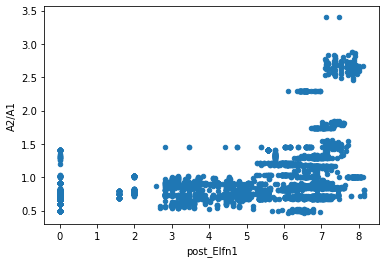

In [0]:
#gene_ppr = pd.concat([ge_data.loc[:,'post_Elfn1'],ge_data.loc[:,'A2/A1']])
ge_data.plot.scatter('post_Elfn1','A2/A1')

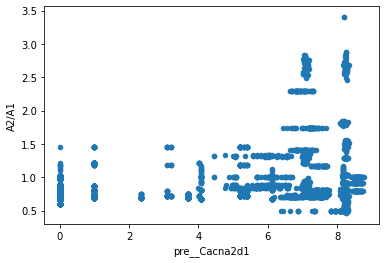

In [0]:
ge_data.plot.scatter('pre__Cacna2d1','A2/A1')

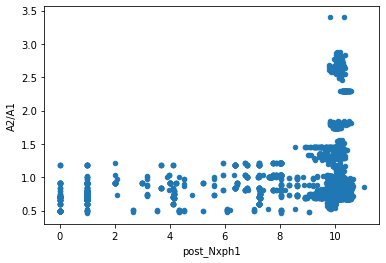

In [0]:
ge_data.plot.scatter('post_Nxph1','A2/A1')

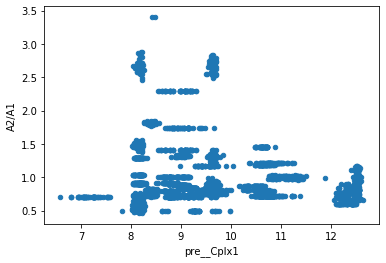

In [0]:
ge_data.plot.scatter('pre__Cplx1','A2/A1')

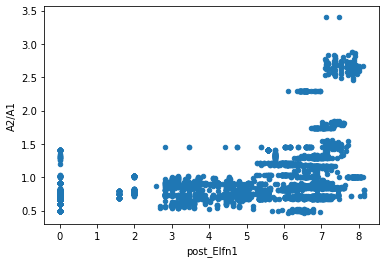

In [0]:
ge_data.plot.scatter('post_Elfn1','A2/A1')

Elfn1 	0.225558 	post
Nxph1 	0.045825 	post
Cplx1 	0.042226 	pre
Cacna2d1 	0.023623 	pre
Cbln4 	0.018438 	post
Kalrn 	0.017642 	pre
Cbln2 	0.015680 	pre
Syt17 	0.014470 	pre
Rasgrf2 	0.013842 	pre
Tiam2 	0.010330 	pre
Nrxn1 	0.010098 	post
Nrxn2 	0.008667 	post
Nrxn3 	0.008164 	pre
Sgcd 	0.007992 	pre
Kit 	0.007556 	pre
Robo1 	0.007413 	post
Unc5d 	0.007304 	pre
Grm3 	0.006854 	pre
Robo2 	0.006674 	post
Nrxn1 	0.006523 	pre
Cacnb4 	0.006468 	pre
Grm1 	0.006420 	pre
Chl1 	0.006267 	post
Jam3 	0.006135 	post
Hpcal4 	0.006017 	pre
Cntnap2 	0.005822 	pre
Syt13 	0.005820 	pre
Nrcam 	0.005731 	post
Sytl2 	0.005707 	pre
Cntn4 	0.005660 	post
Sgcb 	0.005584 	post
Dscam 	0.005553 	pre
Cplx2 	0.005211 	pre
Cttnbp2 	0.005072 	post
Slit3 	0.005062 	pre
Chrna4 	0.004933 	pre
Calm1 	0.004861 	pre
Nlgn2 	0.004850 	post
Icam5 	0.004844 	pre
Kit 	0.004776 	post
Cntn1 	0.004706 	post

####### check td stp=0

ge_data3 = ge_data.loc[:,annot_columns + stp_columns ].groupby(annot_columns).mean()
#ge_annot = ge_data.loc[:,annot_columns].copy()

ge_data2 = ge_data.set_index(annot_columns).copy()
for i in ge_data3.index:   
    if len(stp_columns)==1:
        ge_data2.loc[i,stp_columns] = ge_data3.loc[i,stp_columns].values[0]
    else:
        ge_data2.loc[i,stp_columns] = ge_data3.loc[i,stp_columns].values

ge_data.loc[ge_data2.loc[:,'index'],stp_columns] = ge_data2.loc[:,stp_columns]
#ge_data = pd.concat([ge_annot, ge_data],axis=1)
#ge_data=ge_data.set_index('index',drop=True)                        

ge_data3 = ge_data.loc[:,annot_columns + stp_columns ].groupby(annot_columns).std()
print('averagig stp? : do_averaging_stp = '+str(do_averagig_stp ))
print('std of stp :')
ge_data3

###########STP check:

#ge_data.columns[0:7]
ge_data5 =ge_data.loc[ge_data.loc[:,'layer_pre'].isin(['L2/3'])&ge_data.loc[:,'cell_type2_pre'].isin(['PC'])&ge_data.loc[:,'cell_type2_post'].isin(['BC']),:]
print(stp_ns) 
print(stp_columns1)
print(stp_columns)
ge_data5 =ge_data5.loc[ge_data5.index[0:2],annot_columns+stp_columns1]
ge_data5.loc[ge_data5.index[0] ,stp_columns1] = [1,0.3406068913,867.237442171,1.7054870385,1]

ge_data5


# transform labels from TM to An:A1
f = 20 # Hz
N = 3
T = np.arange(N)*1000/f

As, ns, ps, dpp0, p0, tF, tD, A = STP_sim(ge_data5,T)

print('As')
print(As/np.tile(As[:,0],(N,1)).T)
print('ns')
print(ns)
print('ps')
print(ps)
print('tF')
print(tF)
print('p0')
print(p0)
print('tD')
print(tD)
print('dpp0')
print(dpp0)
print('A')
print(A)

As =  As[:,1:]/np.tile(As[:,0],(N-1,1)).T

stp_columns2 = ['A'+str(s)+'/A1' for s in range(2,N+1)]
stp_data2 = pd.DataFrame(As,columns = stp_columns2, index = ge_data5.index)

ge_data3 = pd.concat([ge_data5.loc[:,annot_columns], stp_data2 ],axis=1)


ge_data4 = ge_data3.loc[:,annot_columns + stp_columns2].groupby(annot_columns).mean()
f,ax = plt.subplots(figsize=(5, 5))
ge_data4.T.plot(ax=ax)
plt.gca().legend('')
#plt.gca().title('An:A1 before filtering data')
ax.title.set_text('An:A1 before filtering data')
print('nmber of synapse types : '+str(len(ge_data4.index)))
ge_data4

##  train RF 

In [0]:
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

from sklearn.model_selection import train_test_split


# select datasets for training and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) 

#X, y = make_regression(n_features=4, n_informative=2,
#                        random_state=0, shuffle=False)

import time
t1 = time.time()

#regr = RandomForestRegressor(max_depth=15, random_state=0,
#                            n_estimators=100)
regr = RandomForestRegressor(random_state=2026,
                            n_estimators=500, oob_score=True, n_jobs=-1)
#regr.fit(X_train[:,6:], y_train[:,0:].ravel())  
regr.fit(X_train[:,nannot:], y_train[:,nannot:])  
# RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
#           max_features='auto', max_leaf_nodes=None,
#           min_impurity_decrease=0.0, min_impurity_split=None,
#           min_samples_leaf=1, min_samples_split=2,
#           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
#           oob_score=False, random_state=0, verbose=0, warm_start=False)
t2 = time.time()
#print(regr.feature_importances_)
print('Elapsed time: '+str(t2-t1))
#print(regr.predict([[0, 0, 0, 0]]))
y_pred = regr.predict(X_test[:,nannot:]) 
print('out of bag R^2: '+str(regr.oob_score_))


Elapsed time: 23.024779081344604
out of bag R^2: 0.6955005299121921


In [0]:
#annot_columns +stpn_test +stpn_pred
for i in range(y_test.shape[0]):
    if type(y_test[i,2])!=str: 
        y_test[i,2] = y_test[i,2][0] 
    if type(y_test[i,3])!=str:     
        y_test[i,3] = y_test[i,3][0]

## Linear regression model

Elapsed time: 0.2026534080505371


/home/stepaniu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)


([<matplotlib.axis.XTick at 0x7fb807a80810>,
 <a list of 66 Text xticklabel objects>)

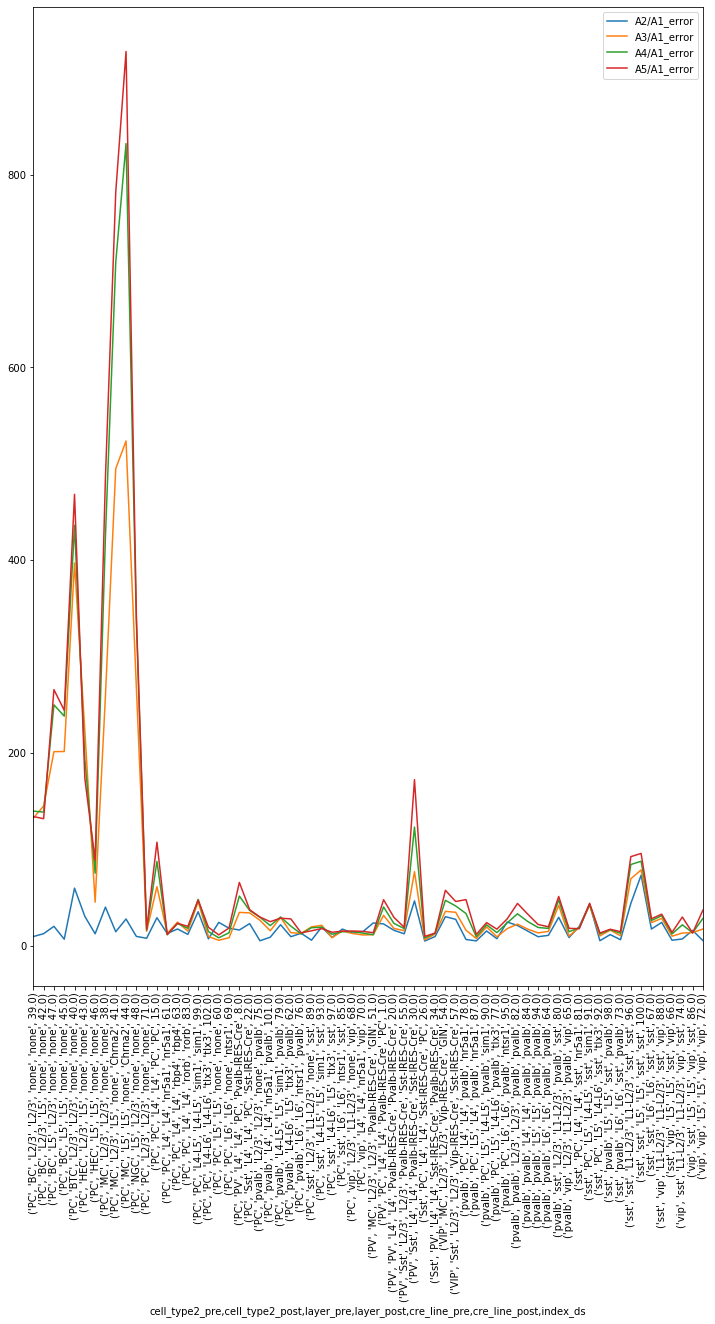

In [0]:
import matplotlib.pyplot as plt

# Linear regression

t1 = time.time()

#regr = RandomForestRegressor(max_depth=15, random_state=0,
#                            n_estimators=100)
#regr = RandomForestRegressor(random_state=2026,
#                            n_estimators=500)

from sklearn import linear_model
regr2 = linear_model.Lasso(alpha=0.01)
regr2.fit(X_train[:,nannot:], y_train[:,nannot:])  
#Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
#   normalize=False, positive=False, precompute=False, random_state=None,
#   selection='cyclic', tol=0.0001, warm_start=False)


#regr.fit(X_train[:,6:], y_train[:,0:].ravel())  
#regr.fit(X_train[:,nannot:], y_train[:,nannot:])  
# RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
#           max_features='auto', max_leaf_nodes=None,
#           min_impurity_decrease=0.0, min_impurity_split=None,
#           min_samples_leaf=1, min_samples_split=2,
#           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
#           oob_score=False, random_state=0, verbose=0, warm_start=False)
t2 = time.time()
#print(regr.feature_importances_)
print('Elapsed time: '+str(t2-t1))
#print(regr.predict([[0, 0, 0, 0]]))

# some analysis of results
y_predl = regr2.predict(X_test[:,nannot:])  
if len(y_predl.shape)==1:
    y_predl=y_predl.reshape((len(y_predl),1))
    
yyl = np.concatenate((y_test, y_predl),axis=1)
stpn_test=[s+'_test' for s in stp_columns]
stpn_pred=[s+'_pred' for s in stp_columns]
yyl = pd.DataFrame(yyl,columns=annot_columns +stpn_test +stpn_pred)




# make input and output stp labels dataset with errors
stpn_error = [s+'_error' for s in stp_columns]
yel = pd.DataFrame(yyl.loc[:,stpn_pred].values - yyl.loc[:,stpn_test].values, columns=stpn_error)
yyl = pd.concat([yyl, yel.abs()], axis=1)

#yy.set_index(['pre','post']).groupby()
#yy.set_index(['pre','post']).groupby(['pre','post']).mean()

# plot errors
annot_columns2 = annot_columns

fig, ax = plt.subplots(figsize=(12, 18))

yy1l=yyl.set_index(annot_columns2)
yy1l.loc[:,stpn_error]=yy1l.loc[:,stpn_error].values/(yy1l.loc[:,stpn_test].values+1e-15)*100
yy1l=yy1l.astype(float).groupby(annot_columns2).mean()
yy1l.loc[:,stpn_error].plot(ax=ax)
plt.xticks(np.arange(len(yy1l.index)), yy1l.index, rotation=90)
    


In [0]:
yyl

cell_type2_pre cell_type2_post layer_pre layer_post    cre_line_pre  \
0               PV             Sst      L2/3       L2/3  Pvalb-IRES-Cre   
1              sst             vip        L5         L5             sst   
2               PC              BC        L5       L2/3            none   
3               PC             Sst        L4         L4              PC   
4              vip             sst        L5         L5             vip   
..             ...             ...       ...        ...             ...   
985             PC              MC      L2/3         L5            none   
986          pvalb              PC        L5      L4-L5           pvalb   
987          pvalb           pvalb        L4         L4           pvalb   
988             PC           pvalb        L4         L4           nr5a1   
989            sst             vip   L1-L2/3    L1-L2/3             sst   

    cre_line_post index_ds A2/A1_test A3/A1_test A4/A1_test A5/A1_test  \
0    Sst-IRES-Cre       55    1.11765    1.18562    1.23484     1.2772   
1             vip       66     1.1823    1.35817    1.52371    1.67882   
2            none       47   0.841566   0.748075   0.696121   0.668116   
3    Sst-IRES-Cre       22    1.81593    2.48924    3.04486    3.50336   
4             sst       86    0.83303    0.77139   0.748635   0.740234   
..            ...      ...        ...        ...        ...        ...   
985        Chrna2       41    1.50744    0.38765   0.259313   0.250868   
986          sim1       90   0.684406   0.554493   0.501016   0.479002   
987         pvalb       84   0.757622   0.654948   0.611455   0.593031   
988         pvalb      101   0.802365   0.746564    0.70859   0.684191   
989           vip       88    1.21075    1.33469    1.39455    1.41295   

    A2/A1_pred A3/A1_pred A4/A1_pred A5/A1_pred A2/A1_error A3/A1_error  \
0     0.922251   0.813375   0.810806   0.826982    0.195396    0.372249   
1      1.13474    1.06303    1.10208    1.17597   0.0475573    0.295148   
2      1.08699   0.840349   0.820716    0.81096    0.245428   0.0922739   
3       1.3706    1.63198    1.91506    2.15827    0.445324    0.857256   
4       1.0058   0.883784   0.830148   0.795841     0.17277    0.112394   
..         ...        ...        ...        ...         ...         ...   
985    1.70504    1.22237    1.27566     1.3699    0.197596    0.834723   
986   0.824264   0.717276   0.703689   0.719404    0.139858    0.162783   
987   0.716788    0.52315   0.440854   0.389309   0.0408336    0.131799   
988    0.88053   0.890019     0.8705   0.842688   0.0781654    0.143455   
989   0.907284    0.99532    1.01882   0.996514    0.303462    0.339369   

    A4/A1_error A5/A1_error  
0      0.424039    0.450219  
1      0.421636    0.502849  
2      0.124595    0.142844  
3        1.1298     1.34509  
4      0.081513   0.0556063  
..          ...         ...  
985     1.01635     1.11903  
986    0.202673    0.240402  
987    0.170601    0.203722  
988    0.161909    0.158497  
989    0.375734    0.416437  

[990 rows x 19 columns]

## plot test vs train STP data

1. plot all parameters
2. additional cross validation? - better estimate of generalization error?
3. check dependence on rf parameters
4. dependence on % of training data
5. lists of most significant genes
6. check gs assignment - plot some figures
7. project on hipp-ds -> predict stp, compare
8. an:a1 vs TM-par
## 
## new (sep 2019):
9. compare with linear fit
10. iRFcompare small gs predictions
11. compare with factors predicting neuron types, predict n-types using small ds
12. R^2
13. compare with list of STP molecular factors
14. relative errors
15. some graphs for particular factors?
16. iRF




In [0]:
print(X_train.shape)
print(y_train.shape)
y_test.shape

(2970, 300)
(2970, 11)


(990, 11)

Mean Absolute Error: 0.1569869869682
Mean Squared Error: 0.21954740189496552
Root Mean Squared Error: 0.4685588563830221


/home/stepaniu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)


([<matplotlib.axis.XTick at 0x7fb7db874390>,
 <a list of 66 Text xticklabel objects>)

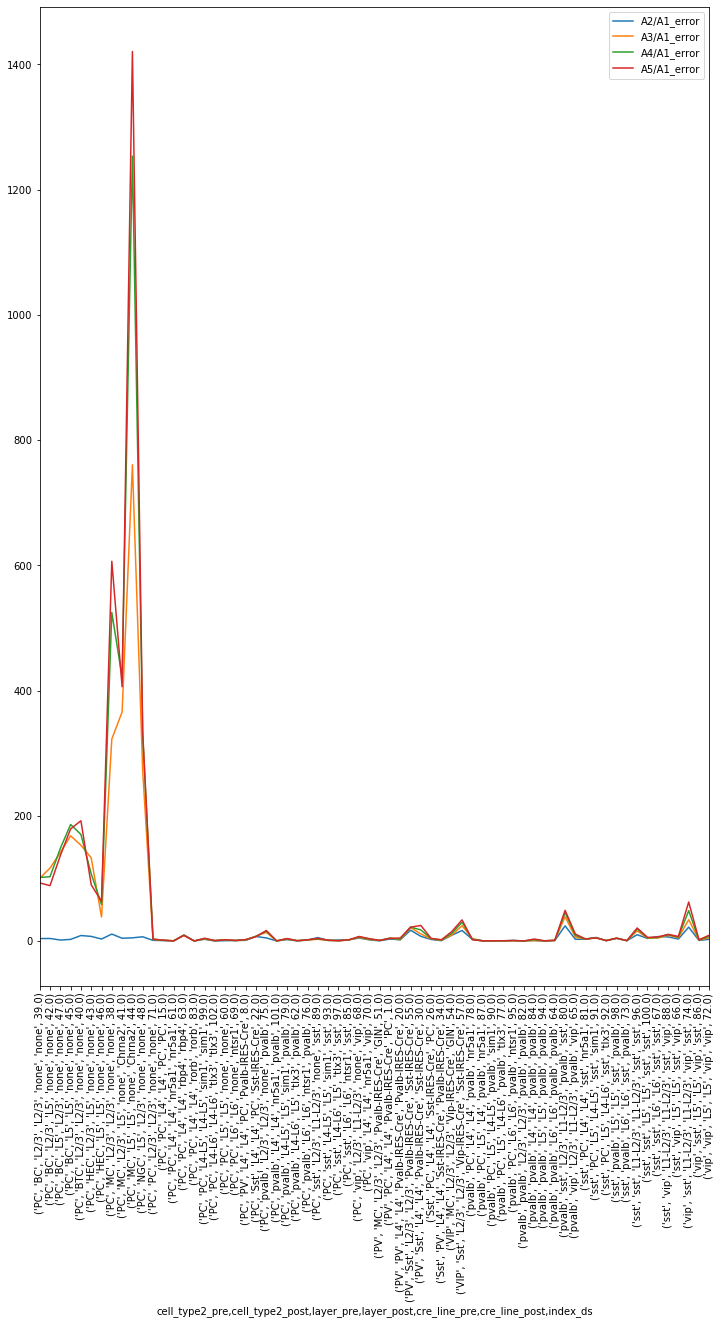

In [0]:
# RF case
y_pred = regr.predict(X_test[:,nannot:]) 
if len(y_pred.shape)==1:
    y_pred=y_pred.reshape((len(y_pred),1))





from sklearn import metrics

#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test[:,2:].ravel(), y_pred))  
#print('Mean Squared Error:', metrics.mean_squared_error(y_test[:,2:].ravel(), y_pred))  
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test[:,2:].ravel(), y_pred))) 

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test[:,nannot:], y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test[:,nannot:], y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test[:,nannot:], y_pred))) 


#y_pred2 = y_pred.reshape((len(y_pred),nstp))
yy = np.concatenate((y_test, y_pred),axis=1)
stpn_test=[s+'_test' for s in stp_columns]
stpn_pred=[s+'_pred' for s in stp_columns]
yy = pd.DataFrame(yy,columns=annot_columns +stpn_test +stpn_pred)




# make input and output stp labels dataset with errors
stpn_error = [s+'_error' for s in stp_columns]
ye = pd.DataFrame(yy.loc[:,stpn_pred].values - yy.loc[:,stpn_test].values, columns=stpn_error)
yy = pd.concat([yy, ye.abs()], axis=1)

#yy.set_index(['pre','post']).groupby()
#yy.set_index(['pre','post']).groupby(['pre','post']).mean()

# plot errors
annot_columns2 = annot_columns

fig, ax = plt.subplots(figsize=(12, 18))

yy1=yy.set_index(annot_columns2)
yy1.loc[:,stpn_error]=yy1.loc[:,stpn_error].values/(yy1.loc[:,stpn_test].values+1e-15)*100
yy1=yy1.astype(float).groupby(annot_columns2).mean()
yy1.loc[:,stpn_error].plot(ax=ax)
plt.xticks(np.arange(len(yy1.index)), yy1.index, rotation=90)


In [0]:
yy.to_excel('all_tested_rf_280gs_with_PPR.xlsx')
yy.head()

cell_type2_pre cell_type2_post layer_pre layer_post    cre_line_pre  \
0             PV             Sst      L2/3       L2/3  Pvalb-IRES-Cre   
1            sst             vip        L5         L5             sst   
2             PC              BC        L5       L2/3            none   
3             PC             Sst        L4         L4              PC   
4            vip             sst        L5         L5             vip   

  cre_line_post index_ds A2/A1_test A3/A1_test A4/A1_test A5/A1_test  \
0  Sst-IRES-Cre       55    1.11765    1.18562    1.23484     1.2772   
1           vip       66     1.1823    1.35817    1.52371    1.67882   
2          none       47   0.841566   0.748075   0.696121   0.668116   
3  Sst-IRES-Cre       22    1.81593    2.48924    3.04486    3.50336   
4           sst       86    0.83303    0.77139   0.748635   0.740234   

  A2/A1_pred A3/A1_pred A4/A1_pred A5/A1_pred  A2/A1_error A3/A1_error  \
0   0.838141   0.786116   0.771399   0.770249     0.279506    0.399508   
1    1.12266    1.23908     1.3652     1.4846    0.0596351    0.119099   
2   0.841949   0.550519   0.484942      0.447  0.000382669    0.197556   
3    1.82352     2.4527    2.98745    3.42928   0.00759881    0.036535   
4   0.838566   0.781087   0.760901   0.754525   0.00553552  0.00969683   

  A4/A1_error A5/A1_error  
0    0.463445    0.506952  
1    0.158511    0.194229  
2    0.211179    0.221116  
3   0.0574079   0.0740831  
4    0.012266   0.0142908

0 R^2 = 0.670179095733844
1 R^2 = 0.6166366269291004
2 R^2 = 0.6129490974501519
3 R^2 = 0.6037568703246994
mean R^2 = 0.625880422609449


A2/A1_test  \
cell_type2_pre cell_type2_post layer_pre layer_post cre_line_pre cre_line_post index_ds               
PC             BC              L2/3      L2/3       none         none          39.0        0.720504   
                                         L5         none         none          42.0        0.626883   
                               L5        L2/3       none         none          47.0        0.838398   
                                         L5         none         none          45.0        0.892363   
               BTC             L2/3      L2/3       none         none          40.0        0.502987   
...                                                                                             ...   
sst            vip             L1-L2/3   L1-L2/3    sst          vip           88.0        1.210746   
                               L5        L5         sst          vip           66.0        1.182295   
vip            sst             L1-L2/3   L1-L2/3    vip          sst           74.0        0.892438   
                               L5        L5         vip          sst           86.0        0.833030   
               vip             L5        L5         vip          vip           72.0        0.845687   

                                                                                         A3/A1_test  \
cell_type2_pre cell_type2_post layer_pre layer_post cre_line_pre cre_line_post index_ds               
PC             BC              L2/3      L2/3       none         none          39.0        0.414870   
                                         L5         none         none          42.0        0.314824   
                               L5        L2/3       none         none          47.0        0.519751   
                                         L5         none         none          45.0        0.594027   
               BTC             L2/3      L2/3       none         none          40.0        0.242331   
...                                                                                             ...   
sst            vip             L1-L2/3   L1-L2/3    sst          vip           88.0        1.334690   
                               L5        L5         sst          vip           66.0        1.358175   
vip            sst             L1-L2/3   L1-L2/3    vip          sst           74.0        0.913305   
                               L5        L5         vip          sst           86.0        0.771390   
               vip             L5        L5         vip          vip           72.0        0.759048   

                                                                                         A4/A1_test  \
cell_type2_pre cell_type2_post layer_pre layer_post cre_line_pre cre_line_post index_ds               
PC             BC              L2/3      L2/3       none         none          39.0        0.333821   
                                         L5         none         none          42.0        0.233244   
                               L5        L2/3       none         none          47.0        0.459449   
                                         L5         none         none          45.0        0.552514   
               BTC             L2/3      L2/3       none         none          40.0        0.200175   
...                                                                                             ...   
sst            vip             L1-L2/3   L1-L2/3    sst          vip           88.0        1.394555   
                               L5        L5         sst          vip           66.0        1.523712   
vip            sst             L1-L2/3   L1-L2/3    vip          sst           74.0        0.909257   
                               L5        L5         vip          sst           86.0        0.748635   
               vip             L5        L5         vip          vip           72.0        0.710404   

                                                                     

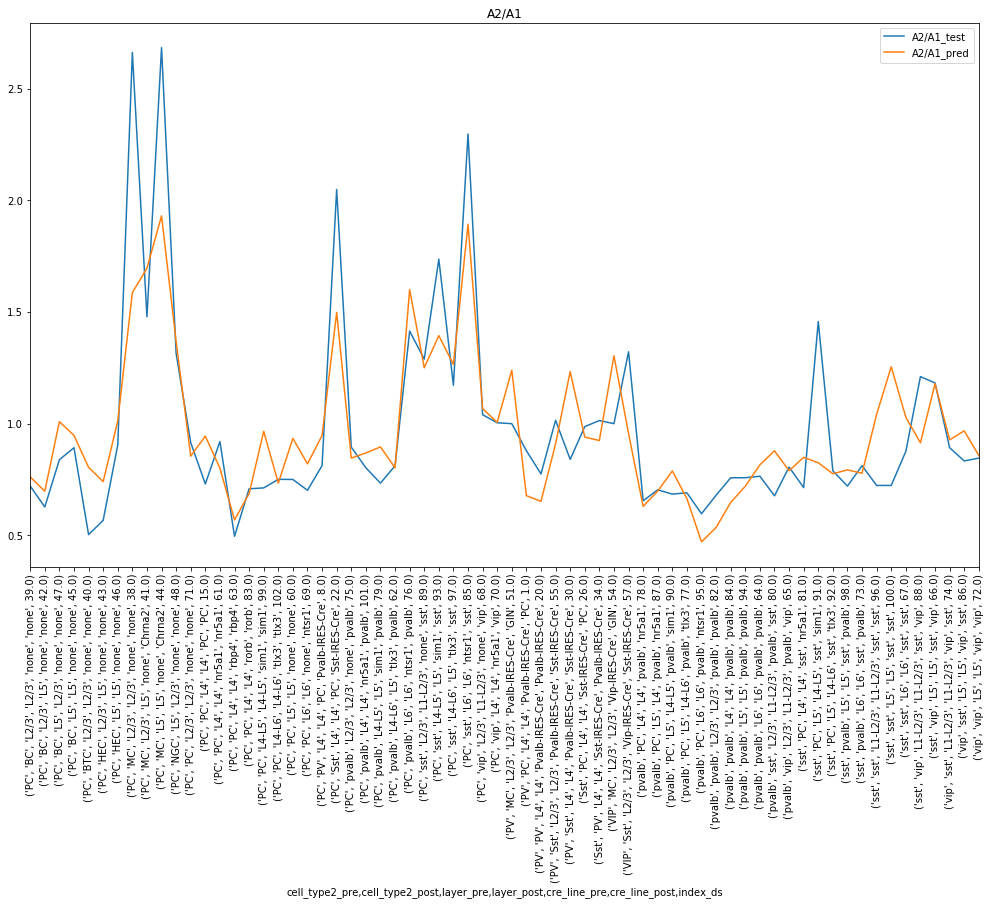

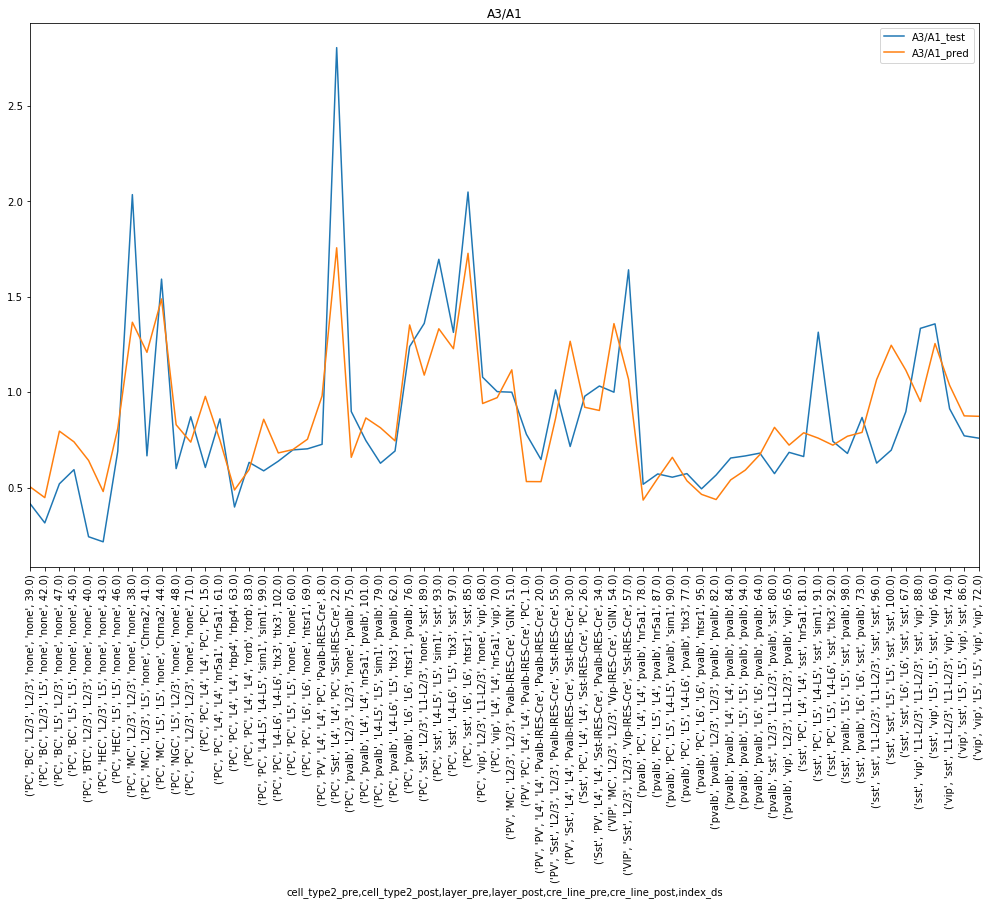

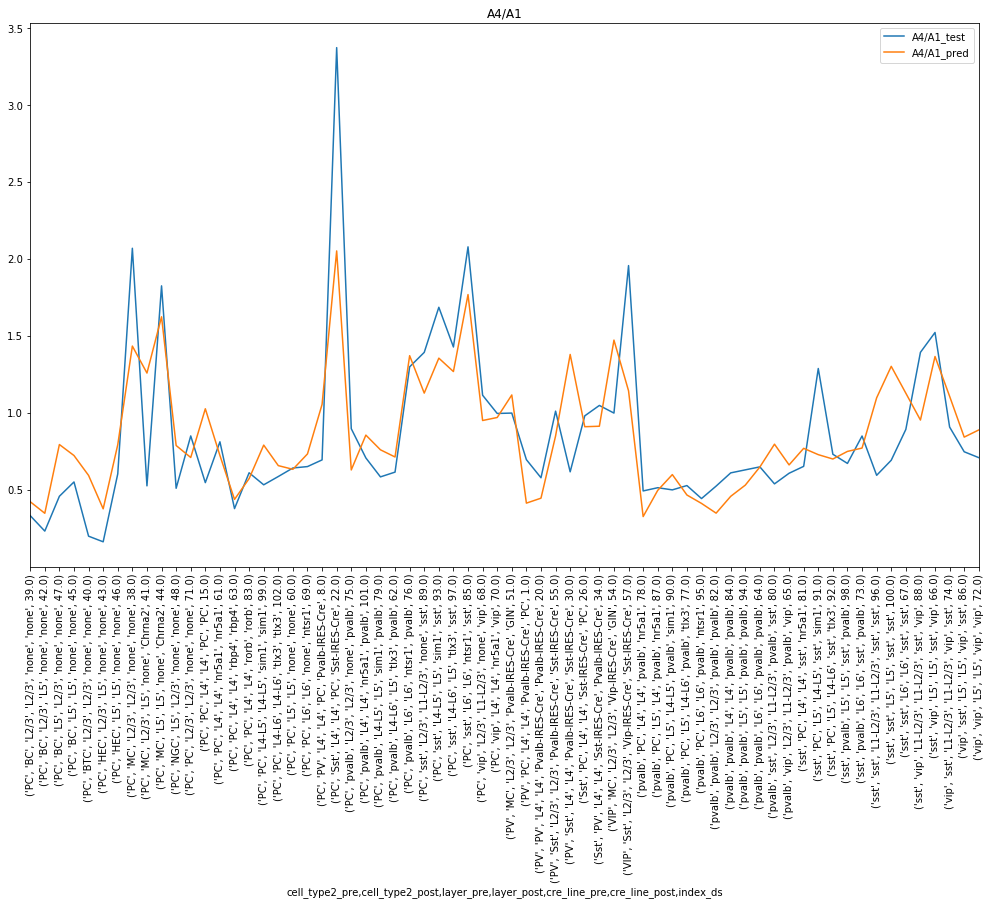

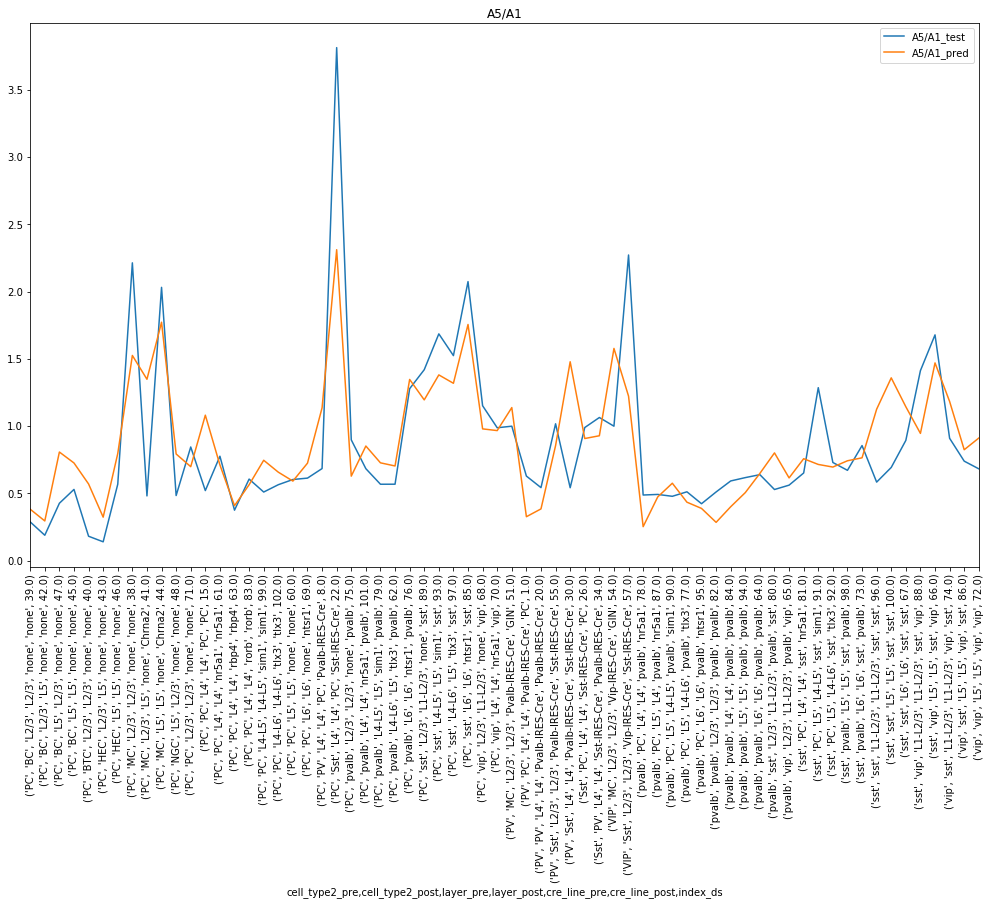

In [0]:
# Linear model case

#plot predicted and real (test) stp data
#plt.figure()
yy1l=yyl.set_index(annot_columns2)
#yy1=yy1.loc[:,stpn_test+stpn_pred] #/yy1.loc[:,'test']*100
yy1l=yy1l.astype(float).groupby(annot_columns2).mean()

r3=[]
for i in range(nstp):
    f, ax =plt.subplots(figsize=(17, 10))
    #f, ax = plt.figure()
    #ax = f.add_axes()
    #plt.title(stp_columns[i])
    ax.set_title(stp_columns[i])
    yy1l.loc[:,[stpn_test[i],stpn_pred[i]]].plot(ax=ax)
    plt.xticks(np.arange(len(yy1l.index)), yy1l.index, rotation=90)
    if i==0:
        istr=0
    else:
        istr=0 #11 - if ppr included
    
    ytest= yy1l.loc[:,stpn_test[i]]  
    ypred=yy1l.loc[:,stpn_pred[i]]
    r2=1 - (ytest.iloc[istr:] - ypred.iloc[istr:]).pow(2).mean()/ytest.iloc[istr:].var()
    print(str(i) +' R^2 = '+str(r2))
    r3 = r3 + [r2]

print('mean R^2 = '+str(np.array(r3).mean()))
#print(yy1.mean())
yy1l.loc[:,stpn_test +stpn_pred]

0.20082383310823926
0.0059885162164025505
0 R^2 = 0.9701802513988722
0.17782809214625417
0.010513493625231051
1 R^2 = 0.9408783308737054
0.257293036964008
0.017080005683967416
2 R^2 = 0.9336165257890104
0.3300464275561233
0.024696938181107637
3 R^2 = 0.9251713210048061
mean R^2 = 0.9424616072665986


A2/A1_test  \
cell_type2_pre cell_type2_post layer_pre layer_post cre_line_pre cre_line_post index_ds               
PC             BC              L2/3      L2/3       none         none          39.0        0.720504   
                                         L5         none         none          42.0        0.626883   
                               L5        L2/3       none         none          47.0        0.838398   
                                         L5         none         none          45.0        0.892363   
               BTC             L2/3      L2/3       none         none          40.0        0.502987   
...                                                                                             ...   
sst            vip             L1-L2/3   L1-L2/3    sst          vip           88.0        1.210746   
                               L5        L5         sst          vip           66.0        1.182295   
vip            sst             L1-L2/3   L1-L2/3    vip          sst           74.0        0.892438   
                               L5        L5         vip          sst           86.0        0.833030   
               vip             L5        L5         vip          vip           72.0        0.845687   

                                                                                         A3/A1_test  \
cell_type2_pre cell_type2_post layer_pre layer_post cre_line_pre cre_line_post index_ds               
PC             BC              L2/3      L2/3       none         none          39.0        0.414870   
                                         L5         none         none          42.0        0.314824   
                               L5        L2/3       none         none          47.0        0.519751   
                                         L5         none         none          45.0        0.594027   
               BTC             L2/3      L2/3       none         none          40.0        0.242331   
...                                                                                             ...   
sst            vip             L1-L2/3   L1-L2/3    sst          vip           88.0        1.334690   
                               L5        L5         sst          vip           66.0        1.358175   
vip            sst             L1-L2/3   L1-L2/3    vip          sst           74.0        0.913305   
                               L5        L5         vip          sst           86.0        0.771390   
               vip             L5        L5         vip          vip           72.0        0.759048   

                                                                                         A4/A1_test  \
cell_type2_pre cell_type2_post layer_pre layer_post cre_line_pre cre_line_post index_ds               
PC             BC              L2/3      L2/3       none         none          39.0        0.333821   
                                         L5         none         none          42.0        0.233244   
                               L5        L2/3       none         none          47.0        0.459449   
                                         L5         none         none          45.0        0.552514   
               BTC             L2/3      L2/3       none         none          40.0        0.200175   
...                                                                                             ...   
sst            vip             L1-L2/3   L1-L2/3    sst          vip           88.0        1.394555   
                               L5        L5         sst          vip           66.0        1.523712   
vip            sst             L1-L2/3   L1-L2/3    vip          sst           74.0        0.909257   
                               L5        L5         vip          sst           86.0        0.748635   
               vip             L5        L5         vip          vip           72.0        0.710404   

                                                                     

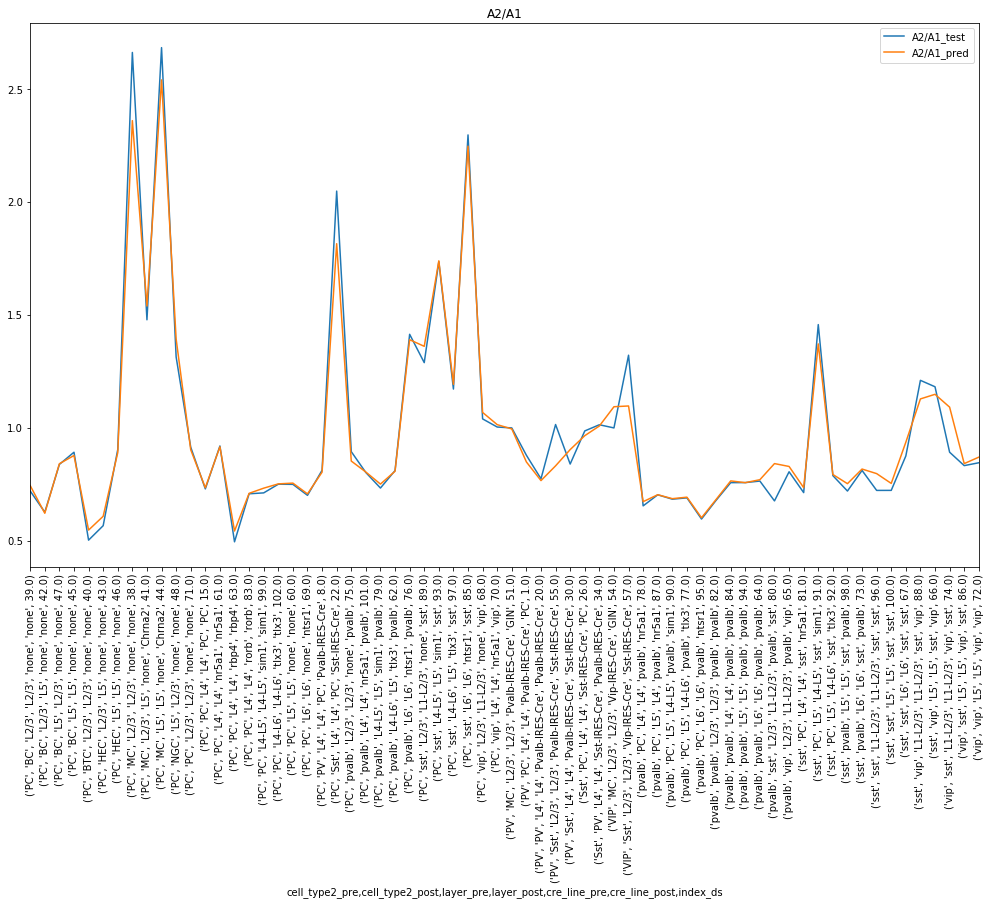

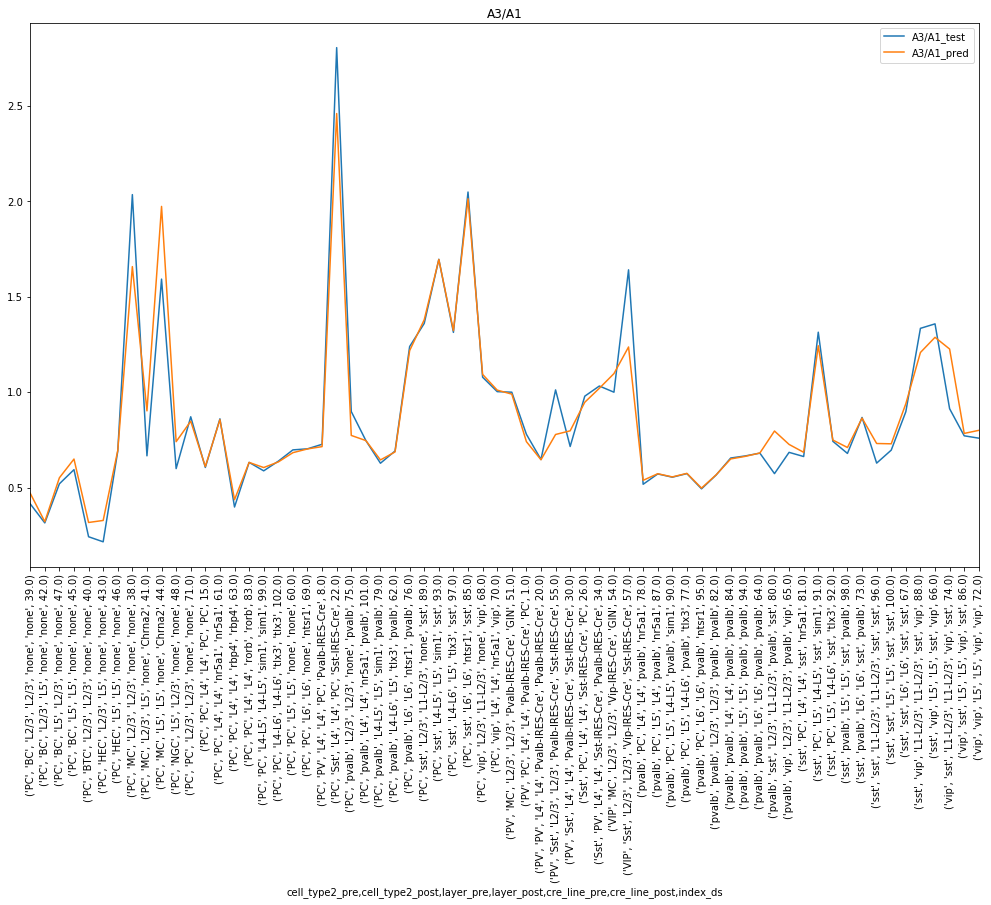

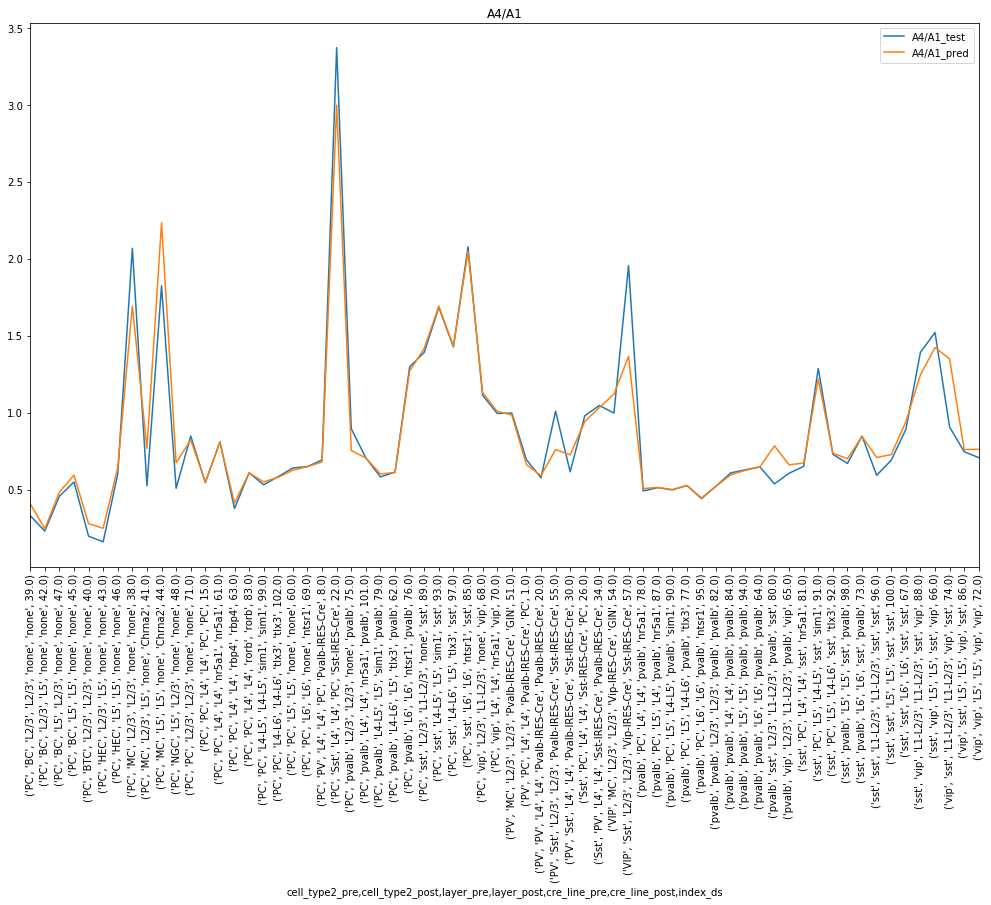

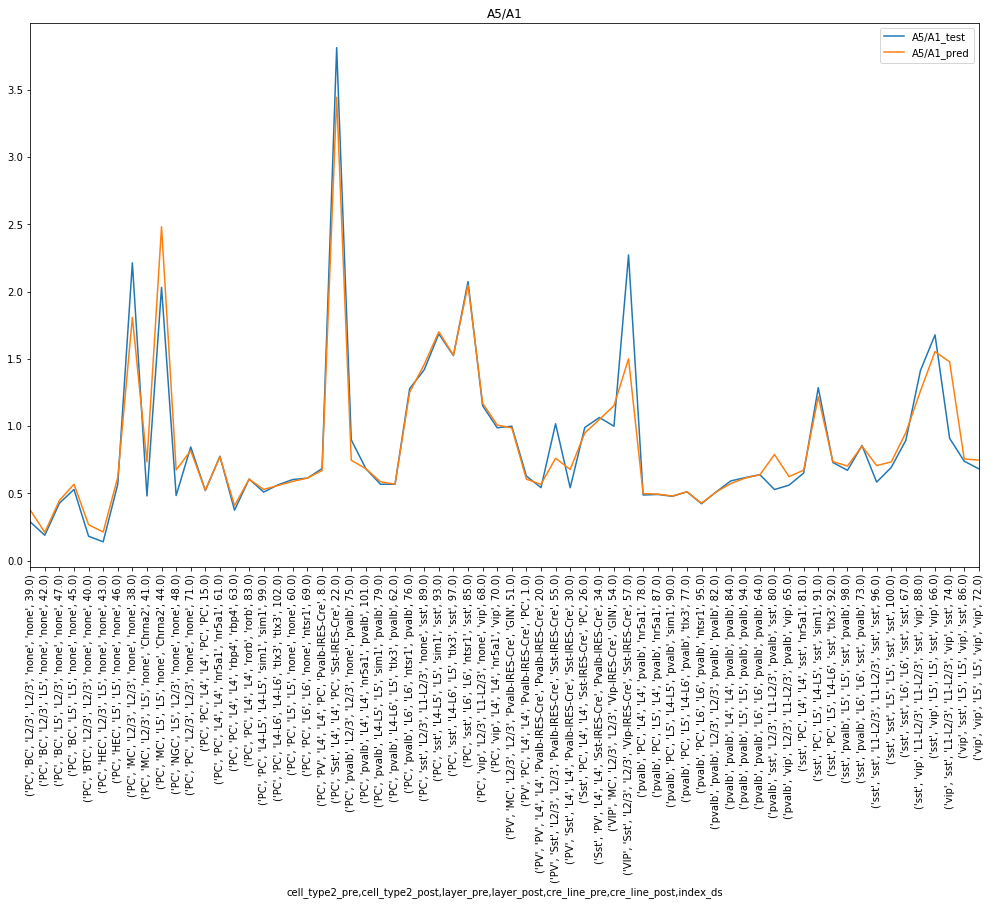

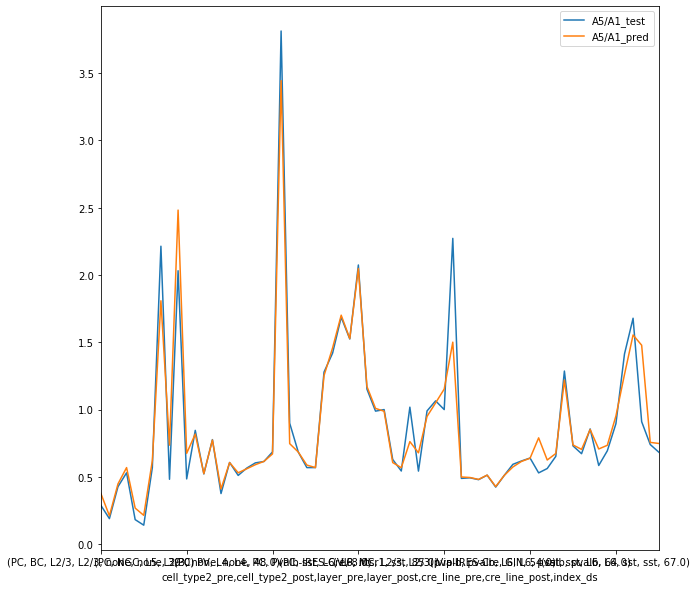

In [0]:
# RF model case

#plot predicted and real (test) stp data
#plt.figure()
yy1=yy.set_index(annot_columns2)
#yy1=yy1.loc[:,stpn_test+stpn_pred] #/yy1.loc[:,'test']*100
yy1=yy1.astype(float).groupby(annot_columns2).mean()
r3=[]
for i in range(nstp):
    f, ax =plt.subplots(figsize=(17, 10))
    #f, ax = plt.figure()
    #ax = f.add_axes()
    #plt.title(stp_columns[i])
    ax.set_title(stp_columns[i])
    yy1.loc[:,[stpn_test[i],stpn_pred[i]]].plot(ax=ax)
    plt.xticks(np.arange(len(yy1.index)), yy1.index, rotation=90)
    if i==0:
        istr=0
    else:
        istr=11 # 11 - if ppr data included
        
    ytest= yy1.loc[:,stpn_test[i]]  
    ypred=yy1.loc[:,stpn_pred[i]]
    #r2=1 - (ytest.iloc[istr:] - ypred.iloc[istr:]).pow(2).mean()/ytest.iloc[istr:].var()
    r2=1 - (ytest.iloc[istr:] - ypred.iloc[istr:]).var()/ytest.iloc[istr:].var()
    print(ytest.iloc[istr:].var())
    print((ytest.iloc[istr:] - ypred.iloc[istr:]).var())
    print(str(i) +' R^2 = '+str(r2))
    r3 = r3 + [r2]

print('mean R^2 = '+str(np.array(r3).mean()))

f, ax =plt.subplots(figsize=(10, 10))
yy1.loc[:,[stpn_test[i],stpn_pred[i]]].plot(ax=ax)

#print(yy1.mean())
yy1.loc[:,stpn_test +stpn_pred]

In [0]:
#yy1.to_excel('results_RF_10gs_without_PPR.xlsx')
yy1.to_excel('results_RF_10gs_with_PPR.xlsx')

## Look at most important genes

In [0]:
#linear model case

# set of most significant genes
 #fil = regr2.feature_importances_

#plt.plot(fi)
fil = regr2.coef_
fil = np.absolute(fil)
#fil = np.sum(fil,axis=0).transpose()
fil = fil[0,:].transpose()
fil.shape

ifi = np.nonzero(fil)[0]
fi2l = fil[ifi]
ifi2 = np.argsort(fi2l)
l=len(fi2l)
#print(np.concatenate((ifi2.reshape((l,1)),fi2[ifi2].reshape((l,1))),axis=1))

print(len(ge_columns))
print(len(ge_data.columns))
print(fil.shape)
print(ge_columns[0:6])

fi2l = pd.DataFrame(fil,columns=['importance'],index = ge_columns[6:])
fi2l = pd.concat([fi2l, pd.DataFrame(np.repeat('post',len(fi2l.index)),columns = ['compartment'],index=fi2l.index)],axis=1)
#fi2.loc[np.arange(len(fi2.index))<len(pregs),'compartment']='pre'
fi2l.loc[fi2l.index.str.contains('pre'),'compartment']='pre'

fi2l.index =  [id[5:] for id in fi2l.index ]

fi2l=fi2l.sort_values('importance',ascending=False)
best10 = fi2l.iloc[0:10,:]
best20 = fi2l.iloc[0:20,:]
best50 = fi2l.iloc[0:50,:]


## linear case
#fi2l.iloc[0:50,:] # A1:5, without averaging, 500 trees, with Yuste, 384gs

299
313
(293,)
['cell_type2_pre', 'cell_type2_post', 'layer_pre', 'layer_post', 'cre_line_pre', 'cre_line_post']


In [0]:
fi2l.iloc[0:50,:] # A1:5, without averaging, 500 trees, with Yuste, 20 best genes found from 280 gs

importance compartment
Nrxn3       0.101131        post
Rasgrf2     0.067402         pre
Ntng1       0.040114        post
Chl1        0.032554        post
Kirrel3     0.028349        post
Rgma        0.027398        post
Cntn3       0.025186        post
Icam5       0.024789        post
Cntn1       0.020623        post
Elfn1       0.019320        post
Ntn4        0.018296        post
Htr2c       0.017178         pre
Cntnap2     0.015360         pre
Slit1       0.015232        post
Robo4       0.015201         pre
Robo3       0.014090        post
Unc5b       0.013738        post
Cbln2       0.013366        post
Unc5d       0.012622        post
Jam2        0.010920         pre
Syt17       0.010649         pre
Slit2       0.010249        post
Vav2        0.010193         pre
Syt6        0.009713         pre
Nrp1        0.009264        post
Cplx2       0.009247         pre
Nxph3       0.008809        post
Drd2        0.008760         pre
Chrnb3      0.008743         pre
Cbln2       0.008365         pre
Htr1a       0.007989         pre
Jam2        0.007020        post
Cacna2d4    0.006978         pre
Arhgef19    0.006812         pre
Nrxn1       0.006675        post
Icam4       0.006636        post
Chrna2      0.006635         pre
Chrna6      0.006346         pre
Vav3        0.006195         pre
Icam1       0.005897        post
Cplx3       0.005896         pre
Nxph4       0.005868        post
Htr7        0.005709         pre
Nxph2       0.005081        post
Calb2       0.004932         pre
Kit         0.004824        post
Fgd5        0.004603         pre
Cbln1       0.004570         pre
Nrp1        0.004327         pre
Chrng       0.004263         pre

In [0]:
# linear case
fi2l.iloc[0:50,:] # A1:5, without averaging, 500 trees, with Yuste, 1691 gs


importance compartment
Plekhg3     0.001848         pre
Unc5cl      0.001575         pre
Cbln1       0.001051         pre
Drd2        0.001039         pre
Nxph3       0.000807        post
Cbln1       0.000746        post
Htr6        0.000742         pre
Ect2        0.000658         pre
Obscn       0.000619         pre
Slit3       0.000600        post
Elfn1       0.000577        post
Unc5b       0.000566         pre
Icam4       0.000544        post
Rgma        0.000543        post
Ntn1        0.000523         pre
Sdk2        0.000513         pre
Nrp1        0.000509         pre
Nxph4       0.000502        post
Chrna2      0.000501         pre
Sgcd        0.000500        post
Sdk1        0.000497         pre
Vav2        0.000473         pre
Cntn3       0.000473        post
Nxph4       0.000455         pre
Nrp1        0.000441        post
Htr4        0.000435         pre
Spata13     0.000428         pre
Kirrel      0.000415         pre
Dscaml1     0.000399        post
Ntn3        0.000389        post
Chrna4      0.000383         pre
Sdk1        0.000378        post
Robo3       0.000372        post
Slit2       0.000360        post
Dscam       0.000349        post
Ntn5        0.000342         pre
Chrnb3      0.000332         pre
Ntn1        0.000330        post
Slit3       0.000324         pre
Chrna7      0.000320         pre
Chrnb4      0.000312         pre
Fgd6        0.000305         pre
Cacna2d4    0.000298         pre
Robo1       0.000295        post
Dock1       0.000286         pre
Slit1       0.000280         pre
Cbln3       0.000278         pre
Syt9        0.000268         pre
Robo3       0.000255         pre
Unc5b       0.000252        post

In [0]:
# RF model case

# set of most significant genes
fi = regr.feature_importances_
#plt.plot(fi)

ifi = np.nonzero(fi)[0]
fi2 = fi[ifi]
ifi2 = np.argsort(fi2)
l=len(fi2)
#print(np.concatenate((ifi2.reshape((l,1)),fi2[ifi2].reshape((l,1))),axis=1))

print(len(ge_columns))
print(len(ge_data.columns))
print(fi.shape)
print(ge_columns[0:6])

fi2 = pd.DataFrame(fi,columns=['importance'],index = ge_columns[6:])
fi2 = pd.concat([fi2, pd.DataFrame(np.repeat('post',len(fi2.index)),columns = ['compartment'],index=fi2.index)],axis=1)
#fi2.loc[np.arange(len(fi2.index))<len(pregs),'compartment']='pre'
fi2.loc[fi2.index.str.contains('pre'),'compartment']='pre'

fi2.index =  [id[5:] for id in fi2.index ]

fi2=fi2.sort_values('importance',ascending=False)
best10 = fi2.iloc[0:10,:]
best20 = fi2.iloc[0:20,:]
best50 = fi2.iloc[0:50,:]

299
313
(293,)
['cell_type2_pre', 'cell_type2_post', 'layer_pre', 'layer_post', 'cre_line_pre', 'cre_line_post']


In [0]:
fi2.iloc[0:50,:]

importance compartment
Chl1       0.162985        post
Rasgrf2    0.096679         pre
Jam2       0.025384        post
Cabp1      0.022999         pre
Nrxn3      0.021969        post
Elfn1      0.018322        post
Dscam      0.017780        post
Cttn       0.016677         pre
Grm7       0.016258         pre
Chrna6     0.014423         pre
Cacnb4     0.014090         pre
Cntn4      0.012426        post
Tiam1      0.011095         pre
Nxph2      0.010903        post
Unc5b      0.010598        post
Sytl2      0.009576         pre
Rims2      0.009403         pre
Robo2      0.008788        post
Hpcal4     0.008534         pre
Cntn4      0.008401         pre
Ntn1       0.008049        post
Cntnap2    0.007866        post
Cntn1      0.007773        post
Syt7       0.007742         pre
Nrxn1      0.007686        post
Cacnb1     0.007568         pre
Cttnbp2    0.007457        post
Cntn6      0.006471        post
Nrp1       0.006272         pre
Chrnb3     0.006198         pre
Nrxn3      0.006091         pre
L1cam      0.006076        post
Cbln4      0.006033        post
Nxph1      0.005935        post
Nrcam      0.005718        post
Nlgn1      0.005463        post
Nxph3      0.005244        post
Slit3      0.005230        post
Jam3       0.005204        post
Unc5d      0.005171        post
Cntn2      0.004882        post
Cntn3      0.004650         pre
Prex1      0.004625         pre
Nxph2      0.004605         pre
Cntnap2    0.004434         pre
Sdk2       0.004222        post
Htr7       0.004041         pre
Ntn4       0.004037         pre
Slit1      0.004013        post
Syt5       0.003991         pre

In [0]:
fi2.iloc[0:50,:] # A1:5, without averaging, 500 trees, with Yuste, 10 selected from 280 gs R^2 = 0.863


importance compartment
Elfn1       0.151644        post
Nxph1       0.073416        post
Cacna2d1    0.055333         pre
Syt17       0.029404         pre
Nrxn3       0.014044        post
Cbln4       0.012183        post
Syt6        0.012034         pre
Cntn2       0.011072        post
Nrxn3       0.009267         pre
Cplx2       0.009260         pre
Calb1       0.009219         pre
Robo1       0.009038        post
Kalrn       0.008119         pre
Chl1        0.007864        post
Nrxn1       0.007731         pre
Nrxn1       0.007600        post
Cplx1       0.007497         pre
Unc13b      0.007420         pre
Cntnap2     0.006540        post
Cttnbp2     0.006338        post
Cbln1       0.006268         pre
Nrp1        0.005706         pre
Nrcam       0.005483        post
Cbln2       0.005464         pre
Cntn1       0.005370        post
Tiam2       0.005353         pre
Hpcal4      0.005310         pre
Nxph3       0.005196         pre
Cacna2d3    0.005162         pre
Kit         0.005073        post
Cacnb1      0.004987         pre
Unc5c       0.004924        post
Grm3        0.004919         pre
Cntn4       0.004775        post
Rgmb        0.004690        post
Nfasc       0.004588        post
Tiam1       0.004525         pre
Neo1        0.004500        post
Rims2       0.004488         pre
Rasgrf2     0.004487         pre
Cntn4       0.004452         pre
Cntnap4     0.004255        post
Cacnb4      0.004208         pre
Dscam       0.004197        post
Cntnap1     0.004187        post
Slit3       0.004172        post
Sgce        0.004129        post
Erc2        0.004099         pre
Dock4       0.004081         pre
Nlgn2       0.004075        post

# STOP!!!

In [0]:
fi2.to_excel('best_genes_visp.xlsx')

## test hippocampal trained RF

In [0]:
import pickle
RF_file = open('RF_290_visp.pickle', mode='wb')
pickle.dump(regr,RF_file)

In [0]:
#pickle_in = open('RF_290_hipp.pickle',"rb")
RF_file = open('RF_290_hipp.pickle', mode='rb')
regr_hipp = pickle.load(RF_file)

Mean Absolute Error: 0.757330387625347
Mean Squared Error: 1.0909216475811443
Root Mean Squared Error: 1.0444719467659935


/home/stepaniu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)


([<matplotlib.axis.XTick at 0x7fb818efef10>,
 <a list of 66 Text xticklabel objects>)

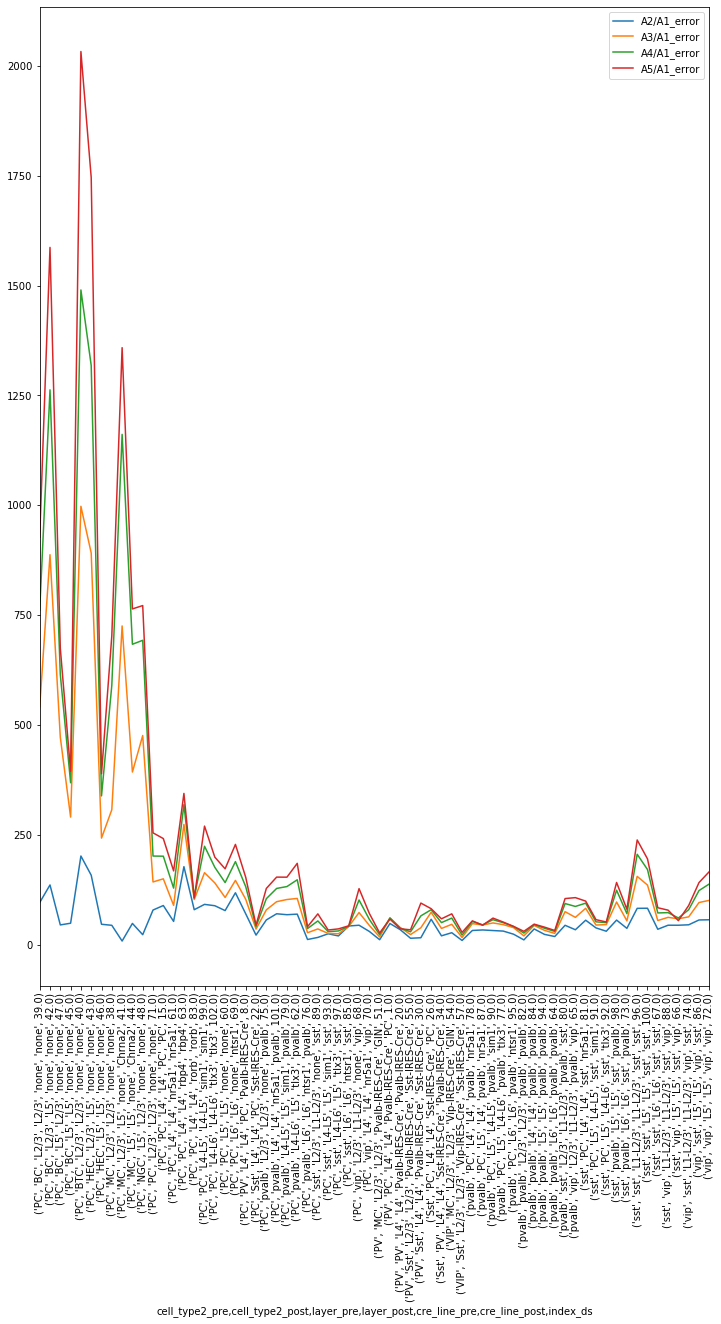

In [0]:
# RF case
y_pred = regr_hipp.predict(X_test[:,nannot:]) 
#y_pred = regr_hipp.predict(X_train[:,nannot:]) 
#y_test = y_train
if len(y_pred.shape)==1:
    y_pred=y_pred.reshape((len(y_pred),1))





from sklearn import metrics

#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test[:,2:].ravel(), y_pred))  
#print('Mean Squared Error:', metrics.mean_squared_error(y_test[:,2:].ravel(), y_pred))  
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test[:,2:].ravel(), y_pred))) 

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test[:,nannot:], y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test[:,nannot:], y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test[:,nannot:], y_pred))) 


#y_pred2 = y_pred.reshape((len(y_pred),nstp))
yy = np.concatenate((y_test, y_pred),axis=1)
stpn_test=[s+'_test' for s in stp_columns]
stpn_pred=[s+'_pred' for s in stp_columns]
yy = pd.DataFrame(yy,columns=annot_columns +stpn_test +stpn_pred)




# make input and output stp labels dataset with errors
stpn_error = [s+'_error' for s in stp_columns]
ye = pd.DataFrame(yy.loc[:,stpn_pred].values - yy.loc[:,stpn_test].values, columns=stpn_error)
yy = pd.concat([yy, ye.abs()], axis=1)

#yy.set_index(['pre','post']).groupby()
#yy.set_index(['pre','post']).groupby(['pre','post']).mean()

# plot errors
annot_columns2 = annot_columns

fig, ax = plt.subplots(figsize=(12, 18))

yy1=yy.set_index(annot_columns2)
yy1.loc[:,stpn_error]=yy1.loc[:,stpn_error].values/(yy1.loc[:,stpn_test].values+1e-15)*100
yy1=yy1.astype(float).groupby(annot_columns2).mean()
yy1.loc[:,stpn_error].plot(ax=ax)
plt.xticks(np.arange(len(yy1.index)), yy1.index, rotation=90)


0.1933244200451892
0.22580845035006555
0 R^2 = -0.16802859306280737
0.16046658089262103
0.2672890006902388
1 R^2 = -0.6656988589362407
0.23325621974430846
0.38412796191781595
2 R^2 = -0.6468069419065889
0.3028185447446219
0.4988046211709382
3 R^2 = -0.6472063215005497
mean R^2 = -0.5319351788515467


A2/A1_test  \
cell_type2_pre cell_type2_post layer_pre layer_post cre_line_pre cre_line_post index_ds               
PC             BC              L2/3      L2/3       none         none          39.0        0.721025   
                                         L5         none         none          42.0        0.623479   
                               L5        L2/3       none         none          47.0        0.848484   
                                         L5         none         none          45.0        0.884279   
               BTC             L2/3      L2/3       none         none          40.0        0.501429   
...                                                                                             ...   
sst            vip             L1-L2/3   L1-L2/3    sst          vip           88.0        1.210746   
                               L5        L5         sst          vip           66.0        1.182295   
vip            sst             L1-L2/3   L1-L2/3    vip          sst           74.0        0.892438   
                               L5        L5         vip          sst           86.0        0.833030   
               vip             L5        L5         vip          vip           72.0        0.845687   

                                                                                         A3/A1_test  \
cell_type2_pre cell_type2_post layer_pre layer_post cre_line_pre cre_line_post index_ds               
PC             BC              L2/3      L2/3       none         none          39.0        0.439856   
                                         L5         none         none          42.0        0.294644   
                               L5        L2/3       none         none          47.0        0.494705   
                                         L5         none         none          45.0        0.613940   
               BTC             L2/3      L2/3       none         none          40.0        0.311770   
...                                                                                             ...   
sst            vip             L1-L2/3   L1-L2/3    sst          vip           88.0        1.334690   
                               L5        L5         sst          vip           66.0        1.358175   
vip            sst             L1-L2/3   L1-L2/3    vip          sst           74.0        0.913305   
                               L5        L5         vip          sst           86.0        0.771390   
               vip             L5        L5         vip          vip           72.0        0.759048   

                                                                                         A4/A1_test  \
cell_type2_pre cell_type2_post layer_pre layer_post cre_line_pre cre_line_post index_ds               
PC             BC              L2/3      L2/3       none         none          39.0        0.359306   
                                         L5         none         none          42.0        0.216690   
                               L5        L2/3       none         none          47.0        0.434495   
                                         L5         none         none          45.0        0.561518   
               BTC             L2/3      L2/3       none         none          40.0        0.269683   
...                                                                                             ...   
sst            vip             L1-L2/3   L1-L2/3    sst          vip           88.0        1.394555   
                               L5        L5         sst          vip           66.0        1.523712   
vip            sst             L1-L2/3   L1-L2/3    vip          sst           74.0        0.909257   
                               L5        L5         vip          sst           86.0        0.748635   
               vip             L5        L5         vip          vip           72.0        0.710404   

                                                                     

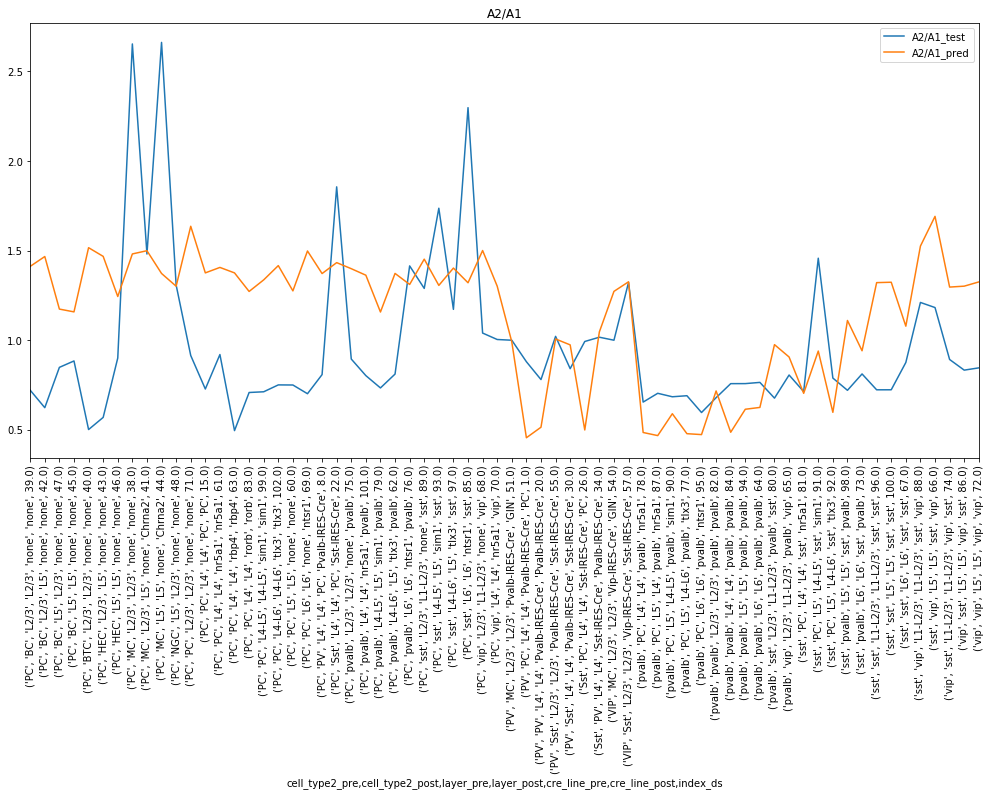

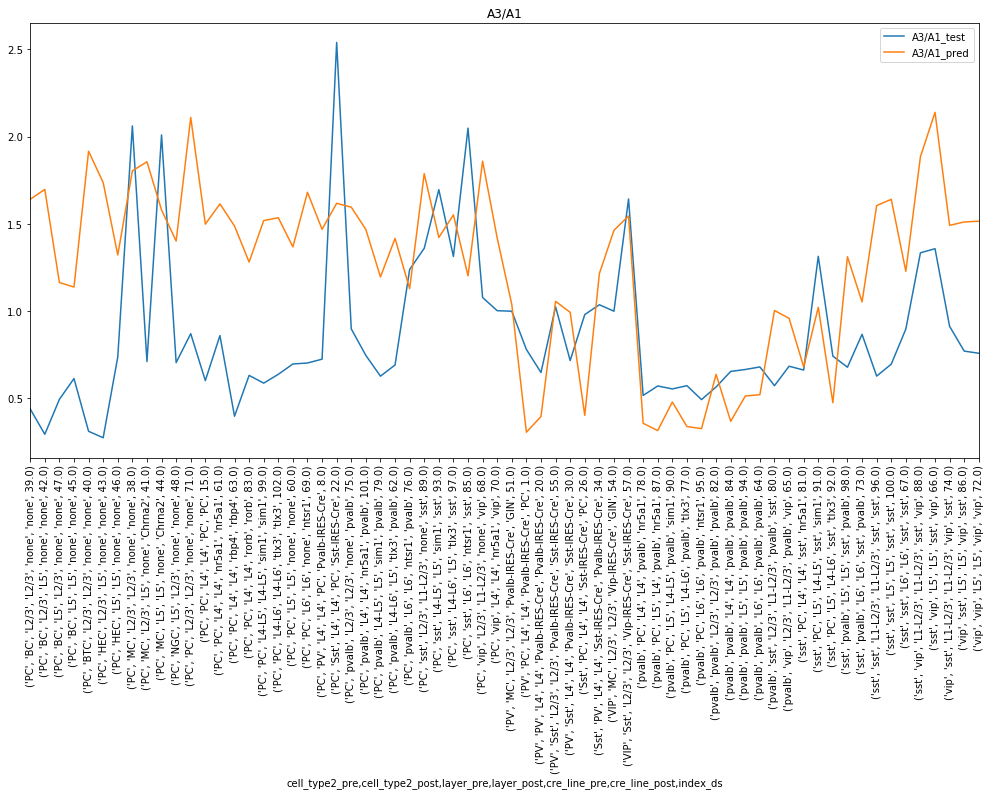

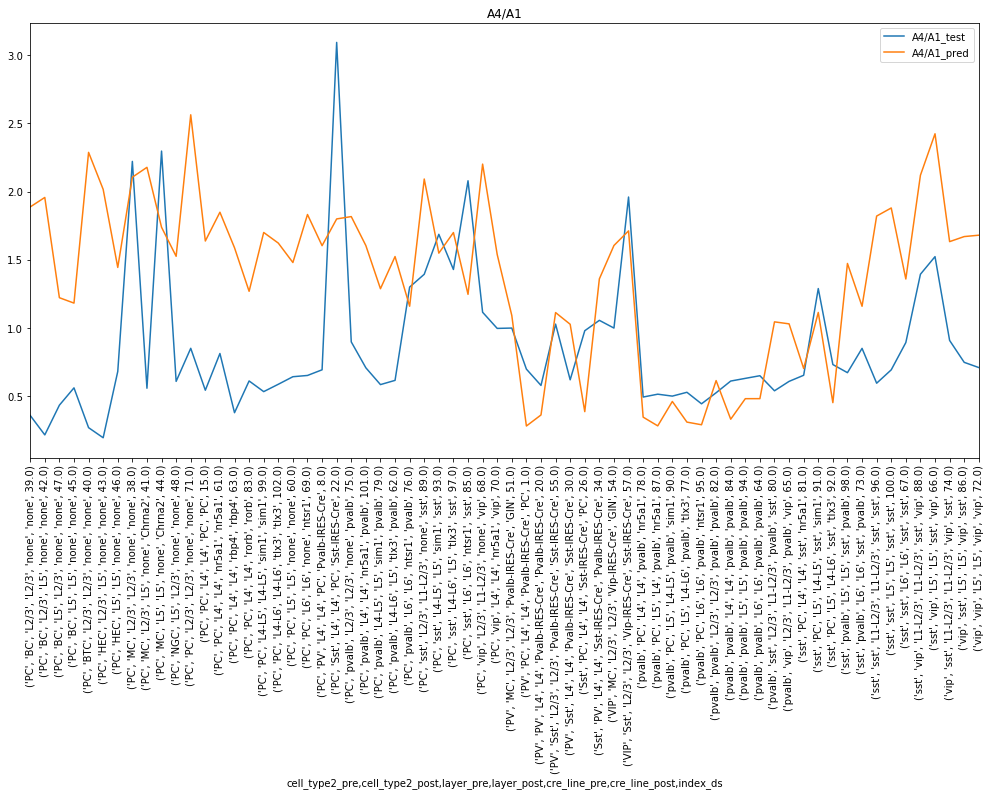

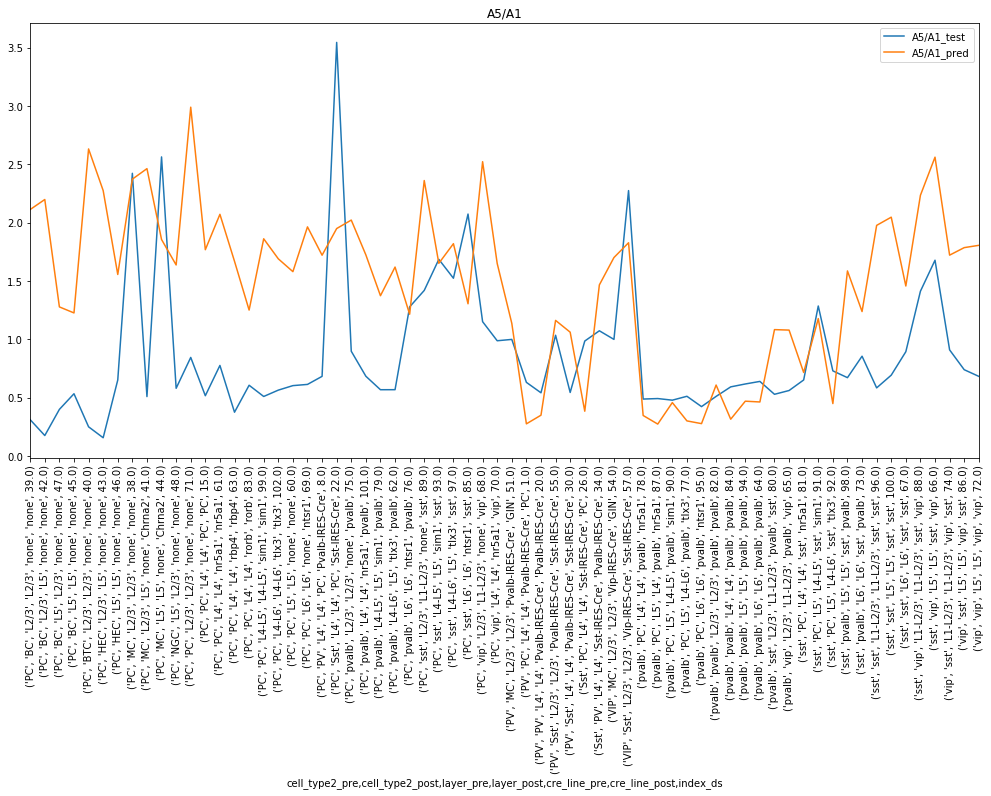

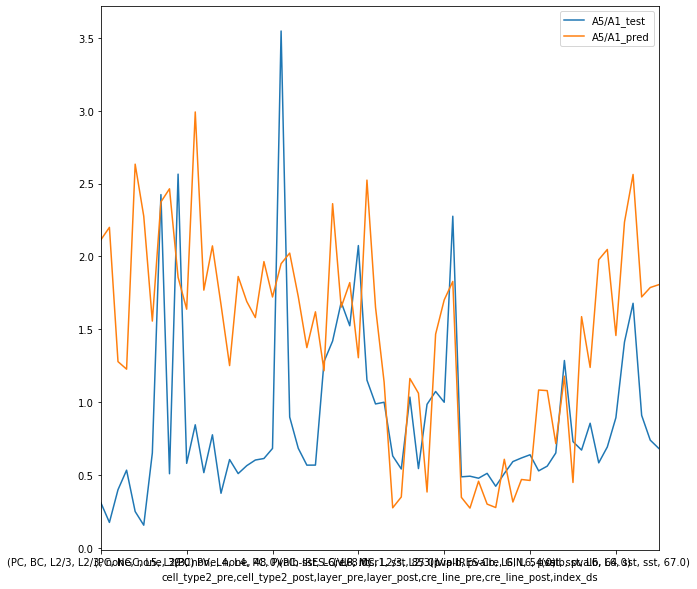

In [0]:
# RF model case

#plot predicted and real (test) stp data
#plt.figure()
yy1=yy.set_index(annot_columns2)
#yy1=yy1.loc[:,stpn_test+stpn_pred] #/yy1.loc[:,'test']*100
yy1=yy1.astype(float).groupby(annot_columns2).mean()
r3=[]
for i in range(nstp):
    f, ax =plt.subplots(figsize=(17, 8))
    #f, ax = plt.figure()
    #ax = f.add_axes()
    #plt.title(stp_columns[i])
    ax.set_title(stp_columns[i])
    yy1.loc[:,[stpn_test[i],stpn_pred[i]]].plot(ax=ax)
    plt.xticks(np.arange(len(yy1.index)), yy1.index, rotation=90)
    if i==0:
        istr=0
    else:
        istr=11 # 11 - if ppr data included
        
    ytest= yy1.loc[:,stpn_test[i]]  
    ypred=yy1.loc[:,stpn_pred[i]]
    #r2=1 - (ytest.iloc[istr:] - ypred.iloc[istr:]).pow(2).mean()/ytest.iloc[istr:].var()
    r2=1 - (ytest.iloc[istr:] - ypred.iloc[istr:]).var()/ytest.iloc[istr:].var()
    print(ytest.iloc[istr:].var())
    print((ytest.iloc[istr:] - ypred.iloc[istr:]).var())
    print(str(i) +' R^2 = '+str(r2))
    r3 = r3 + [r2]

print('mean R^2 = '+str(np.array(r3).mean()))

f, ax =plt.subplots(figsize=(10, 10))
yy1.loc[:,[stpn_test[i],stpn_pred[i]]].plot(ax=ax)

#print(yy1.mean())
yy1.loc[:,stpn_test +stpn_pred]

In [0]:
fi2.iloc[0:50,:] # A1:5, without averaging, 500 trees, with Yuste, 10 selected from 280 gs R^2 = 0.863

importance compartment
Elfn1       0.225451        post
Nxph1       0.045677        post
Cplx1       0.041948         pre
Cacna2d1    0.022951         pre
Cbln4       0.018635        post
Kalrn       0.015542         pre
Cbln2       0.014534         pre
Syt17       0.014110         pre
Rasgrf2     0.014049         pre
Unc13b      0.010632         pre
Nrxn1       0.009657        post
Tiam2       0.009249         pre
Nrxn2       0.008150        post
Sgcd        0.007515         pre
Robo1       0.007379        post
Kit         0.007292         pre
Nrxn3       0.007217         pre
Robo2       0.006593        post
Chl1        0.006346        post
Grm1        0.006265         pre
Jam3        0.006184        post
Unc5d       0.005920         pre
Grm3        0.005821         pre
Cntn4       0.005753        post
Cacnb4      0.005695         pre
Nrxn1       0.005646         pre
Nrcam       0.005525        post
Syt13       0.005453         pre
Dscam       0.005392         pre
Hpcal4      0.005372         pre
Sgcb        0.005218        post
Erc2        0.005207         pre
Cttnbp2     0.005114        post
Kit         0.005073        post
Cplx2       0.005027         pre
Chrna4      0.004889         pre
Sytl2       0.004821         pre
Cntnap2     0.004811         pre
Cntnap4     0.004752        post
L1cam       0.004654        post
Cntnap2     0.004524        post
Nxph1       0.004401         pre
Slit3       0.004316         pre
Cntn1       0.004232        post
Icam5       0.004226         pre
Nrp1        0.004216         pre
Nlgn2       0.004205        post
Slit3       0.004190        post
Dscaml1     0.004179         pre
Calm1       0.004051         pre

In [0]:
import os
os.getcwd()

'/home/stepaniu/Documents/references/transcriptomes to STP/scVI_data'

In [0]:
#fi2.to_excel('10_selected_from_280_gs.xlsx')

In [0]:
fi2.iloc[0:50,:] # A1:5, without averaging, 500 trees, with Yuste, 280 gs R^2 = 0.85

importance compartment
Elfn1       0.225558        post
Nxph1       0.045825        post
Cplx1       0.042226         pre
Cacna2d1    0.023623         pre
Cbln4       0.018438        post
Kalrn       0.017642         pre
Cbln2       0.015680         pre
Syt17       0.014470         pre
Rasgrf2     0.013842         pre
Tiam2       0.010330         pre
Nrxn1       0.010098        post
Nrxn2       0.008667        post
Nrxn3       0.008164         pre
Sgcd        0.007992         pre
Kit         0.007556         pre
Robo1       0.007413        post
Unc5d       0.007304         pre
Grm3        0.006854         pre
Robo2       0.006674        post
Nrxn1       0.006523         pre
Cacnb4      0.006468         pre
Grm1        0.006420         pre
Chl1        0.006267        post
Jam3        0.006135        post
Hpcal4      0.006017         pre
Cntnap2     0.005822         pre
Syt13       0.005820         pre
Nrcam       0.005731        post
Sytl2       0.005707         pre
Cntn4       0.005660        post
Sgcb        0.005584        post
Dscam       0.005553         pre
Cplx2       0.005211         pre
Cttnbp2     0.005072        post
Slit3       0.005062         pre
Chrna4      0.004933         pre
Calm1       0.004861         pre
Nlgn2       0.004850        post
Icam5       0.004844         pre
Kit         0.004776        post
Cntn1       0.004706        post
Cntnap4     0.004641        post
Nxph1       0.004630         pre
Cntnap2     0.004569        post
Nrp1        0.004522         pre
Icam5       0.004438        post
L1cam       0.004424        post
Cntn6       0.004374        post
Dscaml1     0.004289         pre
Dock4       0.004239         pre

In [0]:
fi2.iloc[0:50,:] # A1:5, without averaging, 500 trees, with Yuste, AZ2+Cas+Elfn R^2 = 0.695  (caS+Elfn - 0.63)

importance compartment
Elfn1       0.294955        post
Cacna2d1    0.080880         pre
Elfn2       0.045249        post
Hpcal4      0.042570         pre
Unc13b      0.039867         pre
Rims2       0.033294         pre
Ppfia2      0.031930         pre
Rab3a       0.029621         pre
Calm1       0.029290         pre
Syt7        0.028850         pre
Ncs1        0.028089         pre
Erc2        0.026992         pre
Bsn         0.026307         pre
Syt1        0.024716         pre
Unc13a      0.023948         pre
Cabp1       0.023839         pre
Pclo        0.023450         pre
Rimbp2      0.022082         pre
Ppfia3      0.020578         pre
Rims4       0.020323         pre
Cacnb1      0.020005         pre
Rimklb      0.018760         pre
Syt12       0.016779         pre
Erc1        0.015315         pre
Rims1       0.014416         pre
Rimbp3      0.005681         pre
Syt2        0.005676         pre
Rimkla      0.004013         pre
Unc13c      0.002524         pre

In [0]:
fi2.iloc[0:50,:] # A1:5, without averaging, 500 trees, with Yuste, 384gs

importance compartment
Elfn1      0.245208        post
Neurod6    0.080670         pre
Cacng3     0.054669        post
Meis2      0.051106         pre
Grm1       0.049855        post
Nrxn1      0.043955        post
Gnal       0.041563         pre
Cbln4      0.041011        post
Syt17      0.040132         pre
Runx2      0.039628         pre
Sema3e     0.038994        post
Gria3      0.038410        post
Cux2       0.034393         pre
Rasgrf2    0.033530         pre
Maf        0.033440         pre
Nxph1      0.033256        post
Chrna2     0.028244        post
Dlx5       0.027547         pre
Rorb       0.023621         pre
Sema4b     0.020768        post

In [0]:
fi2.iloc[0:50,:] # A1:5, without averaging, 500 trees, without Yuste, 384gs

importance compartment
Elfn1       0.223027        post
Nxph1       0.045580        post
Cplx1       0.045408         pre
Cacna2d1    0.022041         pre
Sema3e      0.020795        post
Syt17       0.016906         pre
Kalrn       0.016033         pre
Unc13b      0.013185         pre
Sema4b      0.012553        post
Cbln4       0.011792        post
Rasgrf2     0.011327         pre
Cbln2       0.011025         pre
Tiam2       0.008968         pre
Nrxn3       0.006581         pre
Nrxn1       0.006503        post
Kit         0.006485         pre
Lrrc4c      0.006284        post
Efna5       0.005759        post
Chrna4      0.005689         pre
Unc5d       0.005566         pre
Grm3        0.005551         pre
Grm1        0.005497         pre
Nrxn1       0.005421         pre
Hpcal4      0.005260         pre
Cacnb4      0.005064         pre
Cbln1       0.004970         pre
Erc2        0.004648         pre
Lphn3       0.004647        post
Nrxn2       0.004437        post
Dscaml1     0.004312         pre
Nrp1        0.004293         pre
Robo2       0.004239        post
Lrrc3b      0.004011        post
Nxph1       0.003986         pre
Sgcd        0.003957         pre
Cplx2       0.003946         pre
Syt13       0.003791         pre
Nrcam       0.003675        post
Kit         0.003655        post
Chl1        0.003642        post
Cntn4       0.003614        post
Robo3       0.003564         pre
Arhgef2     0.003549         pre
Sytl2       0.003446         pre
Kitl        0.003439         pre
Icam5       0.003426         pre
Cntnap2     0.003425        post
Cntn4       0.003345         pre
Slit3       0.003307         pre
Cntnap2     0.003269         pre

In [0]:
fi2.iloc[0:50,:] # A1:5, without averaging, 500 trees, without Yuste, 1516gs

importance compartment
Elfn1       0.217583        post
Neurod6     0.043052         pre
Sema3e      0.022511        post
Cbln4       0.018656        post
Nxph1       0.016219        post
Dlx5        0.013795         pre
Lrrc4c      0.011082        post
Sema4b      0.011077        post
Gnal        0.009133         pre
Syt17       0.008938         pre
Nrxn1       0.007989        post
Cux2        0.007303         pre
Meis2       0.006918         pre
Rorb        0.006871         pre
Maf         0.006629         pre
Runx2       0.005847         pre
Rasgrf2     0.004511         pre
Efna5       0.004440        post
Sox6        0.004314         pre
Prox1       0.004312         pre
Kit         0.004198        post
Neurod2     0.004129         pre
Gnas        0.004104         pre
Satb2       0.004093         pre
Gpr88       0.004029         pre
Chl1        0.003968        post
Elfn1       0.003532         pre
L1cam       0.003327        post
Nrxn2       0.003232        post
Tiam2       0.003175         pre
Robo2       0.003149        post
Plxna1      0.003138        post
Cntnap2     0.003059        post
Tcf4        0.003040         pre
Cntn4       0.002822        post
Stx1a       0.002749         pre
Sytl2       0.002719         pre
Kalrn       0.002681         pre
Cacng3      0.002642         pre
Neurod1     0.002534         pre
Sema3a      0.002505        post
Snap25      0.002499         pre
Nr4a1       0.002422         pre
Mas1        0.002249         pre
Cbln2       0.002232         pre
Cntn3       0.002196        post
Nrxn1       0.002155         pre
Cacna2d1    0.002149         pre
Crhr1       0.002123         pre
Dscam       0.002109        post

In [0]:
fi2.iloc[0:50,:] # A1:5 without averaging 500 trees without Yuste + post Elfn 289gs

importance compartment
Elfn1       0.230629        post
Nxph1       0.049296        post
Cplx1       0.045810         pre
Cacna2d1    0.022771         pre
Cbln4       0.018533        post
Syt17       0.017060         pre
Kalrn       0.016892         pre
Rasgrf2     0.012496         pre
Cbln2       0.011211         pre
Unc13b      0.010895         pre
Robo1       0.009762        post
Tiam2       0.009041         pre
Nrxn1       0.008815        post
Nrxn2       0.007502        post
Kit         0.006810         pre
Nrxn3       0.006754         pre
Unc5d       0.006669         pre
Grm1        0.006299         pre
Robo2       0.006241        post
Nrcam       0.006171        post
Sgcb        0.006093        post
Cntn4       0.006012        post
Chrna4      0.005847         pre
Nrxn1       0.005726         pre
Syt13       0.005699         pre
Chl1        0.005507        post
Grm3        0.005479         pre
Hpcal4      0.005472         pre
Erc2        0.005284         pre
Jam3        0.005284        post
Cttnbp2     0.005279        post
Cbln1       0.005030         pre
Cntnap4     0.004927        post
Cacnb4      0.004899         pre
Sgcd        0.004795         pre
Nrp1        0.004664         pre
Cntn1       0.004609        post
Kit         0.004557        post
Cntnap2     0.004516        post
Nrxn3       0.004450        post
Slit3       0.004431        post
Cntnap2     0.004335         pre
Cntn4       0.004318         pre
L1cam       0.004297        post
Nlgn2       0.004250        post
Cplx2       0.004250         pre
Icam4       0.004221        post
Nlgn1       0.004197        post
Icam5       0.004168        post
Slit3       0.004077         pre

In [0]:
fi2.iloc[0:50,:] # A1:5 without averaging 500 trees without Yuste  287 gs

importance compartment
Chl1        0.141084        post
Cbln4       0.047583        post
Cplx1       0.028389         pre
Cacna2d1    0.027993         pre
Nrxn1       0.017486        post
Cntn6       0.016831        post
Grm2        0.016714         pre
Kalrn       0.014609         pre
Nrxn3       0.014576        post
Syt17       0.012653         pre
Nxph1       0.011056        post
L1cam       0.010970        post
Dscam       0.010666        post
Robo2       0.010554        post
Kit         0.010318         pre
Cntn3       0.010224        post
Rasgrf2     0.009602         pre
Tiam2       0.008749         pre
Robo1       0.008693        post
Nrxn1       0.008073         pre
Unc13b      0.007828         pre
Cntnap2     0.007818        post
Cntn4       0.007797        post
Nrcam       0.007715        post
Kirrel      0.007511        post
Ppfia2      0.007242         pre
Nrxn3       0.006803         pre
Chrna4      0.006681         pre
Grm3        0.006665         pre
Sgcd        0.006612        post
Unc5d       0.006294         pre
Calm1       0.006189         pre
Ncs1        0.006145         pre
Hpcal4      0.006060         pre
Cntnap2     0.005986         pre
Sgcb        0.005780        post
Cbln1       0.005725         pre
Cbln2       0.005586         pre
Cntn1       0.005575        post
Slit3       0.005545        post
Chl1        0.005463         pre
Erc2        0.005396         pre
Cplx2       0.005305         pre
Icam5       0.004920        post
Robo3       0.004793         pre
Cttnbp2     0.004767        post
Grm1        0.004662         pre
Rgmb        0.004644        post
Arhgef4     0.004444         pre
Nlgn1       0.004390         pre

In [0]:
fi2.iloc[0:50,:] # A1:2 without averaging 100 trees 287 gs

importance compartment
Chl1        0.246138        post
Kit         0.063173        post
Nxph1       0.061882        post
Slit2       0.047211        post
Cbln4       0.046462        post
Tiam2       0.038056         pre
Nrxn1       0.028134         pre
Cacna2d1    0.026056         pre
Nxph1       0.025089         pre
Cntnap2     0.023607         pre
Dscam       0.021581        post
Nxph2       0.017119        post
Chrna4      0.016959         pre
Cbln2       0.014314        post
Nrxn3       0.013756        post
Cntn3       0.012470        post
Cplx1       0.012289         pre
Cntn6       0.011028        post
Unc5d       0.009115        post
Kit         0.008929         pre
Cntn4       0.008528        post
Rasgrf2     0.007827         pre
Ngef        0.007584         pre
Cntnap2     0.006115        post
Nrxn1       0.005524        post
Robo1       0.004878        post
Robo2       0.004365        post
Grm2        0.004113         pre
Dock4       0.004087         pre
Nrp1        0.004033         pre
Syt17       0.003842         pre
Cntn1       0.003759        post
Chl1        0.003675         pre
L1cam       0.003465        post
Unc13b      0.003461         pre
Sgcb        0.003406        post
Grm8        0.003371         pre
Kalrn       0.003350         pre
Rgmb        0.003236        post
Cbln2       0.003058         pre
Dscaml1     0.002993        post
Unc5d       0.002928         pre
Ntn5        0.002899         pre
Sdk2        0.002696         pre
Cplx2       0.002553         pre
Ntng1       0.002540        post
Nlgn1       0.002497        post
Cntnap4     0.002497        post
Sgcd        0.002418        post
Hpcal4      0.002404         pre

In [0]:
fi2.iloc[0:50,:] # A1:2 without averaging 287 gs

importance compartment
Chl1        0.247048        post
Nxph1       0.064820        post
Kit         0.063708        post
Cbln4       0.047221        post
Slit2       0.046338        post
Tiam2       0.040786         pre
Nrxn1       0.030481         pre
Cacna2d1    0.026016         pre
Nxph1       0.024427         pre
Cntnap2     0.021824         pre
Dscam       0.021489        post
Nxph2       0.020627        post
Chrna4      0.016330         pre
Cplx1       0.013745         pre
Cbln2       0.013515        post
Nrxn3       0.012558        post
Cntn3       0.010701        post
Cntn6       0.010487        post
Rasgrf2     0.008739         pre
Kit         0.008681         pre
Unc5d       0.008256        post
Cntn4       0.007478        post
Ngef        0.007373         pre
Nrxn1       0.005286        post
Robo1       0.005277        post
Cntnap2     0.005133        post
Robo2       0.004424        post
Dock4       0.003944         pre
Nrp1        0.003929         pre
Grm2        0.003840         pre
Chl1        0.003728         pre
Unc13b      0.003711         pre
L1cam       0.003703        post
Syt17       0.003648         pre
Cntn1       0.003564        post
Grm8        0.003456         pre
Sgcb        0.003434        post
Cbln2       0.003357         pre
Ntn5        0.003166         pre
Rgmb        0.003103        post
Kalrn       0.003023         pre
Unc5d       0.002817         pre
Dscaml1     0.002702        post
Cntnap4     0.002601        post
Cplx2       0.002515         pre
Hpcal4      0.002490         pre
Sdk2        0.002453         pre
Sgcd        0.002449        post
Nlgn1       0.002413        post
Nrxn3       0.002299         pre

In [0]:
fi2.iloc[0:50,:] # A1:4 without averaging 287 gs

importance compartment
Chl1        0.141144        post
Kit         0.058638        post
Cacna2d1    0.053722         pre
Cbln4       0.027514        post
Slit2       0.023460        post
Nxph1       0.017922         pre
Kalrn       0.016926         pre
Nrxn3       0.015830        post
Nrxn1       0.015361        post
Tiam2       0.014545         pre
Nxph1       0.014519        post
Cbln2       0.012978        post
Cntn6       0.012277        post
Kit         0.012234         pre
Rasgrf2     0.011166         pre
Cplx1       0.011107         pre
L1cam       0.008768        post
Hpcal4      0.008763         pre
Unc5d       0.008176        post
Robo1       0.007797        post
Syt17       0.007790         pre
Cbln2       0.007331         pre
Cntnap2     0.007117         pre
Cbln4       0.007070         pre
Cntn1       0.007061        post
Slit3       0.007051        post
Cntn4       0.006378        post
Nrxn1       0.006263         pre
Grm4        0.006148         pre
Cntnap2     0.006111        post
Unc13b      0.005954         pre
Sytl2       0.005741         pre
Cntn3       0.005319        post
Rgmb        0.005059        post
Robo2       0.005034        post
Ntn5        0.004882         pre
Cntnap4     0.004729        post
Unc5d       0.004722         pre
Sgcb        0.004688        post
Nrp1        0.004657         pre
Kirrel      0.004620        post
Robo3       0.004564         pre
Cplx2       0.004548         pre
Erc2        0.004524         pre
Icam5       0.004482        post
Dscam       0.004471        post
Cacna2d3    0.004409         pre
Ngef        0.004397         pre
Sgcd        0.004390        post
Nrcam       0.004374        post

In [0]:
print(fi2)

         importance compartment
Elfn1      0.356892        post
Nxph1      0.208211        post
Ntn5       0.203335         pre
Cntnap2    0.052679         pre
Kit        0.043979        post
Unc13b     0.036335         pre
Ntng1      0.036023        post
Cbln2      0.025038         pre
Slit2      0.021516        post
Unc13c     0.015991         pre


In [0]:
print(fi2)

importance compartment
Elfn1       0.332712         pre
Satb2       0.241762         pre
Nxph1       0.116478        post
Cacng3      0.059282         pre
Grm1        0.057424        post
Sema3c      0.042226        post
Cbln2       0.026878         pre
Elfn1       0.013496         pre
Cacna2d3    0.008158         pre
Lrrc4c      0.005940        post
Sox6        0.005655         pre
Gpr176      0.004711        post
Nxph1       0.004283         pre
Cbln4       0.004182         pre
Neurod1     0.004106         pre
Dlx1        0.002211         pre
Id2         0.002163         pre
Nrxn1       0.002141        post
Stx1a       0.001962         pre
Akap13      0.001838         pre
Grm5        0.001744        post
Maf         0.001624         pre
Unc5d       0.001555        post
Prox1       0.001453         pre
Dlx5        0.001440         pre
Htr1a       0.001427        post
Unc13c      0.001377         pre
Lrrc8a      0.001373        post
Meis2       0.001361         pre
Drd2        0.001294         pre
...              ...         ...
Klf17       0.000000         pre
Lbx1        0.000000         pre
Tlx3        0.000000         pre
Hoxd13      0.000000         pre
Hoxd12      0.000000         pre
Hoxd11      0.000000         pre
Hoxb5       0.000000         pre
Hoxa11      0.000000         pre
Hoxa13      0.000000         pre
Hoxa2       0.000000         pre
Hoxa3       0.000000         pre
Hoxa4       0.000000         pre
Hoxa9       0.000000         pre
Hoxb1       0.000000         pre
Hoxb13      0.000000         pre
Hoxb3       0.000000         pre
Hoxb4       0.000000         pre
Zfp42       0.000000         pre
Hoxd10      0.000000         pre
Hoxb6       0.000000         pre
Hoxb7       0.000000         pre
Hoxb9       0.000000         pre
Hoxc13      0.000000         pre
Hoxc4       0.000000         pre
Hoxc5       0.000000         pre
Hoxc6       0.000000         pre
Hoxc8       0.000000         pre
Hoxc9       0.000000         pre
Hoxd1       0.000000         pre
Vdr         0.000000        post

[1682 rows x 2 columns]

## iterative RF - search for stable interations of features

In [0]:
import numpy as np
from irf import irf_utils

n_samples = 5000
n_features = 500
X_train = np.random.uniform(low=0, high=1, size=(n_samples, n_features))
y_train = np.random.choice([0, 1], size=(n_samples,), p=[.5, .5])
X_test = np.random.uniform(low=0, high=1, size=(n_samples, n_features))
y_test = np.random.choice([0, 1], size=(n_samples,), p=[.5, .5])
# The second feature (which is indexed by 1) is very important
X_train[:, 1] = X_train[:, 1] + y_train
X_test[:, 1] = X_test[:, 1] + y_test

(2000,)


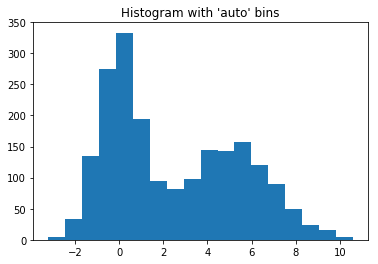

(array([1791, 1852,  271,  143,  102,    0,    9,  204,   15,    2]),
 array([0.4607186753099828, 0.7551119099860438, 1.0495051446621049,
        1.343898379338166, 1.638291614014227, 1.9326848486902881,
        2.227078083366349, 2.52147131804241, 2.8158645527184714,
        3.1102577873945325, 3.4046510220705932], dtype=object))

In [0]:
import matplotlib.pyplot as plt
rng = np.random.RandomState(10)  # deterministic random data
a = np.hstack((rng.normal(size=1000),  rng.normal(loc=5, scale=2, size=1000)))
print(a.shape)
plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

bins =[0.45, 0.75,1.0, 1.5, 5]
y_train[:,nannot]
in_bins = 
np.histogram(y_train[:,nannot],10)

/home/stepaniu/anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 155 separate connected components using meta-embedding (experimental)
  n_components
/home/stepaniu/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


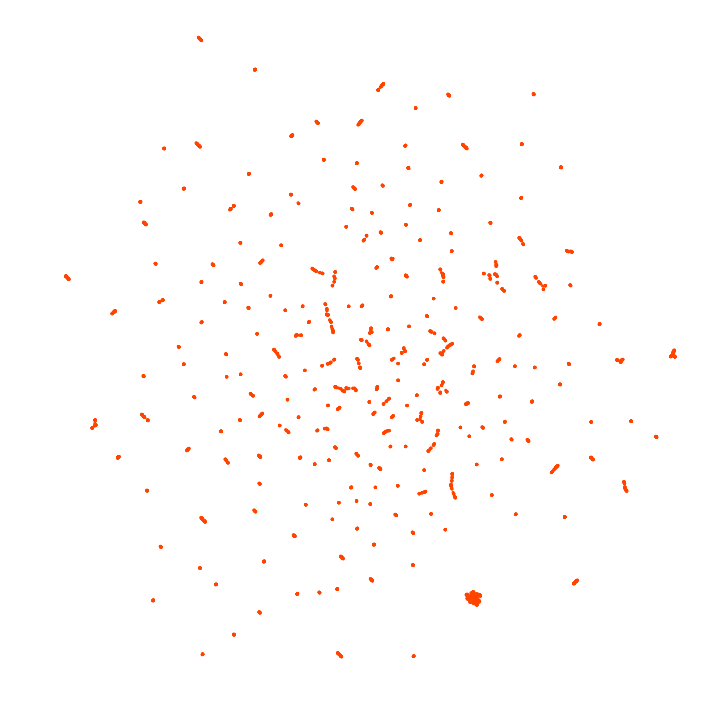

/home/stepaniu/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


In [0]:
yy=y_train[:,nannot:]
y_u = UMAP(spread=2).fit_transform(yy)

from sklearn.manifold import TSNE

y_u2 = TSNE(n_components=2).fit_transform(yy)

fig = plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
plt.scatter(y_u[:, 0], y_u[:, 1],
                edgecolors='none', c="#ff4400", s=10)

plt.axis('off')
fig.set_tight_layout(True)

fig1 = plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
plt.scatter(y_u2[:, 0], y_u2[:, 1],
                edgecolors='none', c="#ff4400", s=10)

plt.axis('off')
fig1.set_tight_layout(True)

In [0]:
colors = ["#991f1f", "#ff9999", "#ff4400", "#ff8800", "#664014", "#665c52",
          "#cca300", "#f1ff33", "#b4cca3", "#0e6600", "#33ff4e", "#00ccbe",
          "#0088ff", "#7aa6cc", "#293966", "#0000ff", "#9352cc", "#cca3c9", "#cc2996"]

fig = plt.figure(figsize=(15, 15), facecolor='w', edgecolor='k')
for i, k in enumerate(list(set(df_aba_vis_in_c_s_vis.loc[:,'cluster_label'] ))):
    i_clu = df_aba_vis_in_c_s_vis.index[df_aba_vis_in_c_s_vis.loc[:,'cluster_label'].isin([k])]
    c =df_aba_vis_in_c_s_vis.loc[i_clu,'cluster_color'].iloc[0]
    
    plt.scatter(latent_u_vis[i_clu, 0], latent_u_vis[i_clu, 1], label=k,
                edgecolors='none', c=c, s=15)
    plt.legend(loc=9, borderaxespad=0, fontsize='small', markerscale=3)

plt.axis('off')
fig.set_tight_layout(True)

array([1.4647615470373265, 0.8257308575291321, 0.8855804036690504, ...,
       0.9922020112791935, 0.5007277599193325, 1.4920791870220682],
      dtype=object)

In [0]:

import time
t1 = time.time()

all_rf_weights, all_K_iter_rf_data, \
    all_rf_bootstrap_output, all_rit_bootstrap_output, \
    stability_score = irf_utils.run_iRF(X_train=X_train[:,nannot:],
                                        X_test=X_test[:,nannot:],
                                        y_train=y_train2[:,nannot:],
                                        y_test=y_test2[:,nannot:],
                                        K=5,                          # number of iteration
                                        n_estimators=20,             # number of trees in the forest
                                        B=30,
                                        random_state_classifier=2026, # random seed
                                        propn_n_samples=.2,
                                        bin_class_type=1,
                                        M=20,
                                        max_depth=5,
                                        noisy_split=False,
                                        num_splits=2,
                                        n_estimators_bootstrap=5)


t2 = time.time()
#print(regr.feature_importances_)
print('Elapsed time: '+str(t2-t1))

ValueError: Unknown label type: 'unknown'

In [0]:
print(all_rf_weights['rf_weight5'])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [0]:
print(stability_score)

{'1': 1.0}


## Utils

In [0]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

def rfr_model(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],                               random_state=False, verbose=False)
# Perform K-Fold CV
   scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')

    return scores

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 20)